# Data Preparation

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.transforms
%matplotlib inline
sns.set_style("whitegrid")
matplotlib.rc('font', family='calibri')
import pandas as pd

df = pd.read_excel('Ellison Service and Parts Customer Satisfaction.xlsx', sheet_name='Data', parse_dates=[0])
df.drop(['ACCOUNT','NAME','ADDRESS','CITY','PHONE','EMAIL','Best phone to reach you?','MODEL',
        'ORDER DATE','CUSTERMER PO','WORK ORDER','MFR','SAMPLE TYPE',
        'Can we contact you?','Do you have any other comments you would like to share with us?',
        'Have you had any interaction with Ellison\'s Service department in the last 3 months?',
        'Have you had any interaction with Ellison\'s Parts department in the last 3 months?',
        'Have you had any interaction with Ellison\'s Sales & Installation team in the last 3 months?','REGION'],
        axis=1, inplace=True)
df.columns = ['Date','Region','Work Type','Service met expectations',
           'Time taken by service','Daily communication by Service', 'Service CES', 'Vendor with best Service',
            'Knowledgeability of Parts','Accurate delivery info provided in timely manner',
            'Communication during Parts process', 'Parts CES','Vendor with best Parts Dept',
            'S&I knowledgeability about manufacturing needs', 'New machine/accessories installed in timely manner',
            'Communication throughout installation','S&I CES','Vendor with best S&I Team','NPS Score',
            'NPS Category']
df.drop(['S&I knowledgeability about manufacturing needs', 'New machine/accessories installed in timely manner',
            'Communication throughout installation','S&I CES','Vendor with best S&I Team'], axis=1, inplace=True)
df = df.replace(['Top 10% of All Vendors','Above Average Vendor','Average Vendor','Below Average Vendor',
                 'Bottom 10% of All Vendors','Yes','No'],[2,1,0,-1,-2,1,0])
service_cols = df[['Service met expectations','Time taken by service','Daily communication by Service']]
parts_cols = df[['Knowledgeability of Parts','Accurate delivery info provided in timely manner',
                'Communication during Parts process']]
df['Service CSAT'] = [np.mean(service_cols.iloc[n]) if service_cols.iloc[n].isna().sum()<3 else np.nan for n in range(len(service_cols))]
df['Parts CSAT'] = [np.mean(parts_cols.iloc[n]) if parts_cols.iloc[n].isna().sum()<3 else np.nan for n in range(len(parts_cols))]
df = df[['Date','Region','Service CSAT','Service CES','Vendor with best Service','Parts CSAT','Parts CES',
        'Vendor with best Parts Dept','NPS Score','NPS Category','Work Type']]

df.head()

Date    Region  Service CSAT  Service CES Vendor with best Service  \
0 2018-04-01  Illinois      1.333333          2.0                      NaN   
1 2018-04-01  Illinois      2.000000          2.0                      NaN   
2 2018-04-01  Illinois      2.000000          2.0                  Ellison   
3 2018-04-01  Illinois      2.000000          2.0                 Hydromat   
4 2018-04-01  Illinois      1.666667          2.0                      NaN   

   Parts CSAT  Parts CES                        Vendor with best Parts Dept  \
0    0.333333        0.0                                                NaN   
1    2.000000        2.0                                                NaN   
2         NaN        NaN                                                NaN   
3    2.000000        2.0  Can't say for sure. Most of our vendors are go...   
4         NaN        NaN                                                NaN   

   NPS Score NPS Category Work Type  
0        8.0      Passive     Parts  
1       10.0     Promoter   Service  
2       10.0     Promoter   Service  
3       10.0     Promoter   Service  
4        NaN          NaN   Service

In [2]:
best = df[['Vendor with best Service','Vendor with best Parts Dept']]
best.columns = ['Service','Parts']
best = best.replace(['ellison','Ellison Technologies','ELLISON','Ellison ','Ellison!','Elliison Technologies',
              'Ellison is very prompt to answer questions and service our Doosan horizontal.','ellison ',
             'Ellison Technologies, Plymouth location','Ellison by far over DMG Mori & Mazak',
              'Ellison has been fantastic to work with','Ellision Tech is by far the best service vendor that I use.',
             'Ellison by far!','Ellison Pewaukee','ellision',
              'Ellison - You are preferred for all reasons above - good job.','Ellison seems good so far','ellisons',
              'Ellison for our Doosan DBC 130 II','Ellison does a great job','Ellison for us.','Ellison Cleveland',
              'Ellison Technology','Ellison Machinery',
              'Ellison. (BTW - I don\'t need daily communication. Schedule service and I\'m good)',
              'Ellison in Charlotte, NC',
              'Ellison does most all of our service. We do not find other service providers meet the standards we need.',
              'Ellison is the most consistent. We are very pleased with the service we receive.','ELLISON...',
              'Ellison is my primary vendor','Ellision Tech.','ELLISON ','Ellison service engineering','Elliison','Elison',
            'Have only dealt with Ellison for the past few years.',
            'As of right now Ellison has passed Knox. as far as I am concerned. Knox was used here often.',
            'At this time I would rate Ellison best.','DOOSAN','Doosan Charlotte','doosan lathe','Doosan DBC-130L II',
            'Doosan DNM 500','doosan 12100','Doosan HC 400 II','Dossan/Ellison','Doosan DHP5500','DMV2040',
            'At this point Ellison has more than lived up to our expectations.','By far Ellison','Currently, Ellison',
            'Doosan','Ellison','FL DISTRIBUTORS HAVE ALWAYS USED ELLISOI (JACKSON MACHINE)',
            'In my opinion Ellison','I\'ve only ever worked with two, Ellison is better than the other. ',
            'I have delt with many, as of right now Ellison.',
            'Many service depts take very long to communicate back with a response.  Ellison immediately acknowledges that they are working on it.  Ellison is the #1 vendor for getting service charges turned in so I can close out my work order on my end.  that is very important to us. ',
            'Matt is below average, Eric is above average. I have always been happy with Eric\'s work.','NHP5000','NHM 6300',
            'NH6300 / NHX5000 / NV5000','not really sure who I would call the "best" but Ellison is in the Top of the list',
            'only used ellison','Puma 2600SY-II','puma 800L','puma 400',
            'Right now I feel Ellison does out of the ones we use','So Far Ellison, I have not used many others as yet.',
            'So far we have had only an install. It was top-notch service and professionalism.','So far, Ellison',
            'V550M','why you do!','we like ellison','We like yours but arrival time is waaaay to long','Wllison',
             'We have only used Doosan','We only use Ellison',
            "With the support of my Ellison Sales Engineer's support, Ellison provides my best service.",
            'you guys did a great job!','You are my only provider besides Fanuc','(888) 207-2787',
            'Brian W. is awesome always helpful','Brian was extremely helpful.','Brina Wyczawski','Doosan. ',
            'ELLISON OF COURSE','ELLISON TECHNOLOGIES',
            'Ellison - Again very knowledgeable and has been 100% accurate with suggested repair parts needed.',
            'Ellison Parts department is on par.','Ellison Tech','Ellison Tech. Patti Hernandez',
             'Ellison Tech. always do whatever they can for the parts and shipping.',
            'Ellison is as good or better than our other machine tool suppliers',
            'Ellison is just as good or better than Methods and Adept','Ellison is satisfactory for parts support',
             'Ellison tech','Ellison the team does a great job and works quickly. ','Ellison, Sandy is awesome!!',
            'I have delt with many over the years, as of right now Ellison.','NH6300 NHX5000 NV5000',
            'Not sure who I would call the "Best" but Ellison is in the top of the list.','Doosan / Ellison','Patti',
            'They all leave a lot to be desired.  Ellison does well and has been better than others.',
            'Tracy has been so good to me for staying on top of things till we are back and running..','YOU GUYS OF COARSE',
             'You','You are our only service company.','You guys','You guys do.','doosan','Alex','Doosan Puma',
            'ELLISONS TECH.','Ellison Charlotte NC','Ellison cleveland',
            'Ellison does just as well or better than Methods and Adept.','Ellison for sure',
             'Ellison has the best sales team.  Noah Ditter is a great salesperson.  ',
            'Ellison would be our top installation team.',
            "Ellison's transition to Doosan has made buying a Doosan much more enjoyable",'Ellison, of course',
             'Ellison...Mario is the man! Always on top of things and helping us out when necessary ','EllisonTec ',
             'First class service.  Sales and installation team - good job.','Great job',
            'Have had two machines decommissioned/recommissioned in a new location by Ellision in the past 3 mos. Both experiances were top 10% on both ends ',
            "I haven't had any dealings with any other new machine installation teams",
            'Mario is the man, always working hard for us! ','Ron Ditter is the best sales person at Ellison.',
            'Sales team, Training and Finance were very professional','V8300M','YOU AGAIN','ellison was great','technician',
             'you do','So far Ellison !','Doosan puma','For Doosan M25 Coolant Pump','You do'],
            'Ellison/Doosan')
best = best.replace(['HAAS','haas','Haas Automation','hass',
                     'Haas - Note that I do not have much experience with Ellison yet.','HAAS FACTORY OUTLET',
                    'Haas is not bad',"Of the machines we have, Haas.  We don't have machines that Ellison still sells.",
                    'HFOChicago for Haas is better','Haas - no question',
                    'We only have had Haas machines in the past. All installations went well.'],'Haas')
best = best.replace(['At this point in time I would consider Ellison and DMG Mori equal.',
                    'All machinery  moriseiki and dosson puma ','Doosan/Mori','Doosan, Mori','Doosan and Moriâ€™s ',
                    'Doosan & Mori','All are pretty good',
                    'All equal, would be nice if we could sign for parts when tech was here. And parts were ordered through Ellison leaving us out of that loop',
                    'At this point in time Ellison has the best sales team. The installation team is good but DMG Mori was slightly better.'],
                    'Tied-DMG Mori')
best = best.replace(['Charlotte NC','DID NOT SPEAK OR INTERACT WITH ANY OF THEM OTHER THAN VIA EMAIL',
                    'Depends on who you ask',
                     'did not use service dept. was completely unaware you did any type of repair on any items',
                    'Depends on the machine',
                'Don\'t know the best but it ain\'t Ellison or the Jonathon guy ya\'ll sent over to work on our Doosan',
                    'don\'t know','Don\'t usually work with the machine tool vendors',
                    'Ellison sends me parts - I do not think they service or repair for us',
                    'Ellison is terrible with Doosan Service',
                     'Ellison is new to the Doosan product line.  As they become more familiar they will get better as you would expect.  to be honest, Ellison parts and service is still behind where the previous Doosan vendor was.  We do not need to hear from you every day until a repair is complete.  We do need to know if there are issues regarding a repair only.  The daily emails from service and sometimes from sales are frankly over done.  I would caution you tot stay away from the large corporate mentality and focus more on customer needs without overwhelming your customers.  Of the 3 brands of lathes we currently use, overall you are running # 3 overall.  You are getting better though.       ',
                    'good question','hales did. But im not sure now.',
                    'It was Ellison. This last machine install was tough and remains tough. Doosan Korea and America are somewhat responsible.',
                    'I cannot give an answer because I have not dealt with other service departments',
                    'I don\'t have comparison only my expectations.','Na','No comment','Not sure','Not certain',
                     'Not sure I can say. ','no other experience',
                    'not sure','n/a ','Not DMG/Mori','na','nobody so far....','None','Not Ellison ','Only use puma turning machines(not sure)',
                    "This interaction didn't require a service tech being involved. It was phone support and parts inquiry.",
                     'unknown','waiting for service','We do not currently track this data.','???','??','.','?',
                    'Don\'t know the best but the Jonathon fella Ellison sent over ended up having us order two more bearings than we needed as well as ordered the wrong size tapered pins....  Wow dude, and you\'re the expert???  I can tell you this, the guy is fantastic at giving excuses about how he made his mistakes.  "Well I didn\'t realize...", "I thought...", "In the book it says X, so I thought Y..."  At this point I\'m starting to wonder, "Is this guy going to take any responsibility for his screw ups?  Before he came in our exhaust fans kept the shop pretty clear.  After all of the smoke he\'s blown in the last two days, you\'d think we were in the middle of a California wildfire.  ',
                    'Ellison appears to be in a transition with Doosan. Their parts department has improved greatly over the last year.',
                    'Hard 2 Say','Never got back to me','Not sure.',
                     'Not sure. Parts not available in Chicago market causes excessive downtime for customer.',
                     'ONLY CONTACT WAS VIA EMAIL','This was my first experience with Ellison. They are among the top.',
                     'Unknown','Unknown ','Unsure', "can't say","i didn't need any parts at the time of service",
                    'none','not sure I can say','1 (262) 617-7525','Ellison (back in the Mori Seiki days)',
                    'Hales Machine has been our supplier before, this is our first machine purchase from Ellison',
                    "Haven't bought anything recently but boy have we seen the salesmen.  In here telling us about the top of the line equipment ya'll sell.  Good prices.  Unbelievable efficiencies.  Question though...  Best machine in the world sits on your shop floor.  Axis drive unit starts getting hot.  Call service.  They send a fella in.  He spends over half of the week investigating whats up.  He can't figure it out.  Machine is still not running.  How great of a machine is it if I can't use it?",
                    "I can't speak for Ellison's installation due to not have bought a new machine yet. Now the sales person not to helpful.",
                    "I like Ellison sales.  The install side got hit by cuts, and the newer Doosan machines weren't fully developed as they arrived here - parts that didn't fit, control features that don't work etc. Doosan problems making Ellison look bad.",
                     "I was considering installation team same as service. This is the first installation we have had for the past 15 years so can't give a comparison. Your people have been plenty accomadating and capable.",
                    "Not sure I can say because the last several purchased assets were Doosan Puma's",
                    'Not sure, still in process of buying the machine',
                    "Sales and Engineering don't seem to be very responsive at times.  My guess is as Ellison works with the new Doosan product more, this will change, but currently it can be frustrating.  It has definitely slowed our process with Ellison.",
                    'The machine was purchased by Fastenal and donated to the College I teach, so I was not really involved in the purchase and delivery at all.',
                    'Was Fadal','no comment','we did not purchase a machine',
                     'Came in to quote bar feeder install compatability '],
                    'Indeterminable')
best = best.replace(['All the Same','All have their vices','all are good','All about the same.',
                     'They all seem about the same.',
                    'With the economy booming, all services are average, as most are days or weeks out on scheduling. There is no #1 in my book!',
                    'They all underperform. Staffing numbers?',
                     'Each have different strengths.  No single vendor has it all.','NO STANDOUT',
                    'None.Really wasn\'t a standard to go by..','Not particularly impressed with any.',
                    'None.  No vendor seems to understand that downtime at a small manufacturing site is crucial. They all make us wait for days, even weeks.  Ellison is no better. ',
                    'No one in the industry currently is meeting expectations',
                    "At this time I can't really rate any vendor higher than the rest.",
                    "Can't say for sure. Most of our vendors are good including Ellison.",
                    'No one in the insudstry currently is meeting expectation','None of them''They are all about the same',
                     'They are pretty much equally competent.','None of them','They are all about the same',
                    'Again, Ellison is on part with our other vendors.','No preference.','not sure they are all good',
                    'All are about the same.'],
                    'Tied-All')
best = best.replace(['DMG MORI','DMG MORI/SAME DAY SERVISE MOST EVERY TIME','DMG Mori','DMG','DG MORI',
                    'DMG MORI Story City ','DMG/Mori',
                     'Ellison / DMG Mori pretty much equal, but Mori has more techs available','DMG-Mori',
                    'I would say DMG Mori as of late ',
                    'Used to be Ellison but now we have been getting a little better service from DMG Mori lately. ',
                    'DMG mori ','MORI SEIKI MH-40','Mori seike','mori lathe','Mori Siki CNC Lathe',' MORI SEIKI MH-40',
                    'Mori Seiki'], 'DMG Mori')
best = best.replace(['Ellison and Haas are both very good service departments','Ellison & HAAS'], 'Tied-Haas')
best = best.replace(['Ellison is on par with our other providers, Methods & Adept','Ellison Gosiger',
                    'Ellison, and willemin','Ellison/Amada','Ellison, Zengers','Ellison/Rem Sales',
                    'GOSSIGNER AND ELLISON','GOSSIGNER AND ELLISON','Heller and Ellison',
                    'I get excellent attention from Ellison and Eagle Machine Services',
                    'The same service between the 3 that we use.','There all about the same ',
                    'Hales for fast service,  Ellison for organization of product, Both have very knowledgeable techs.  ',
                    'I deal with about 4 very good parts vendors and Ellison is one of them',
                    'I have had good operations with Methods, Ellison and Euro Tech. All good.',
                    'All machines moriseiki and dosson ','Methods/Ellison','Ellison Zengers',
                    'Ellison leads in knowledge on the sales team side. Installation I would say Technical Equipment ',
                    'No best but many are above average, CNC Machine Service, Ellis, NW Service Group, Amada to name a few',
                    'I consider most to be Average with Ellis and CNC Machine Service near the top.'],
                    'Tied-Others')
best = best.replace(['Fanuc','fanuc is pretty good.','Fanuc '], 'FANUC')
best = best.replace(['FADAL','FADALCNC.COM'], 'Fadal')
best = best.replace(['FIves'], 'Fives')
best = best.replace(['Ammtech','Amttech','amttech'], 'AmTTech')
best = best.replace(['Concept Machine tool', 'Concept'], 'Concept Machine Tool')
best = best.replace(['citizen'], 'Citizen')
best = best.replace(['CNC machines'], 'CNC Machines')
best = best.replace(['deawoo','Deawoo','Dawoo 700 CNC lathe','Daewoo '], 'Daewoo')
best = best.replace(['Gossiger','Goossinger','Gosiger (by a little bit)','Gosiger, Haas, then Ellison '], 'Gosiger')
best = best.replace(['Hales ','HALES','Hales Mahine Tool','Hales',
                    'Hales Machine, Ellison has been good in the past prior to this year\'s issues'], 'Hales Machine Tool')
best = best.replace(['HARTWIG','Hartwig Machine','Hartwig for Okuma'], 'Hartwig')
best = best.replace(['I\'ve only dealt with the Tsugami engineers'], 'Tsugami')
best = best.replace(['I was dynamic but the service tech left'], 'Dynamic')
best = best.replace(['I have had great experiences with Gosiger and Ganesh, as their techs are at the shop by 7:00 AM or earlier'],
                   'Gosiger/Ganesh')
best = best.replace(['makino','Makino (single Source Technologies)',
                    'We have Makino and Doosan, and Makino provides better support','MyMakino'], 'Makino')
best = best.replace(['MAZAK','Mazak Machine Tool','Mazak Corperation','mazak','Mazak ',
                    "Mazak is hard to beat, but that's only because they are captive",
                    'Mazak was far more responsive and on top of the parts delivery'], 'Mazak')
best = best.replace(['Methods','Methods Machine tool','Methods Machine'], 'Methods Machine Tools')
best = best.replace(['morris','Morris South','Morris Midwest','Okuma( Morris)','Morris','MorrisSouth'], 'Morris/Okuma')
best = best.replace(['Mc Machinery', 'MC Machinery'], 'Mitsubishi')
best = best.replace(['M.R services'], 'MR Services')
best = best.replace(['MTS','Machine Tool Specialties - Maruka ','Machine Specialties'], 'Machine Tool Specialties')
best = best.replace(['Nigatta'], 'Niigata')
best = best.replace(['online carbide'], 'Online Carbide')
best = best.replace(['productivity','Productivity in Omaha','Productivity, Inc.','Productivity, Inc',
                    'Productivity out of Omaha Nebraska','produtivity','productivity inc','Productivity  ',
                    'Productivity Inc,','produictivity'], 'Productivity')
best = best.replace(['Protek CNC','Proteck','protek'], 'Protek')
best = best.replace(['parts'], 'Parts')
best = best.replace(['REM Sales '], 'REM Sales')
best = best.replace(['Raven Engineering (balancing equipment)'], 'Raven Engineering')
best = best.replace(['SAMSUNG'], 'Samsung')
best = best.replace(['SELWAY','Sellway','selway'], 'Selway')
best = best.replace(['sales'], 'Sales')
best = best.replace(['sl30mc'], 'Akira Seiki')
best = best.replace(['service and engineer'], 'Service and Engineer')
best = best.replace(['Service department '], 'Service')
best = best.replace(['technical equipment','Tech EQ','TECH EQ','Tech','Tech. Equipment which services Makino',
                    'Technical Equipment does a pretty good job.'], 'Technical Equipment')
best = best.replace(['TRUMPF Laser Engraver','Of those that I work with, Trumpf has been the one that has preformed best'],
                    'Trumpf')
best = best.replace(['The most experience I have is with Stone Machinery and Concept Machine Tool. They are both very good.'],
                   'Stone Machinery/Concept Machine Tool')
best = best.replace(['Tie Ellison/Productivity','Productivity and Ellison'], 'Tied-Productivity')
best = best.replace(['United Grinding followed closely by Ellison.'], 'United Grinding')
best = best.replace(['willemin and grob'], 'Willemin/Grob')
best = best.replace(['willemin'], 'Willemin')
best = best.replace(['globetec'], 'Globetec')
best = best.replace(['#3 not applicable, I would have to say Billor as I have not had enough experience with Elllison to say that you are better. '],
                   'Billor')
best = best.replace(['ABSOLUTE '], 'Absolute')
best = best.replace(['cnc services'], 'CNC Services')
best = best.replace(['OKUMA GOSIGER'], 'Okuma/Gosiger')
best = best.replace(['fastenal'], 'Fastenal')
best = best.replace(['Flint','Flint Machine tools'], 'Flint Machine Tools')
best = best.replace(['HANWHA'], 'Hanwha')
best = best.replace(['cnc'], 'CNC')
best = best.replace(['fanuc, haas'], 'Haas/FANUC')
best = best.replace(['hyd-mech saw'], 'Hyd-Mech Saw')
best = best.replace(['muratec'], 'Muratec')
best = best.replace(['520  Machine or High Tech'], '520 Machine/High Tech')
best = best.replace(['Protek and QMT','Proteck; Uptime Electronics'], 'Protek/QMT')
best = best.replace(['Jupiter Machine Tool has done an excellent job working with us.'], 'Jupiter Machine Tool')
best = best.replace(['Tech. Equip and Ellison both in the running.'], 'Tied-Technical Equipment')
best = best.replace(['grob'], 'Grob')
best = best.replace(['hardinge '], 'Hardinge')
best = best.replace(['msc'], 'MSC')
best = best.replace(['vendors that are represented by Concept and Hales '], 'Concept/Hales')
best = best.replace(['Mitsubishi & Hurco'], 'Mitsubishi/Hurco')
best = best.replace(['Technical services'], 'Technical Services')

## All

In [22]:
all_df = df.groupby('Date').mean()
all_df['NPS Score'] = [(df[df['Date'].isin(all_df.index[n-12:n])]['NPS Category'].value_counts().loc['Promoter']/df[df['Date'].isin(all_df.index[n-12:n])]['NPS Category'].value_counts().sum()) - (df[df['Date'].isin(all_df.index[n-12:n])]['NPS Category'].value_counts().loc['Detractor']/df[df['Date'].isin(all_df.index[n-12:n])]['NPS Category'].value_counts().sum()) if n>11 else (df[df['Date'].isin(all_df.index[:n])]['NPS Category'].value_counts().loc['Promoter']/df[df['Date'].isin(all_df.index[:n])]['NPS Category'].value_counts().sum()) - (df[df['Date'].isin(all_df.index[:n])]['NPS Category'].value_counts().loc['Detractor']/df[df['Date'].isin(all_df.index[:n])]['NPS Category'].value_counts().sum()) for n in range(1, len(all_df.index))] + [(df[df['Date'].isin(all_df.index[len(all_df.index)-12:])]['NPS Category'].value_counts().loc['Promoter']/df[df['Date'].isin(all_df.index[len(all_df.index)-12:])]['NPS Category'].value_counts().sum()) - (df[df['Date'].isin(all_df.index[len(all_df.index)-12:])]['NPS Category'].value_counts().loc['Detractor']/df[df['Date'].isin(all_df.index[len(all_df.index)-12:])]['NPS Category'].value_counts().sum())]

for column in all_df.columns[:-1]:
    all_df[column] = [df[df['Date'].isin(all_df.index[n-12:n])][column].mean() if n>11 else df[df['Date'].isin(all_df.index[:n])][column].mean() for n in range(1, len(all_df.index))] + [df[df['Date'].isin(all_df.index[len(all_df.index)-12:])][column].mean()]

all_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
Date                                                                   
2021-03-01      1.138203     1.166667    1.257726   1.274247   0.442857
2021-04-01      1.155208     1.192308    1.296111   1.334459   0.455301
2021-05-01      1.119337     1.158664    1.265054   1.291803   0.446680
2021-06-01      1.113714     1.119748    1.275991   1.309446   0.416834
2021-07-01      1.089795     1.088660    1.249489   1.284375   0.409357

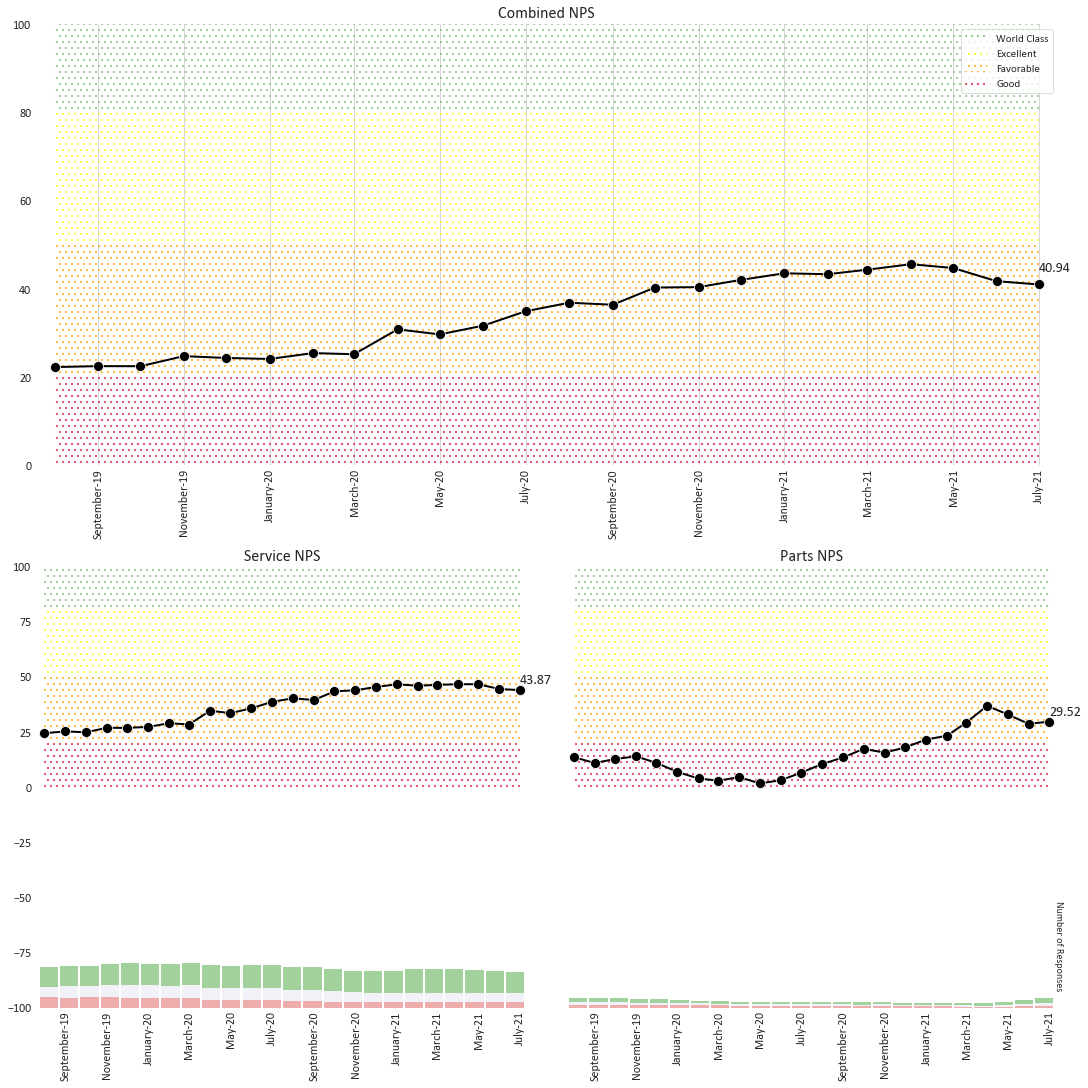

In [25]:
for columns in [['Date','Service','Parts','NPS Category'],['Date','Service','NPS Category'],['Date','Parts','NPS Category']]:
    wip = df[df['Work Type'].isin(columns[1:-1])][columns[::len(columns)-1]].dropna(subset=columns[::len(columns)-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in sorted(wip['Date'].value_counts().index):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if (('Service' in columns) & ('Parts' in columns)):
        combined_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in combined_nps.columns:
            combined_nps[col] = [combined_nps[combined_nps.index.isin(combined_nps.index[n-12:n])][col].sum() if n>11 else combined_nps[combined_nps.index.isin(combined_nps.index[:n])][col].sum() for n in range(1, len(combined_nps.index))] + [combined_nps[combined_nps.index.isin(combined_nps.index[len(combined_nps.index)-12:])][col].sum()]
        combined_nps['NPS Score'] = [(combined_nps['Promoter'][n]/np.sum(combined_nps[['Promoter','Passive','Detractor']].iloc[n])) - (combined_nps['Detractor'][n]/np.sum(combined_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(combined_nps))]
        combined_nps['NPS Score'] = 100*combined_nps['NPS Score']
    elif 'Parts' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,15))
gs = fig.add_gridspec(nrows=2, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in range(1,-2,-1):
    if num == 1:
        ax = fig.add_subplot(gs[0,:])
        working_df = combined_nps
        title = 'Combined NPS'
    else:
        ax = fig.add_subplot(gs[1, num])
        if num == 0:
            working_df = service_nps
            title = 'Service NPS'
        else:
            working_df = Parts_nps
            title = 'Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
        ax3.set_ylim(ymax=5000)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.grid(axis='x')
        ax.set_ylim(ymin=0, ymax=100)
        ax.legend(fontsize=11)
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[]);

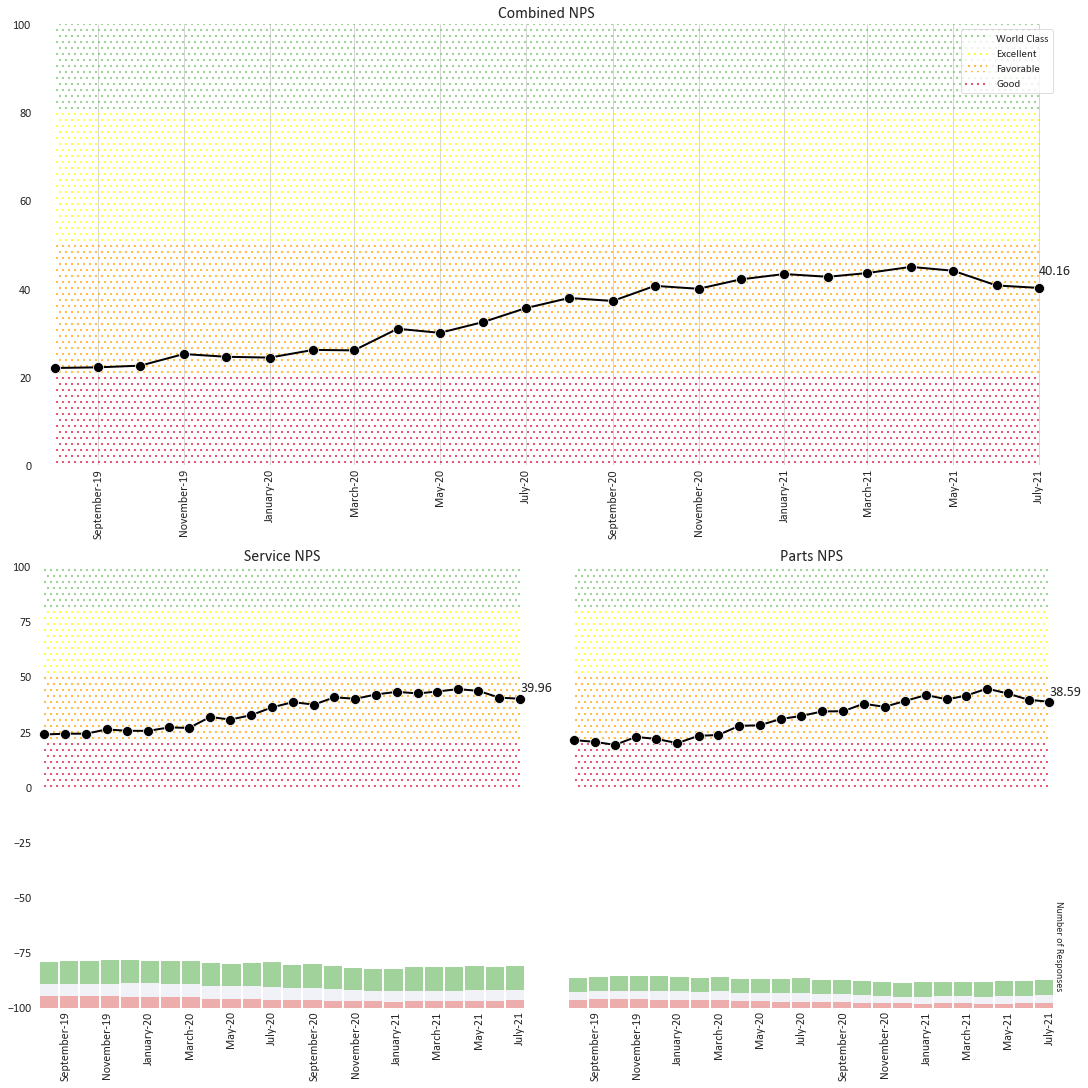

In [24]:
import matplotlib.dates as mdates

for columns in [['Date','Service CSAT','Service CES','Parts CSAT','Parts CES','NPS Category'],['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in sorted(wip['Date'].value_counts().index):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if (('Service CSAT' in columns) & ('Parts CSAT' in columns)):
        combined_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in combined_nps.columns:
            combined_nps[col] = [combined_nps[combined_nps.index.isin(combined_nps.index[n-12:n])][col].sum() if n>11 else combined_nps[combined_nps.index.isin(combined_nps.index[:n])][col].sum() for n in range(1, len(combined_nps.index))] + [combined_nps[combined_nps.index.isin(combined_nps.index[len(combined_nps.index)-12:])][col].sum()]
        combined_nps['NPS Score'] = [(combined_nps['Promoter'][n]/np.sum(combined_nps[['Promoter','Passive','Detractor']].iloc[n])) - (combined_nps['Detractor'][n]/np.sum(combined_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(combined_nps))]
        combined_nps['NPS Score'] = 100*combined_nps['NPS Score']
    elif 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,15))
gs = fig.add_gridspec(nrows=2, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in range(1,-2,-1):
    if num == 1:
        ax = fig.add_subplot(gs[0,:])
        working_df = combined_nps
        title = 'Combined NPS'
    else:
        ax = fig.add_subplot(gs[1, num])
        if num == 0:
            working_df = service_nps
            title = 'Service NPS'
        else:
            working_df = Parts_nps
            title = 'Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
        ax3.set_ylim(ymax=5000)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.grid(axis='x')
        ax.set_ylim(ymin=0, ymax=100)
        ax.legend(fontsize=11)
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[]);

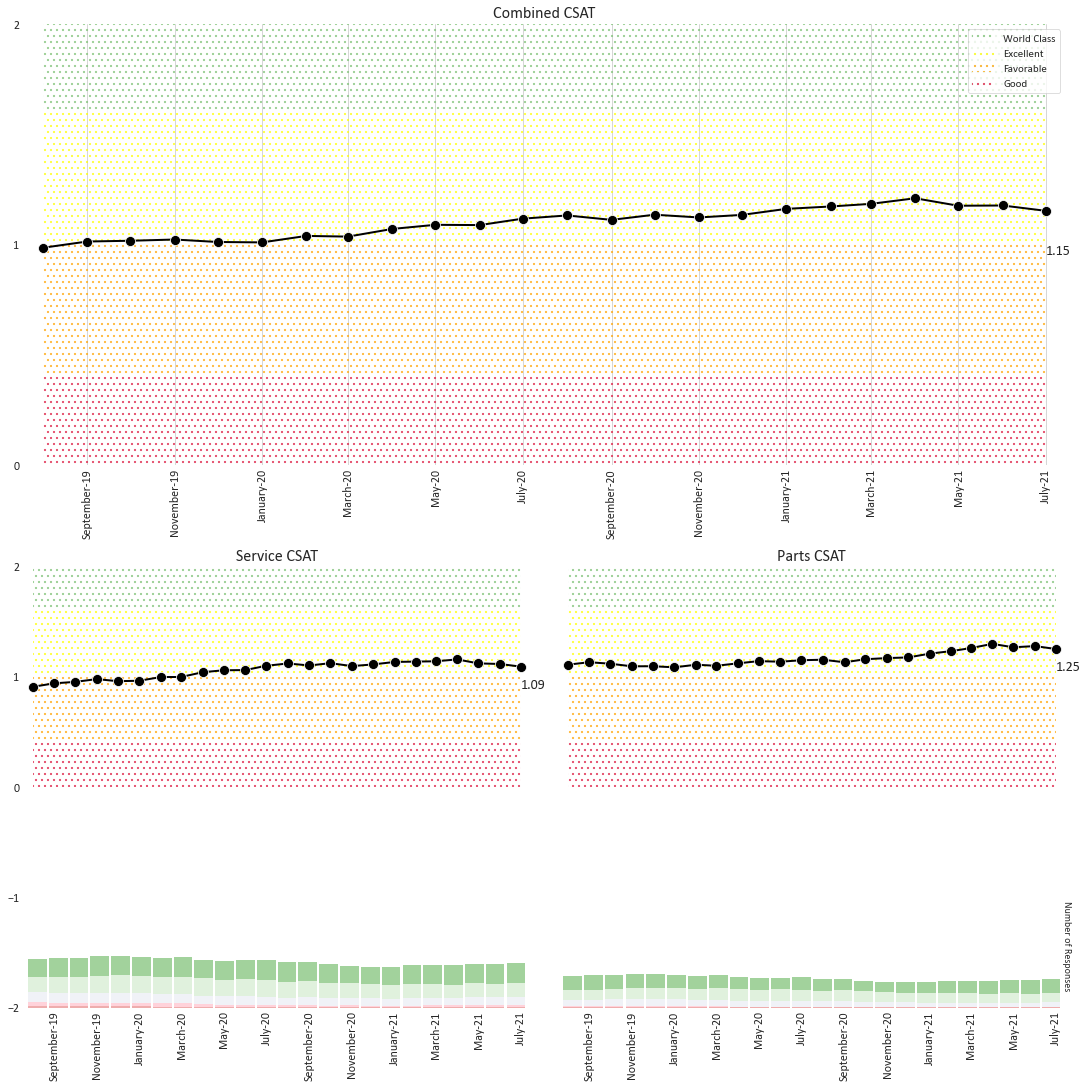

In [5]:
for columns in [['Date','Parts CSAT','Service CSAT'],['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if len(columns) == 3:
        wip = df[columns].dropna(subset=columns, how='all').groupby(by=columns[:2])['Parts CSAT'].count().to_frame(name='count')
        wip2 = df[columns].dropna(subset=columns, how='all').groupby(by=columns[::len(columns)-1])['Service CSAT'].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        wip2.index.rename(['Date','CSAT'], inplace=True)
        wip = wip.add(wip2, fill_value=0)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        combined_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        combined_csat['Mean'] = [np.nanmean(df[df['Date'].isin(all_df.index[n-12:n])][columns[1:]]) if n>11 else np.nanmean(df[df['Date'].isin(all_df.index[:n])][columns[1:]]) for n in range(1, len(all_df.index))] + [np.nanmean(df[df['Date'].isin(all_df.index[len(all_df.index)-12:])][columns[1:]])]
        for num in range(-2,3):
            combined_csat[num] = [combined_csat[combined_csat.index.isin(combined_csat.index[n-12:n])][num].sum() if n>11 else combined_csat[combined_csat.index.isin(combined_csat.index[:n])][num].sum() for n in range(1, len(combined_csat.index))] + [combined_csat[combined_csat.index.isin(combined_csat.index[len(combined_csat.index)-12:])][num].sum()]
    elif columns[-1] == 'Service CSAT':
        wip = df[columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[df['Date'].isin(all_df.index[n-12:n])][columns[1:]]) if n>11 else np.nanmean(df[df['Date'].isin(all_df.index[:n])][columns[1:]]) for n in range(1, len(all_df.index))] + [np.nanmean(df[df['Date'].isin(all_df.index[len(all_df.index)-12:])][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[df['Date'].isin(all_df.index[n-12:n])][columns[1:]]) if n>11 else np.nanmean(df[df['Date'].isin(all_df.index[:n])][columns[1:]]) for n in range(1, len(all_df.index))] + [np.nanmean(df[df['Date'].isin(all_df.index[len(all_df.index)-12:])][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,15))
gs = fig.add_gridspec(nrows=2, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in range(1,-2,-1):
    if num == 1:
        ax = fig.add_subplot(gs[0,:])
        working_df = combined_csat
        title = 'Combined CSAT'
    else:
        ax = fig.add_subplot(gs[1, num])
        if num == 0:
            working_df = service_csat
            title = 'Service CSAT'
        else:
            working_df = parts_csat
            title = 'Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=5000)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.grid(axis='x')
        ax.set_ylim(ymin=0, ymax=2)
        ax.legend(fontsize=11)
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[]);

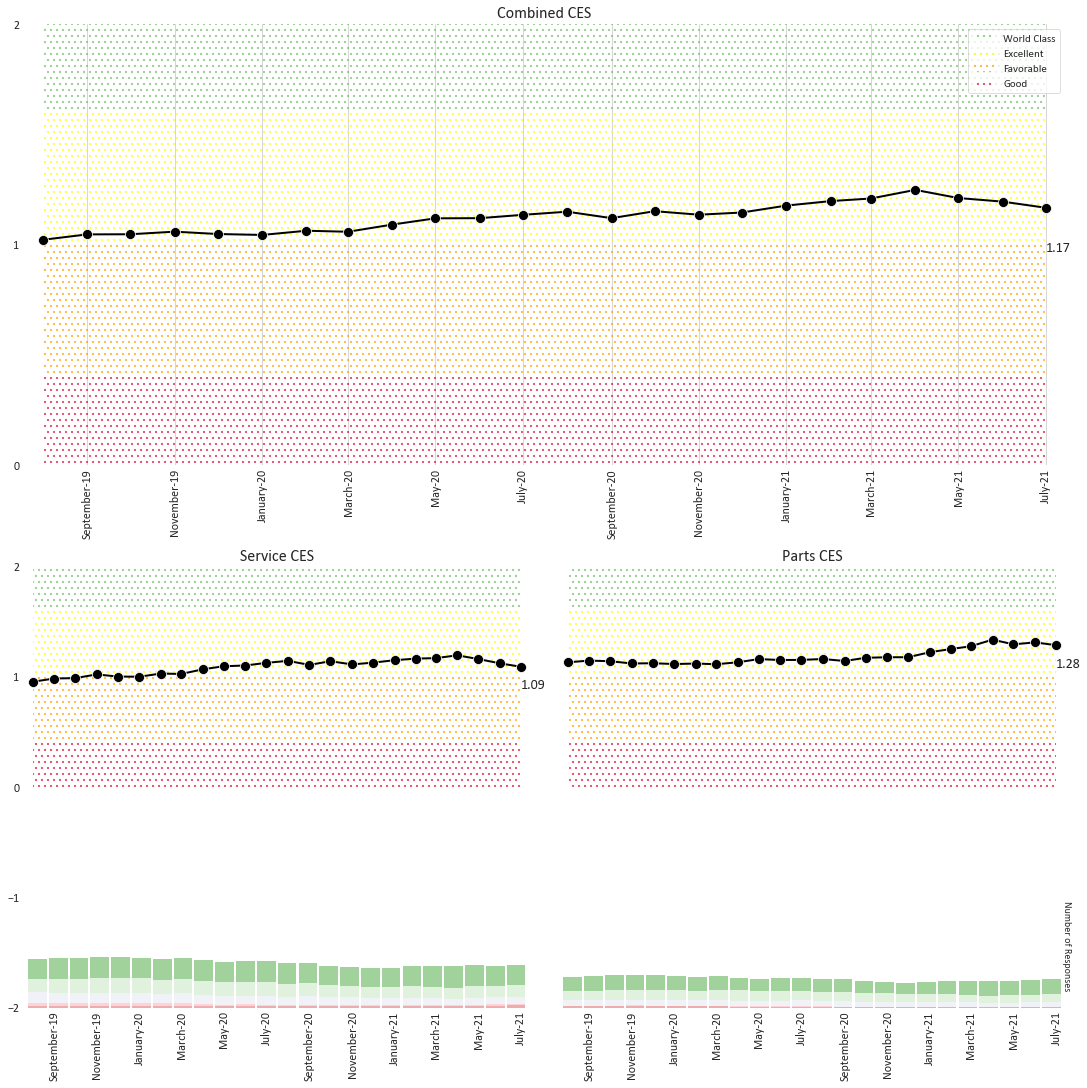

In [6]:
for columns in [['Date','Parts CES','Service CES'],['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if len(columns) == 3:
        wip = df[columns].dropna(subset=columns, how='all').groupby(by=columns[:2])['Parts CES'].count().to_frame(name='count')
        wip2 = df[columns].dropna(subset=columns, how='all').groupby(by=columns[::len(columns)-1])['Service CES'].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        wip2.index.rename(['Date','CES'], inplace=True)
        wip = wip.add(wip2, fill_value=0)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        combined_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        combined_CES['Mean'] = [np.nanmean(df[df['Date'].isin(all_df.index[n-12:n])][columns[1:]]) if n>11 else np.nanmean(df[df['Date'].isin(all_df.index[:n])][columns[1:]]) for n in range(1, len(all_df.index))] + [np.nanmean(df[df['Date'].isin(all_df.index[len(all_df.index)-12:])][columns[1:]])]
        for num in range(-2,3):
            combined_CES[num] = [combined_CES[combined_CES.index.isin(combined_CES.index[n-12:n])][num].sum() if n>11 else combined_CES[combined_CES.index.isin(combined_CES.index[:n])][num].sum() for n in range(1, len(combined_CES.index))] + [combined_CES[combined_CES.index.isin(combined_CES.index[len(combined_CES.index)-12:])][num].sum()]
    elif columns[-1] == 'Service CES':
        wip = df[columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[df['Date'].isin(all_df.index[n-12:n])][columns[1:]]) if n>11 else np.nanmean(df[df['Date'].isin(all_df.index[:n])][columns[1:]]) for n in range(1, len(all_df.index))] + [np.nanmean(df[df['Date'].isin(all_df.index[len(all_df.index)-12:])][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[df['Date'].isin(all_df.index[n-12:n])][columns[1:]]) if n>11 else np.nanmean(df[df['Date'].isin(all_df.index[:n])][columns[1:]]) for n in range(1, len(all_df.index))] + [np.nanmean(df[df['Date'].isin(all_df.index[len(all_df.index)-12:])][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,15))
gs = fig.add_gridspec(nrows=2, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in range(1,-2,-1):
    if num == 1:
        ax = fig.add_subplot(gs[0,:])
        working_df = combined_CES
        title = 'Combined CES'
    else:
        ax = fig.add_subplot(gs[1, num])
        if num == 0:
            working_df = service_CES
            title = 'Service CES'
        else:
            working_df = parts_CES
            title = 'Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=5000)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
        ax.legend(fontsize=11)
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[]);

''

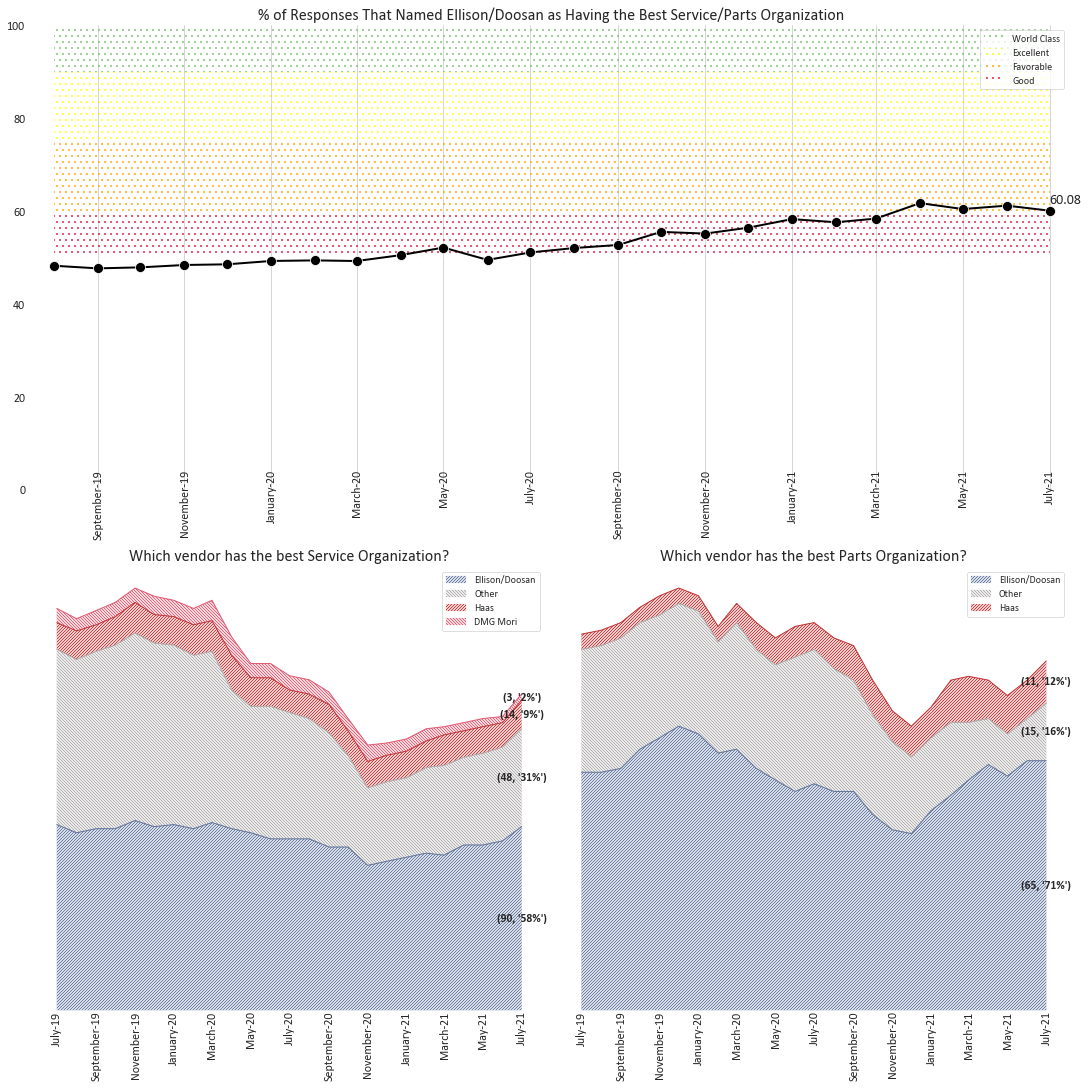

In [83]:
df[['Best Service Vendor','Best Parts Vendor']] = best

for columns in [['Date','Best Service Vendor','Best Parts Vendor'],['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if len(columns) == 3:
        wip = df[columns].dropna(subset=columns, how='all').groupby(by=columns[:2])['Best Parts Vendor'].count().to_frame(name='count')
        wip2 = df[columns].dropna(subset=columns, how='all').groupby(by=columns[::len(columns)-1])['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        wip2.index.rename(['Date','Best'], inplace=True)
        wip = wip.add(wip2, fill_value=0)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_combined = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        best_combined['Share'] = [df[df['Date'].isin(all_df.index[n-12:n])][columns[1:]].stack().value_counts()['Ellison/Doosan']/df[df['Date'].isin(all_df.index[n-12:n])][columns[1:]].stack().value_counts().sum() if n>11 else df[df['Date'].isin(all_df.index[:n])][columns[1:]].stack().value_counts()['Ellison/Doosan']/df[df['Date'].isin(all_df.index[:n])][columns[1:]].stack().value_counts().sum() for n in range(1,len(all_df.index))] + [df[df['Date'].isin(all_df.index[len(all_df.index)-12:])][columns[1:]].stack().value_counts()['Ellison/Doosan']/df[df['Date'].isin(all_df.index[len(all_df.index)-12:])][columns[1:]].stack().value_counts().sum()]
        best_combined['Share'] = best_combined['Share'] * 100
    elif columns[-1] == 'Best Service Vendor':
        wip = df[columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>2) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>2) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>2) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>2) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,15))
gs = fig.add_gridspec(nrows=2, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in range(1,-2,-1):
    if num == 1:
        ax = fig.add_subplot(gs[0,:])
        working_df = best_combined
        title = '% of Responses That Named Ellison/Doosan as Having the Best Service/Parts Organization'
        sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Share'], ax=ax, color='black', marker='o', 
                     legend=None, markersize=10, linewidth=2)
        ax.set_ylim(ymin=0, ymax=100)
        thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[90,'yellow','Excellent'],[75,'orange','Favorable'],
                  [60,'crimson','Good'],[50]]
        for n in range(4):
            ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0, alpha=0.7, label=thresholds[n][2])
        ax.tick_params(axis='y', labelsize=12, which='both')
        ax.annotate("{:.2f}".format(working_df['Share'][-1]), xy=([item for item in working_df['Share'].items()][-1][0],
                                                                [item for item in working_df['Share'].items()][-1][1]+1.5),
            fontsize=14)
        ax.yaxis.label.set_visible(False)
        ax.grid(axis='y')
        ax.set_ylim(ymin=0, ymax=100)
        ax.margins(x=0.02)
        ax.legend(fontsize=11)
    else:
        ax = fig.add_subplot(gs[1, num])
        if num == 0:
            working_df = best_service
            title = 'Which vendor has the best Service Organization?'
        else:
            working_df = best_Parts
            title = 'Which vendor has the best Parts Organization?'
        colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
                  ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////'],['#ff6404','\\\\\\\\\\\\\\\\']]
        for x in range(len(working_df.columns)):
            if x == 0:
                ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                               facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                               label=working_df.columns[x])
                ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                        label='_nolegend_', color=colors[x][0])
            elif x == 1:
                ax.fill_between(working_df.tail(25).index, 
                                [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                               working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                                hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                               label=working_df.columns[x])
                ax.plot(working_df.tail(25).index, 
                        [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                        label='_nolegend_', color=colors[x][0])
            else:
                ax.fill_between(working_df.tail(25).index, 
                                [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                               [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                               facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                               label=working_df.columns[x])
                ax.plot(working_df.tail(25).index, 
                        [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                        label='_nolegend_', color=colors[x][0])
        for x1 in working_df.index[-1:]:
            yCenteredS = working_df.loc[x1].cumsum()
            yCenteredS = [0.0] + yCenteredS.tolist()
            yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
            labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
            for _, y, value in labels.itertuples():
                ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                            xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
                ax.set(yticks=[])
        ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

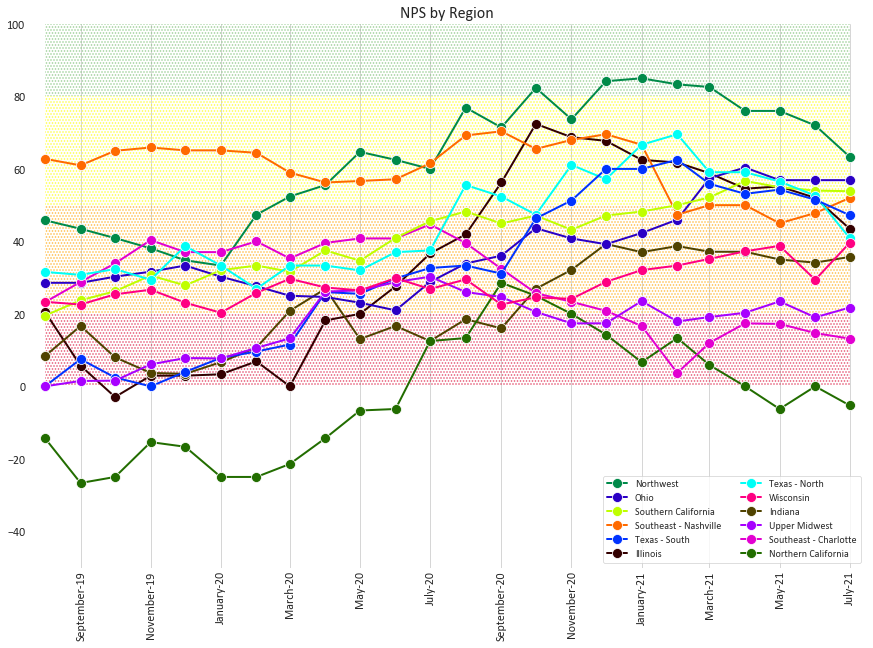

In [22]:
import math
from matplotlib.colors import ListedColormap
from matplotlib.cm import hsv

def generate_colormap(number_of_distinct_colors: int = 80):
    if number_of_distinct_colors == 0:
        number_of_distinct_colors = 80
    number_of_shades = 7
    number_of_distinct_colors_with_multiply_of_shades = int(math.ceil(number_of_distinct_colors / number_of_shades) * number_of_shades)
    linearly_distributed_nums = np.arange(number_of_distinct_colors_with_multiply_of_shades) / number_of_distinct_colors_with_multiply_of_shades
    arr_by_shade_rows = linearly_distributed_nums.reshape(number_of_shades, number_of_distinct_colors_with_multiply_of_shades // number_of_shades)
    arr_by_shade_columns = arr_by_shade_rows.T
    number_of_partitions = arr_by_shade_columns.shape[0]
    nums_distributed_like_rising_saw = arr_by_shade_columns.reshape(-1)
    initial_cm = hsv(nums_distributed_like_rising_saw)
    lower_partitions_half = number_of_partitions // 2
    upper_partitions_half = number_of_partitions - lower_partitions_half
    lower_half = lower_partitions_half * number_of_shades
    for i in range(3):
        initial_cm[0:lower_half, i] *= np.arange(0.2, 1, 0.8/lower_half)
    for i in range(3):
        for j in range(upper_partitions_half):
            modifier = np.ones(number_of_shades) - initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i]
            modifier = j * modifier / upper_partitions_half
            initial_cm[lower_half + j * number_of_shades: lower_half + (j + 1) * number_of_shades, i] += modifier
    return ListedColormap(initial_cm)

fig,ax = plt.subplots(figsize=(15,10))
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

columns = ['Date','Service CSAT','Service CES','Parts CSAT','Parts CES','NPS Category']
order = {}

for region in np.unique(df['Region']):
    wip = df[df['Region']==region][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
    for col in nps.columns:
        nps[col] = [nps[nps.index.isin(nps.index[n-12:n])][col].sum() if n>11 else nps[nps.index.isin(nps.index[:n])][col].sum() for n in range(1, len(nps.index))] + [nps[nps.index.isin(nps.index[len(nps.index)-12:])][col].sum()]
    nps['NPS Score'] = [(nps['Promoter'][n]/np.sum(nps[['Promoter','Passive','Detractor']].iloc[n])) - (nps['Detractor'][n]/np.sum(nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(nps))]
    nps['NPS Score'] = 100*nps['NPS Score']
    sns.lineplot(x=nps.tail(24).index, y=nps.tail(24)['NPS Score'], ax=ax, marker='o', markersize=10, linewidth=2,
                label=region)
    order[region] = nps['NPS Score'][-1]
order = {k: v for k, v in sorted(order.items(), key=lambda item: item[1], reverse=True)}

ax.legend()
ax.set_title('NPS by Region', fontsize=16)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
loc = matplotlib.dates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
ax.tick_params(axis='x', rotation=90, labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.margins(x=0.02)
ax.set_ylim(ymin=-50, ymax=100)
ax.grid(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
for location in ['top','right','left','bottom']:
    ax.spines[location].set_visible(False)
thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
              [20,'crimson','Good'],[0]]
for n in range(4):
    ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                    hatch='....', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
colormap = generate_colormap(12)
colors = [colormap(i) for i in np.linspace(0, 1,len(np.unique(df['Region'])))]
for i,j in enumerate(ax.lines):
    j.set_color(colors[i])
handles, labels = ax.get_legend_handles_labels()
legend = [[pair[0], region] for region in order.keys() for pair in list(zip(handles, labels)) if region in pair ]
ax.legend([legend[0] for legend in legend],[legend[1] for legend in legend], fontsize=10, loc='lower right', ncol=2)
ax.grid(axis='x');

# Illinois

In [23]:
illinois_df = df[df['Region']=='Illinois'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in illinois_df.index:
        illinois_df = pd.concat([illinois_df[illinois_df.index<date], 
                  pd.DataFrame({column: 0 for column in illinois_df.columns}, index=[date]),
                   illinois_df[illinois_df.index>date]], axis=0)
for column in illinois_df.columns[:-1]:
    illinois_df[column] = [df.loc[(df['Date'].isin(illinois_df.index[n-12:n]))&(df['Region']=='Illinois')][column].mean() if n>11 else df.loc[(df['Date'].isin(illinois_df.index[:n]))&(df['Region']=='Illinois')][column].mean() for n in range(1, len(illinois_df.index))] + [df.loc[(df['Date'].isin(illinois_df.index[len(illinois_df.index)-12:]))&(df['Region']=='Illinois')][column].mean()]

illinois_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
2021-03-01      1.558824     1.545455    1.294118   1.352941        8.5
2021-04-01      1.535354     1.531250    1.294118   1.411765        7.0
2021-05-01      1.528736     1.535714    1.307692   1.307692       10.0
2021-06-01      1.573333     1.541667    1.277778   1.250000        7.5
2021-07-01      1.550725     1.500000    1.256410   1.230769        8.0

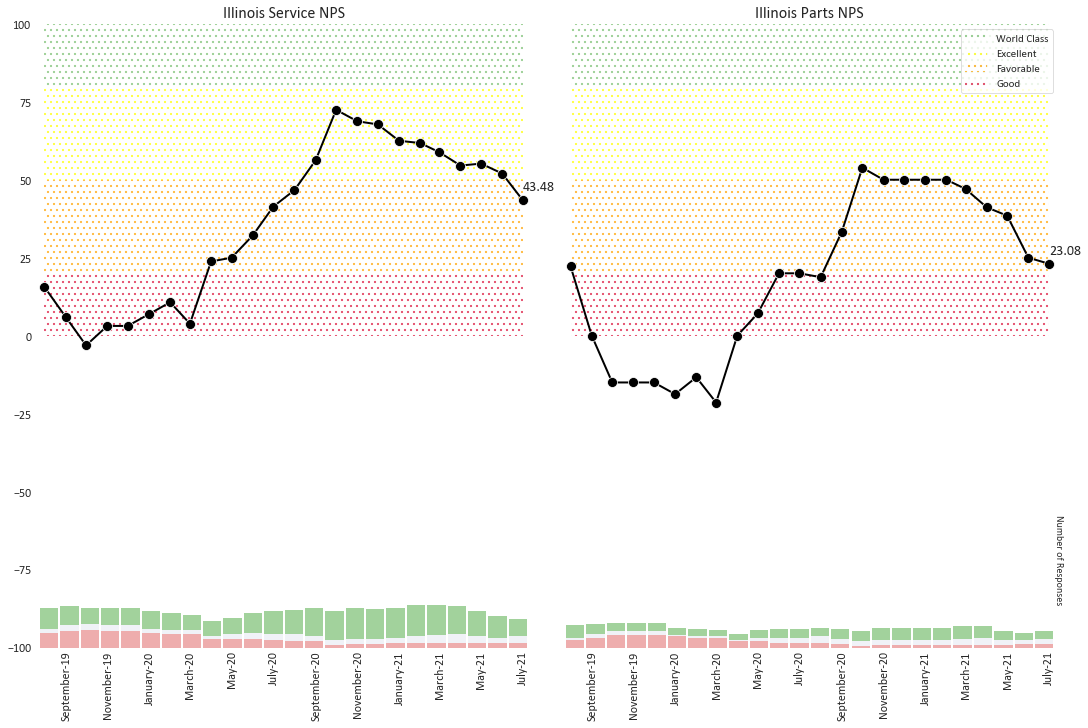

In [24]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Illinois'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Illinois Service NPS'
    else:
        working_df = Parts_nps
        title = 'Illinois Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

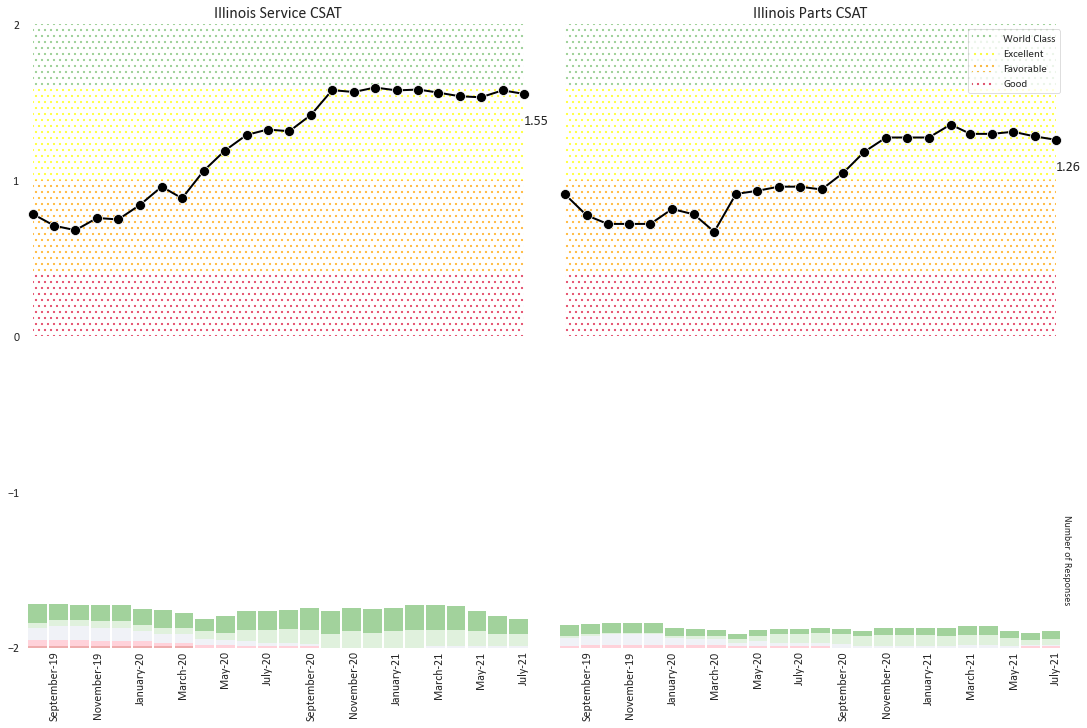

In [25]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Illinois'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(illinois_df.index[n-12:n]))&(df['Region']=='Illinois'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(illinois_df.index[:n]))&(df['Region']=='Illinois'))][columns[1:]]) for n in range(1, len(illinois_df.index))] + [np.nanmean(df[((df['Date'].isin(illinois_df.index[len(illinois_df.index)-12:])&(df['Region']=='Illinois')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Illinois'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(illinois_df.index[n-12:n]))&(df['Region']=='Illinois'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(illinois_df.index[:n]))&(df['Region']=='Illinois'))][columns[1:]]) for n in range(1, len(illinois_df.index))] + [np.nanmean(df[((df['Date'].isin(illinois_df.index[len(illinois_df.index)-12:])&(df['Region']=='Illinois')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Illinois Service CSAT'
    else:
        working_df = parts_csat
        title = 'Illinois Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(illinois_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

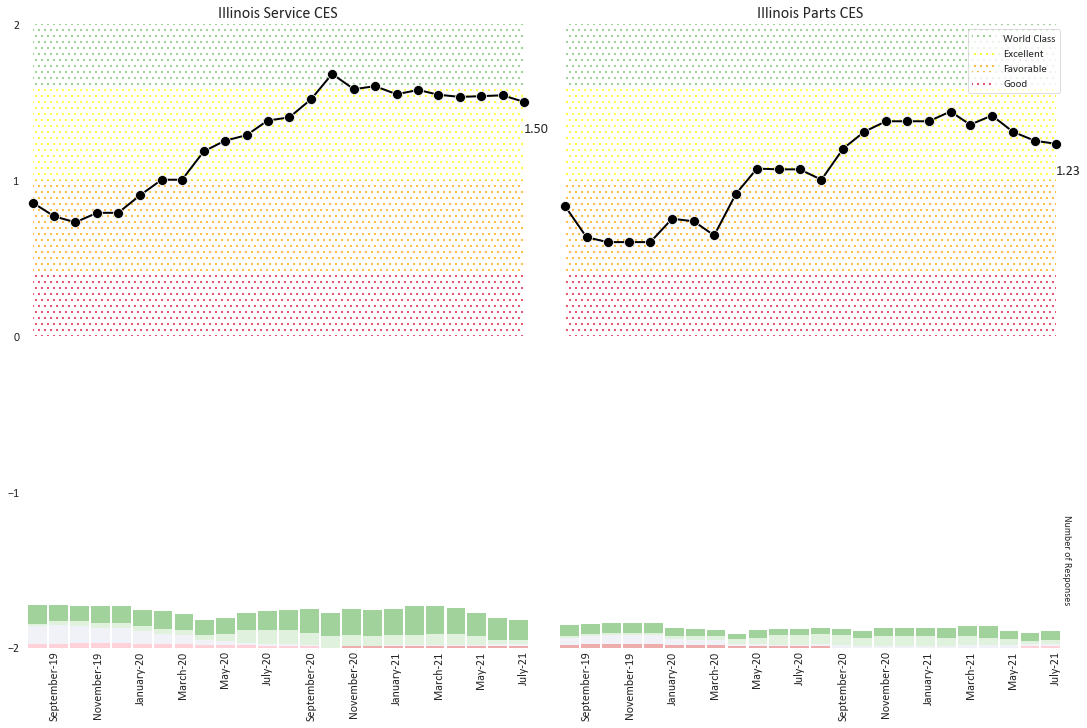

In [26]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Illinois'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(illinois_df.index[n-12:n]))&(df['Region']=='Illinois'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(illinois_df.index[:n]))&(df['Region']=='Illinois'))][columns[1:]]) for n in range(1, len(illinois_df.index))] + [np.nanmean(df[((df['Date'].isin(illinois_df.index[len(illinois_df.index)-12:])&(df['Region']=='Illinois')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Illinois'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(illinois_df.index[n-12:n]))&(df['Region']=='Illinois'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(illinois_df.index[:n]))&(df['Region']=='Illinois'))][columns[1:]]) for n in range(1, len(illinois_df.index))] + [np.nanmean(df[((df['Date'].isin(illinois_df.index[len(illinois_df.index)-12:])&(df['Region']=='Illinois')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Illinois Service CES'
    else:
        working_df = parts_CES
        title = 'Illinois Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

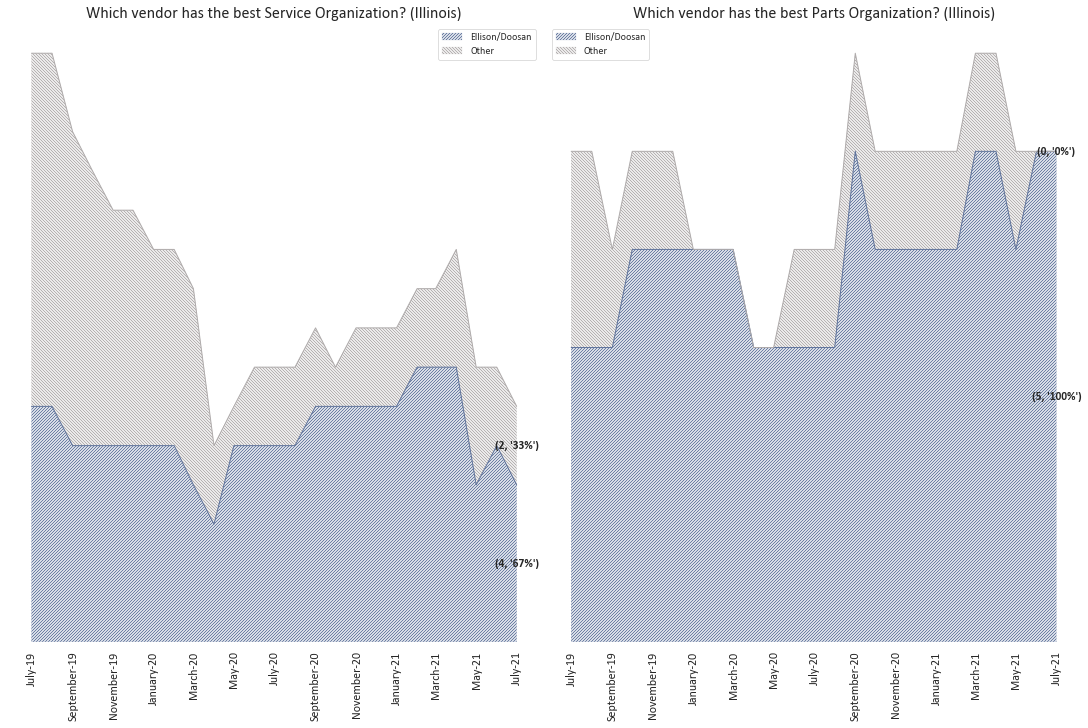

In [84]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Illinois'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Illinois'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Illinois)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Illinois)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Indiana

In [28]:
indiana_df = df[df['Region']=='Indiana'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in indiana_df.index:
        indiana_df = pd.concat([indiana_df[indiana_df.index<date], 
                  pd.DataFrame({column: 0 for column in indiana_df.columns}, index=[date]),
                   indiana_df[indiana_df.index>date]], axis=0)
for column in indiana_df.columns[:-1]:
    indiana_df[column] = [df.loc[(df['Date'].isin(indiana_df.index[n-12:n]))&(df['Region']=='Indiana')][column].mean() if n>11 else df.loc[(df['Date'].isin(indiana_df.index[:n]))&(df['Region']=='Indiana')][column].mean() for n in range(1, len(indiana_df.index))] + [df.loc[(df['Date'].isin(indiana_df.index[len(indiana_df.index)-12:]))&(df['Region']=='Indiana')][column].mean()]

indiana_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
2021-03-01      1.229730     1.194444    1.283333   1.263158       8.00
2021-04-01      1.247748     1.166667    1.233333   1.222222       8.25
2021-05-01      1.170833     1.128205    1.136364   1.105263       8.00
2021-06-01      1.182927     1.100000    1.222222   1.222222       8.00
2021-07-01      1.198413     1.073171    1.121212   1.105263       7.50

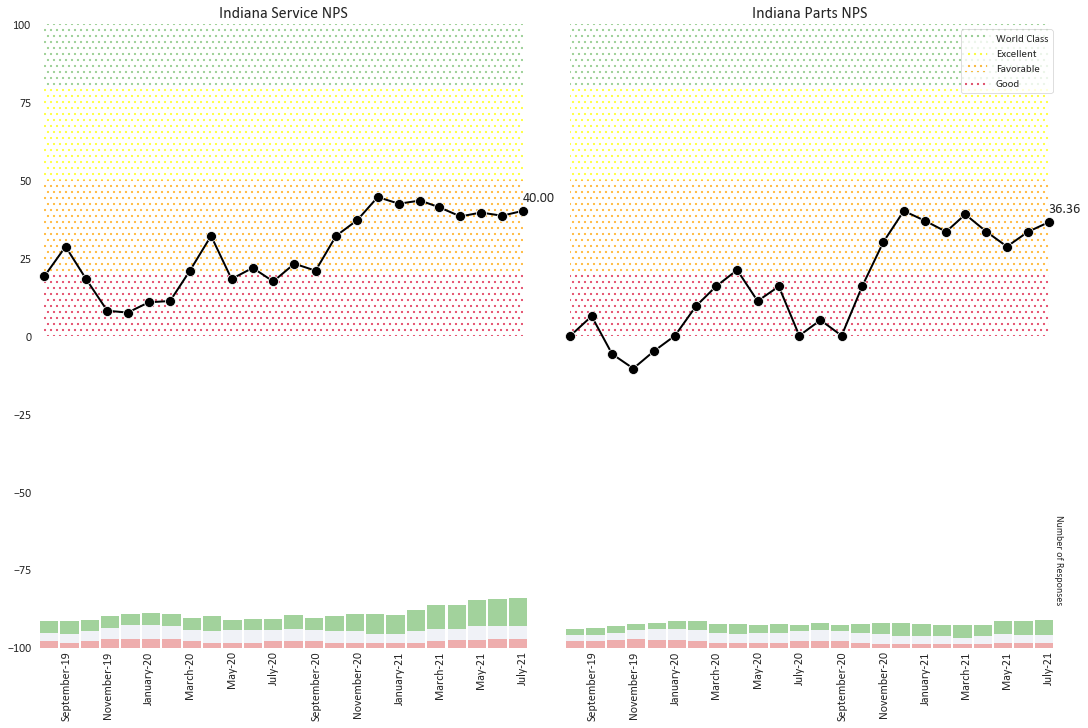

In [29]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Indiana'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Indiana Service NPS'
    else:
        working_df = Parts_nps
        title = 'Indiana Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

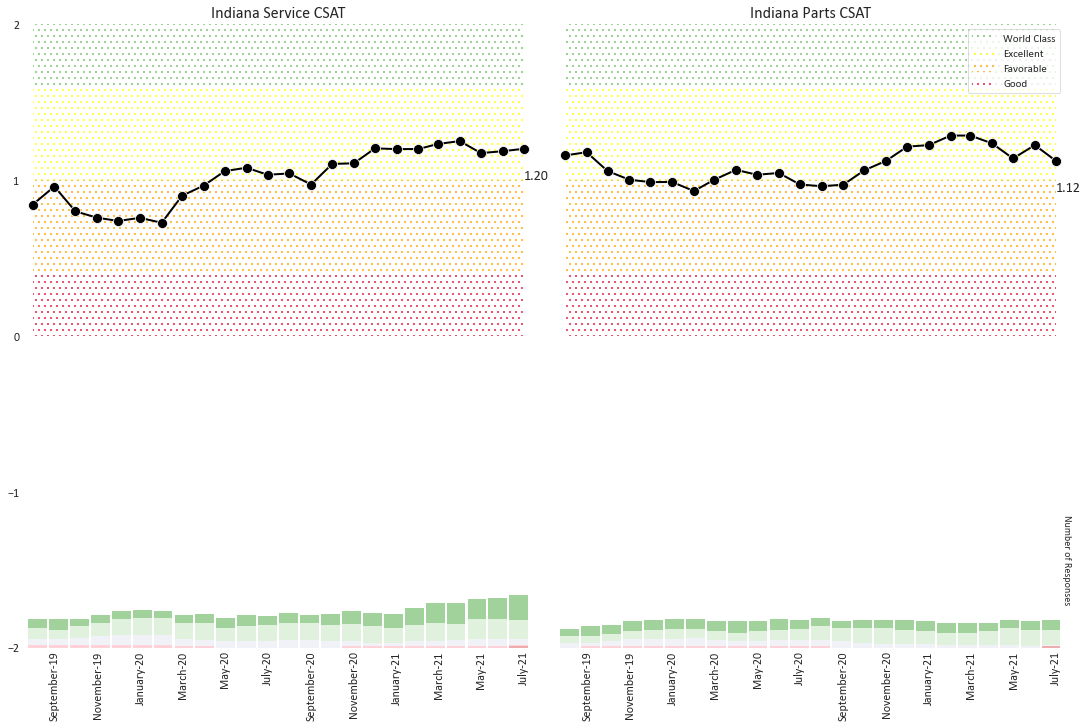

In [30]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Indiana'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(indiana_df.index[n-12:n]))&(df['Region']=='Indiana'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(indiana_df.index[:n]))&(df['Region']=='Indiana'))][columns[1:]]) for n in range(1, len(indiana_df.index))] + [np.nanmean(df[((df['Date'].isin(indiana_df.index[len(indiana_df.index)-12:])&(df['Region']=='Indiana')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Indiana'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(indiana_df.index[n-12:n]))&(df['Region']=='Indiana'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(indiana_df.index[:n]))&(df['Region']=='Indiana'))][columns[1:]]) for n in range(1, len(indiana_df.index))] + [np.nanmean(df[((df['Date'].isin(indiana_df.index[len(indiana_df.index)-12:])&(df['Region']=='Indiana')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Indiana Service CSAT'
    else:
        working_df = parts_csat
        title = 'Indiana Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(indiana_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

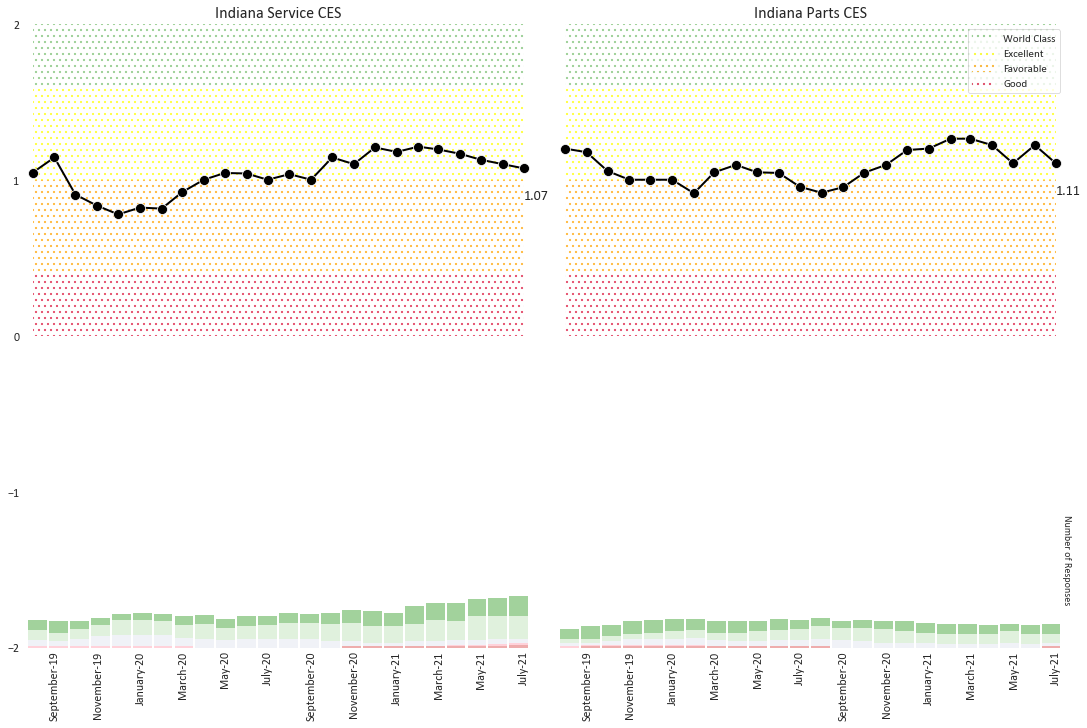

In [31]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Indiana'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(indiana_df.index[n-12:n]))&(df['Region']=='Indiana'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(indiana_df.index[:n]))&(df['Region']=='Indiana'))][columns[1:]]) for n in range(1, len(indiana_df.index))] + [np.nanmean(df[((df['Date'].isin(indiana_df.index[len(indiana_df.index)-12:])&(df['Region']=='Indiana')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Indiana'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(indiana_df.index[n-12:n]))&(df['Region']=='Indiana'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(indiana_df.index[:n]))&(df['Region']=='Indiana'))][columns[1:]]) for n in range(1, len(indiana_df.index))] + [np.nanmean(df[((df['Date'].isin(indiana_df.index[len(indiana_df.index)-12:])&(df['Region']=='Indiana')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Indiana Service CES'
    else:
        working_df = parts_CES
        title = 'Indiana Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

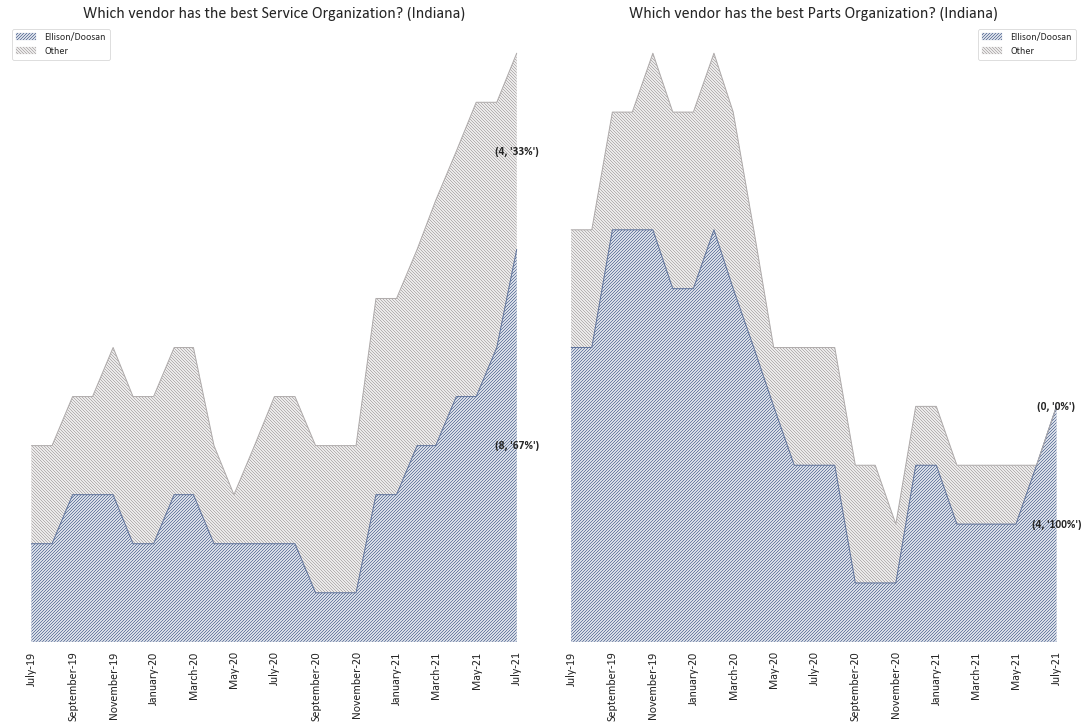

In [85]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Indiana'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Indiana'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Indiana)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Indiana)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Northern California

In [33]:
norcal_df = df[df['Region']=='Northern California'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in norcal_df.index:
        norcal_df = pd.concat([norcal_df[norcal_df.index<date], 
                  pd.DataFrame({column: 0 for column in norcal_df.columns}, index=[date]),
                   norcal_df[norcal_df.index>date]], axis=0)
for column in norcal_df.columns[:-1]:
    norcal_df[column] = [df.loc[(df['Date'].isin(norcal_df.index[n-12:n]))&(df['Region']=='Northern California')][column].mean() if n>11 else df.loc[(df['Date'].isin(norcal_df.index[:n]))&(df['Region']=='Northern California')][column].mean() for n in range(1, len(norcal_df.index))] + [df.loc[(df['Date'].isin(norcal_df.index[len(norcal_df.index)-12:]))&(df['Region']=='Northern California')][column].mean()]

norcal_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
2021-03-01      0.555556     0.500000    0.916667   1.071429        4.5
2021-04-01      0.574074     0.500000    0.916667   1.071429        4.0
2021-05-01      0.490196     0.411765    0.833333   1.000000        0.0
2021-06-01      0.421053     0.315789    0.760417   0.812500        8.0
2021-07-01      0.254902     0.117647    0.644444   0.666667        8.0

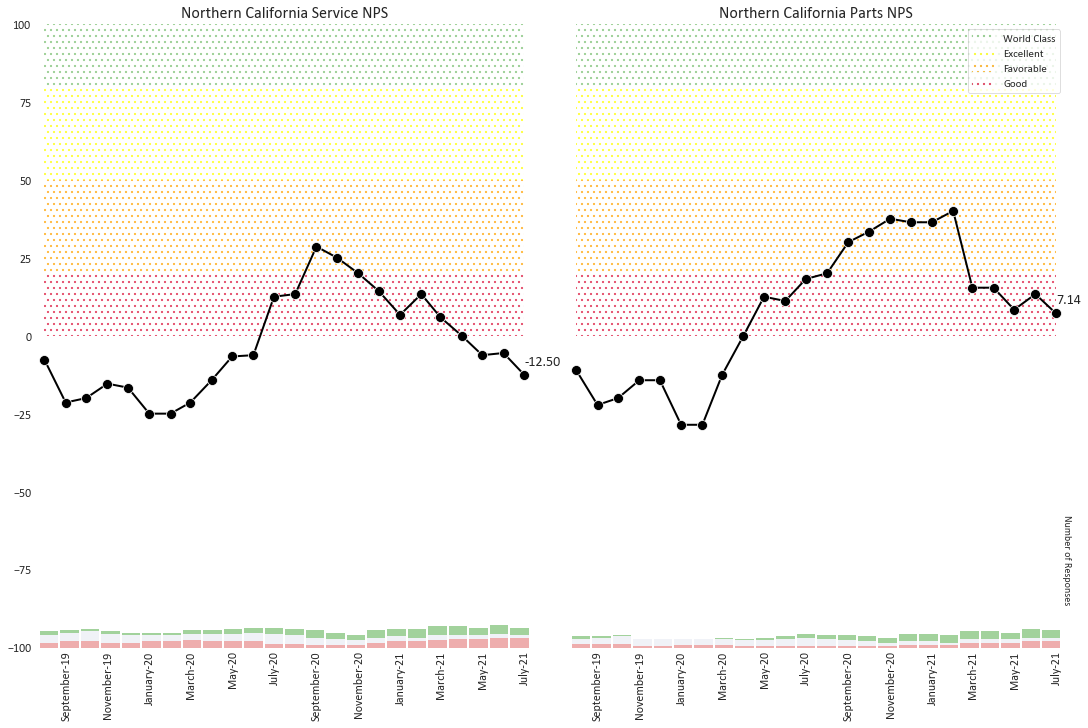

In [34]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Northern California'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Northern California Service NPS'
    else:
        working_df = Parts_nps
        title = 'Northern California Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

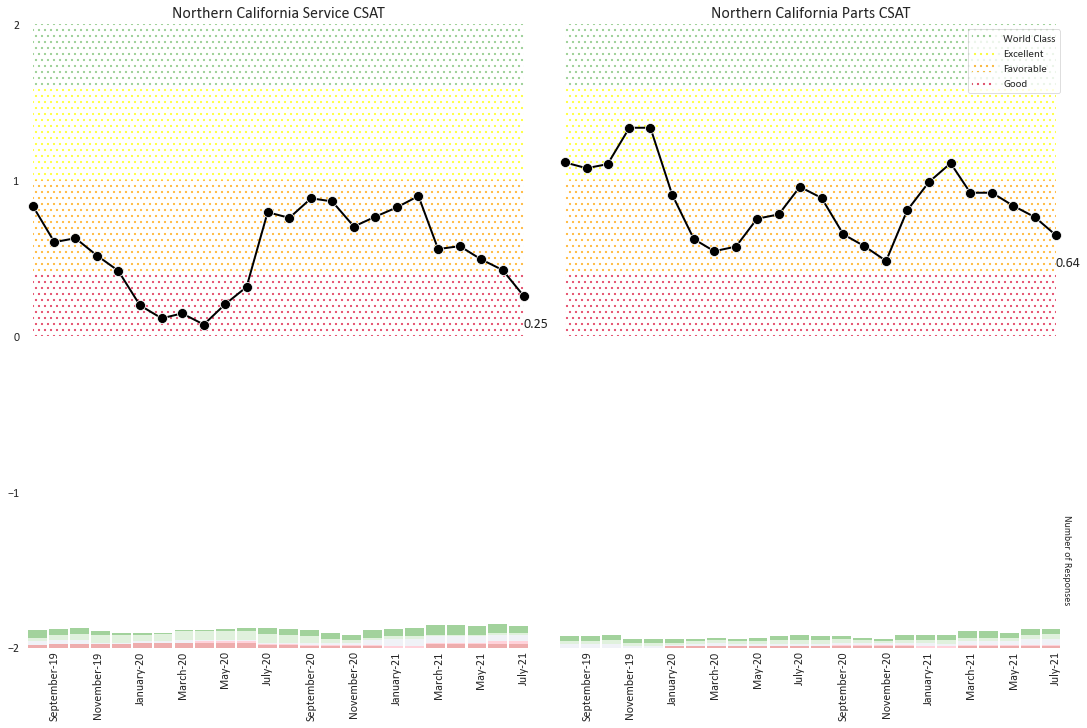

In [35]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Northern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(norcal_df.index[n-12:n]))&(df['Region']=='Northern California'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(norcal_df.index[:n]))&(df['Region']=='Northern California'))][columns[1:]]) for n in range(1, len(norcal_df.index))] + [np.nanmean(df[((df['Date'].isin(norcal_df.index[len(norcal_df.index)-12:])&(df['Region']=='Northern California')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Northern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(norcal_df.index[n-12:n]))&(df['Region']=='Northern California'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(norcal_df.index[:n]))&(df['Region']=='Northern California'))][columns[1:]]) for n in range(1, len(norcal_df.index))] + [np.nanmean(df[((df['Date'].isin(norcal_df.index[len(norcal_df.index)-12:])&(df['Region']=='Northern California')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Northern California Service CSAT'
    else:
        working_df = parts_csat
        title = 'Northern California Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(norcal_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

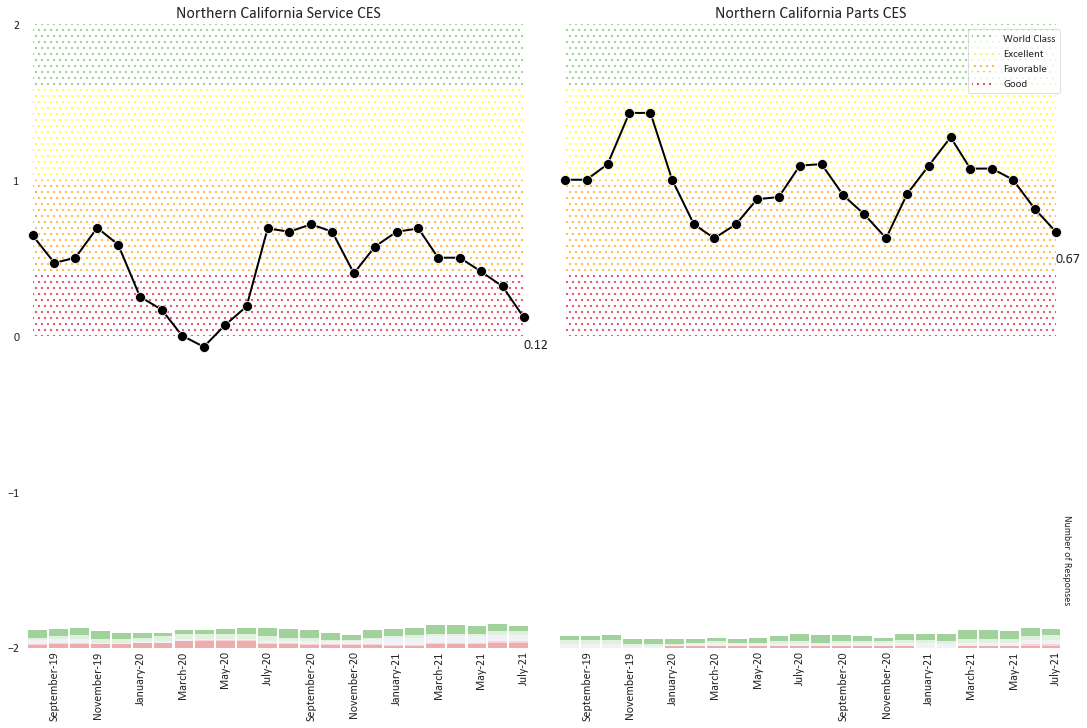

In [36]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Northern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(norcal_df.index[n-12:n]))&(df['Region']=='Northern California'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(norcal_df.index[:n]))&(df['Region']=='Northern California'))][columns[1:]]) for n in range(1, len(norcal_df.index))] + [np.nanmean(df[((df['Date'].isin(norcal_df.index[len(norcal_df.index)-12:])&(df['Region']=='Northern California')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Northern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(norcal_df.index[n-12:n]))&(df['Region']=='Northern California'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(norcal_df.index[:n]))&(df['Region']=='Northern California'))][columns[1:]]) for n in range(1, len(norcal_df.index))] + [np.nanmean(df[((df['Date'].isin(norcal_df.index[len(norcal_df.index)-12:])&(df['Region']=='Northern California')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Northern California Service CES'
    else:
        working_df = parts_CES
        title = 'Northern California Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

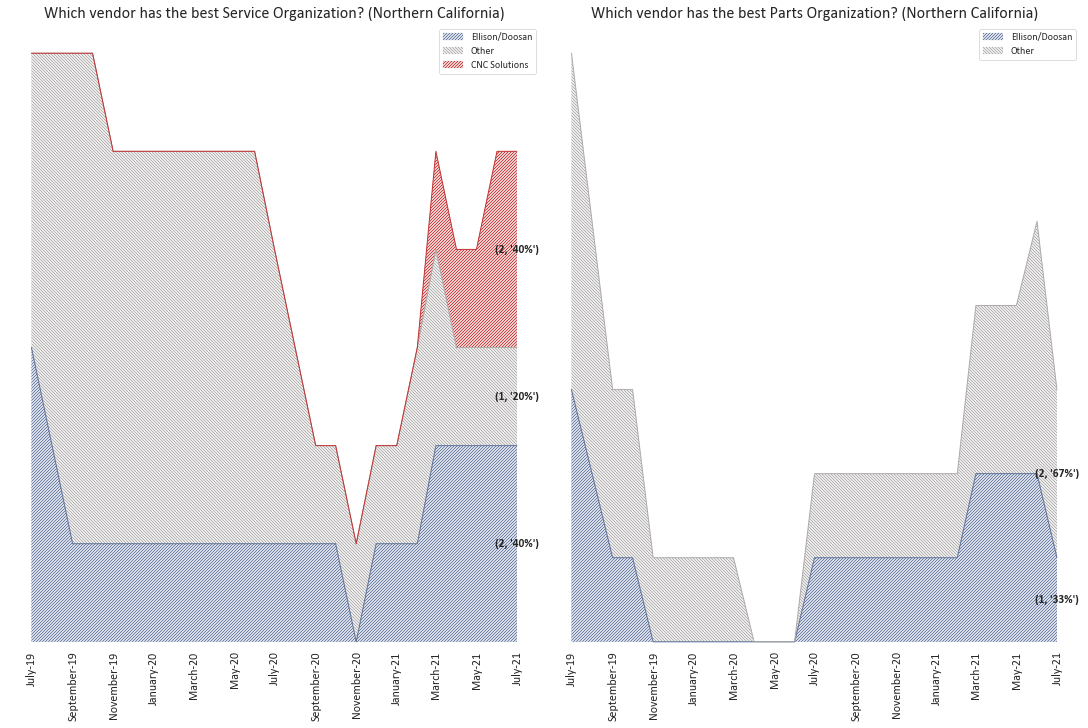

In [86]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Northern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Northern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Northern California)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Northern California)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Northwest

In [38]:
northwest_df = df[df['Region']=='Northwest'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in northwest_df.index:
        northwest_df = pd.concat([northwest_df[northwest_df.index<date], 
                  pd.DataFrame({column: 0 for column in northwest_df.columns}, index=[date]),
                   northwest_df[northwest_df.index>date]], axis=0)
for column in northwest_df.columns[:-1]:
    northwest_df[column] = [df.loc[(df['Date'].isin(northwest_df.index[n-12:n]))&(df['Region']=='Northwest')][column].mean() if n>11 else df.loc[(df['Date'].isin(northwest_df.index[:n]))&(df['Region']=='Northwest')][column].mean() for n in range(1, len(northwest_df.index))] + [df.loc[(df['Date'].isin(northwest_df.index[len(northwest_df.index)-12:]))&(df['Region']=='Northwest')][column].mean()]

northwest_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
2021-03-01      1.420290     1.652174    1.564103   1.846154       10.0
2021-04-01      1.346667     1.600000    1.564103   1.846154        8.0
2021-05-01      1.346667     1.600000    1.564103   1.846154       10.0
2021-06-01      1.280000     1.520000    1.595238   1.857143        7.0
2021-07-01      1.222222     1.366667    1.431373   1.647059        6.8

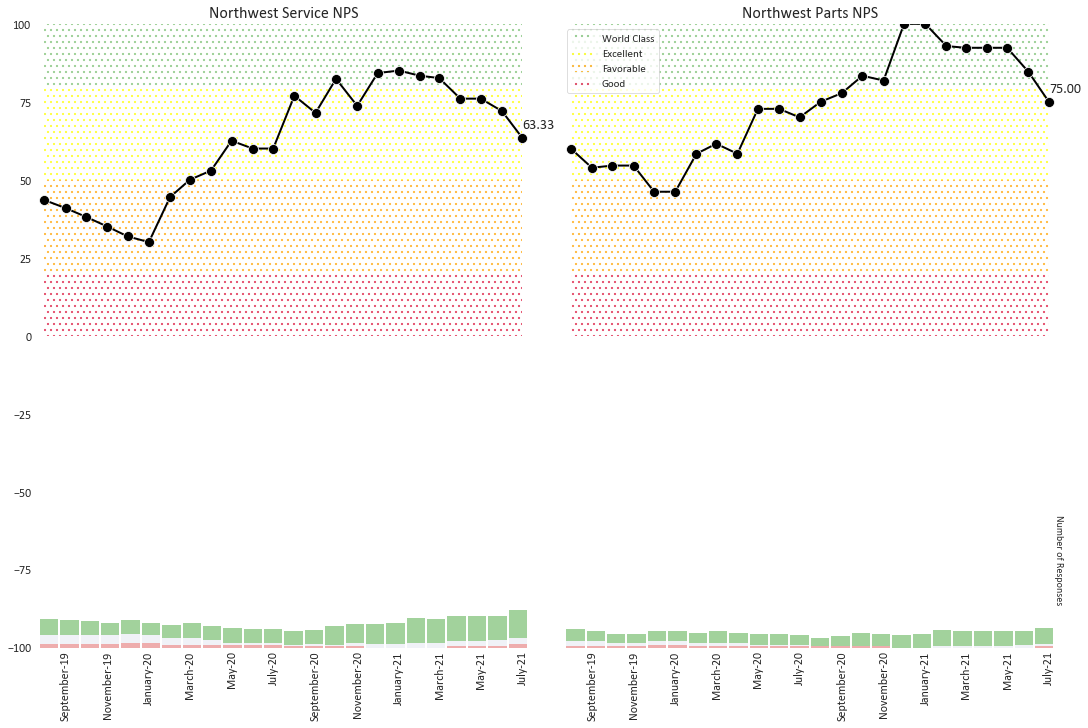

In [39]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Northwest'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Northwest Service NPS'
    else:
        working_df = Parts_nps
        title = 'Northwest Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

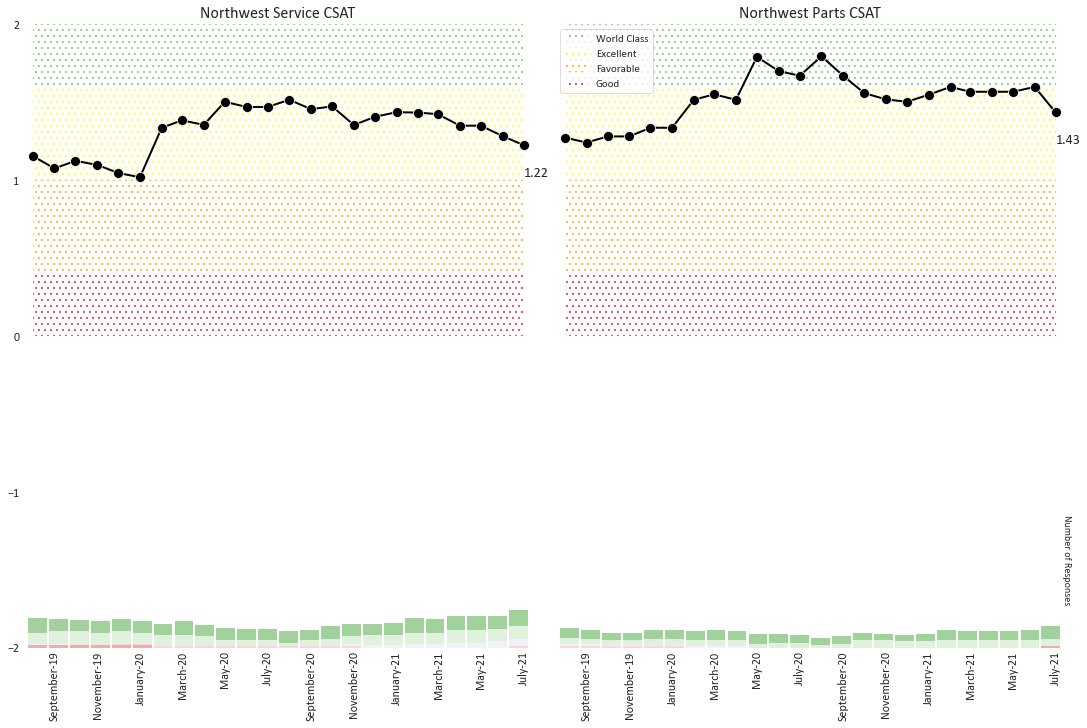

In [40]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Northwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(northwest_df.index[n-12:n]))&(df['Region']=='Northwest'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(northwest_df.index[:n]))&(df['Region']=='Northwest'))][columns[1:]]) for n in range(1, len(northwest_df.index))] + [np.nanmean(df[((df['Date'].isin(northwest_df.index[len(northwest_df.index)-12:])&(df['Region']=='Northwest')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Northwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(northwest_df.index[n-12:n]))&(df['Region']=='Northwest'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(northwest_df.index[:n]))&(df['Region']=='Northwest'))][columns[1:]]) for n in range(1, len(northwest_df.index))] + [np.nanmean(df[((df['Date'].isin(northwest_df.index[len(northwest_df.index)-12:])&(df['Region']=='Northwest')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Northwest Service CSAT'
    else:
        working_df = parts_csat
        title = 'Northwest Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(northwest_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

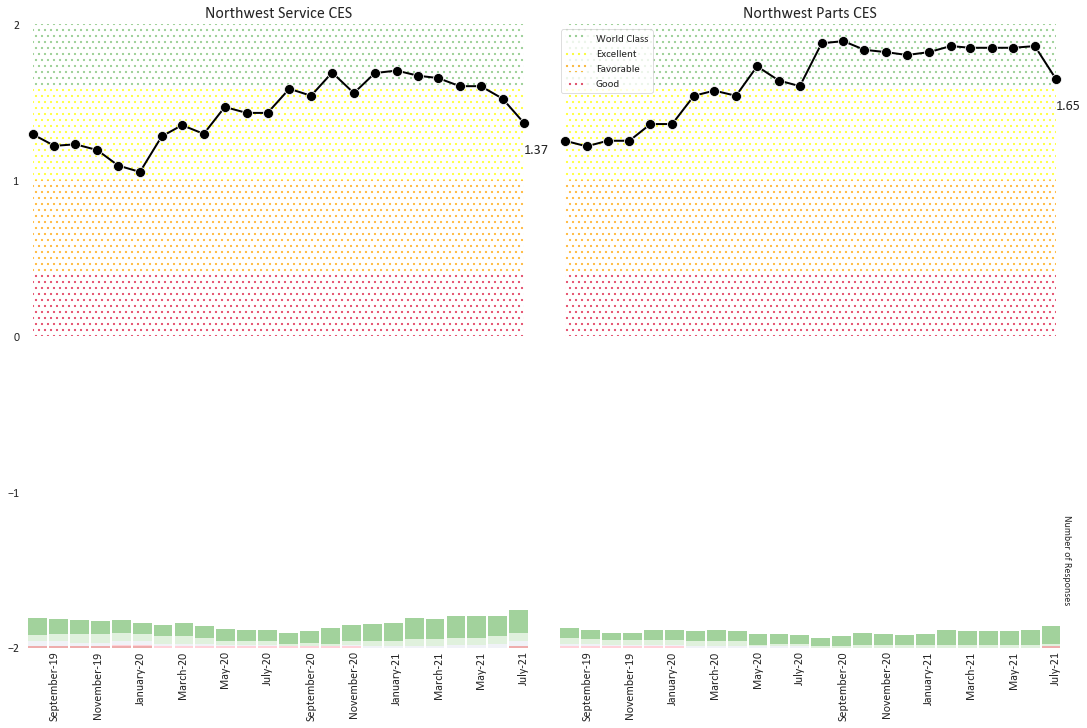

In [41]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Northwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(northwest_df.index[n-12:n]))&(df['Region']=='Northwest'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(northwest_df.index[:n]))&(df['Region']=='Northwest'))][columns[1:]]) for n in range(1, len(northwest_df.index))] + [np.nanmean(df[((df['Date'].isin(northwest_df.index[len(northwest_df.index)-12:])&(df['Region']=='Northwest')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Northwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(northwest_df.index[n-12:n]))&(df['Region']=='Northwest'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(northwest_df.index[:n]))&(df['Region']=='Northwest'))][columns[1:]]) for n in range(1, len(northwest_df.index))] + [np.nanmean(df[((df['Date'].isin(northwest_df.index[len(northwest_df.index)-12:])&(df['Region']=='Northwest')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Northwest Service CES'
    else:
        working_df = parts_CES
        title = 'Northwest Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

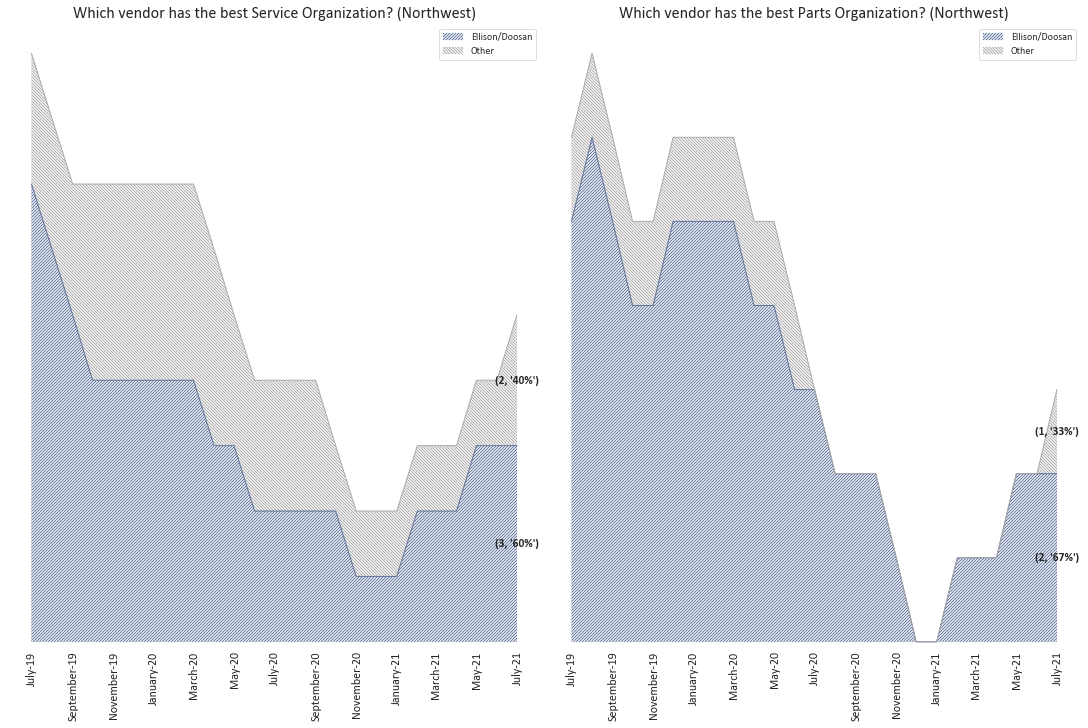

In [87]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Northwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Northwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Northwest)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Northwest)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Ohio

In [43]:
ohio_df = df[df['Region']=='Ohio'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in ohio_df.index:
        ohio_df = pd.concat([ohio_df[ohio_df.index<date], 
                  pd.DataFrame({column: 0 for column in ohio_df.columns}, index=[date]),
                   ohio_df[ohio_df.index>date]], axis=0)
for column in ohio_df.columns[:-1]:
    ohio_df[column] = [df.loc[(df['Date'].isin(ohio_df.index[n-12:n]))&(df['Region']=='Ohio')][column].mean() if n>11 else df.loc[(df['Date'].isin(ohio_df.index[:n]))&(df['Region']=='Ohio')][column].mean() for n in range(1, len(ohio_df.index))] + [df.loc[(df['Date'].isin(ohio_df.index[len(ohio_df.index)-12:]))&(df['Region']=='Ohio')][column].mean()]

ohio_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
Date                                                                   
2021-03-01      1.236111     1.478261    1.404040   1.500000   9.400000
2021-04-01      1.271605     1.500000    1.447368   1.540541   9.571429
2021-05-01      1.197740     1.385965    1.357724   1.450000   8.300000
2021-06-01      1.175141     1.333333    1.349593   1.450000   8.333333
2021-07-01      1.169492     1.298246    1.358333   1.435897   9.200000

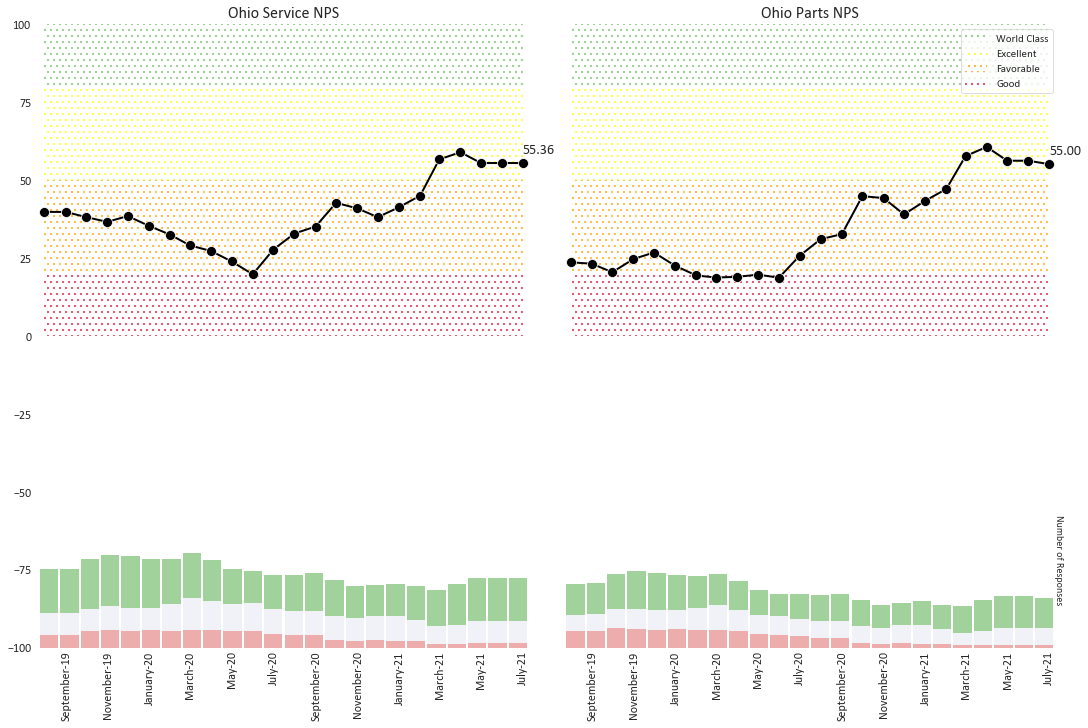

In [44]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Ohio'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Ohio Service NPS'
    else:
        working_df = Parts_nps
        title = 'Ohio Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

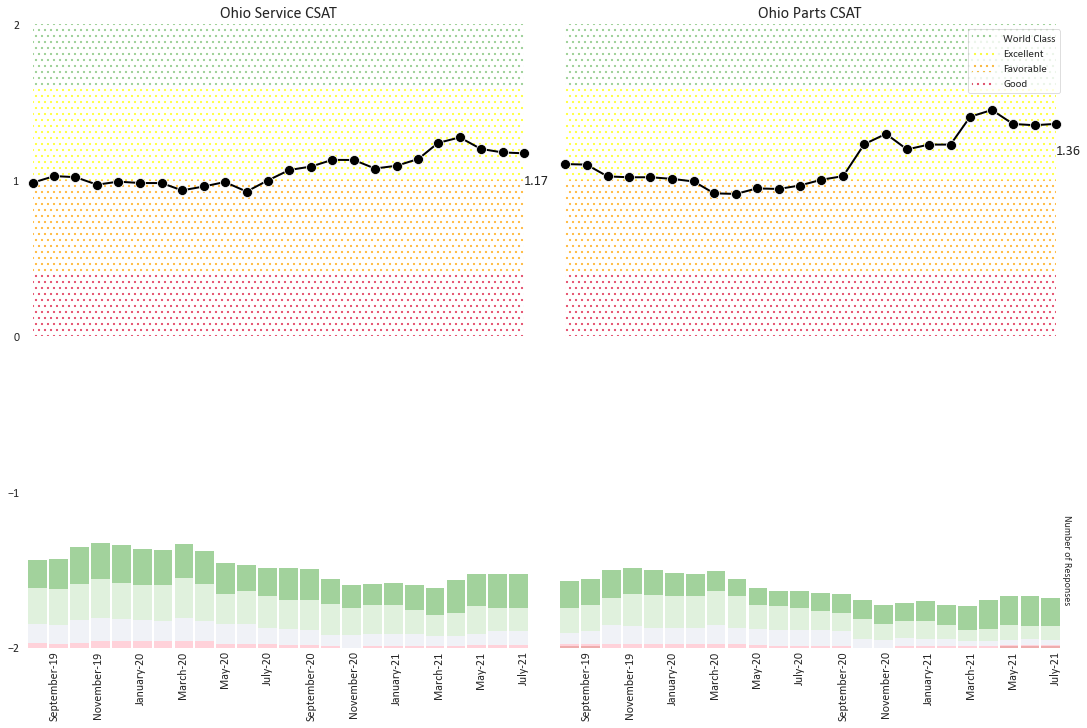

In [45]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Ohio'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(ohio_df.index[n-12:n]))&(df['Region']=='Ohio'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(ohio_df.index[:n]))&(df['Region']=='Ohio'))][columns[1:]]) for n in range(1, len(ohio_df.index))] + [np.nanmean(df[((df['Date'].isin(ohio_df.index[len(ohio_df.index)-12:])&(df['Region']=='Ohio')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Ohio'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(ohio_df.index[n-12:n]))&(df['Region']=='Ohio'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(ohio_df.index[:n]))&(df['Region']=='Ohio'))][columns[1:]]) for n in range(1, len(ohio_df.index))] + [np.nanmean(df[((df['Date'].isin(ohio_df.index[len(ohio_df.index)-12:])&(df['Region']=='Ohio')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Ohio Service CSAT'
    else:
        working_df = parts_csat
        title = 'Ohio Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(ohio_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

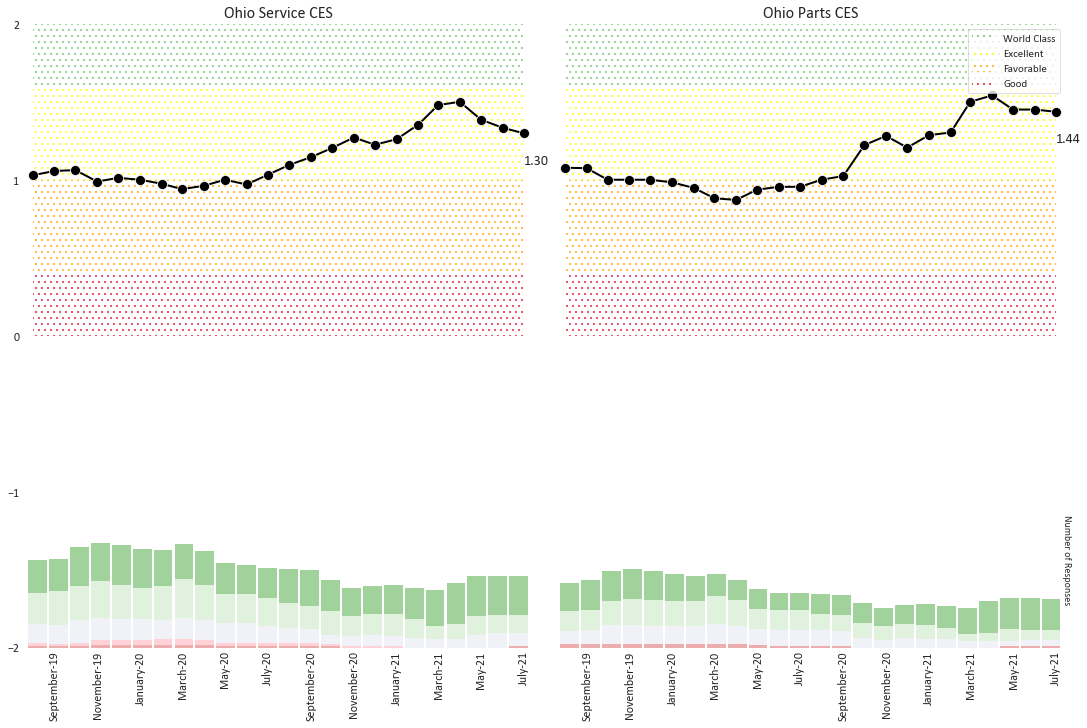

In [46]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Ohio'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(ohio_df.index[n-12:n]))&(df['Region']=='Ohio'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(ohio_df.index[:n]))&(df['Region']=='Ohio'))][columns[1:]]) for n in range(1, len(ohio_df.index))] + [np.nanmean(df[((df['Date'].isin(ohio_df.index[len(ohio_df.index)-12:])&(df['Region']=='Ohio')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Ohio'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(ohio_df.index[n-12:n]))&(df['Region']=='Ohio'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(ohio_df.index[:n]))&(df['Region']=='Ohio'))][columns[1:]]) for n in range(1, len(ohio_df.index))] + [np.nanmean(df[((df['Date'].isin(ohio_df.index[len(ohio_df.index)-12:])&(df['Region']=='Ohio')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Ohio Service CES'
    else:
        working_df = parts_CES
        title = 'Ohio Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

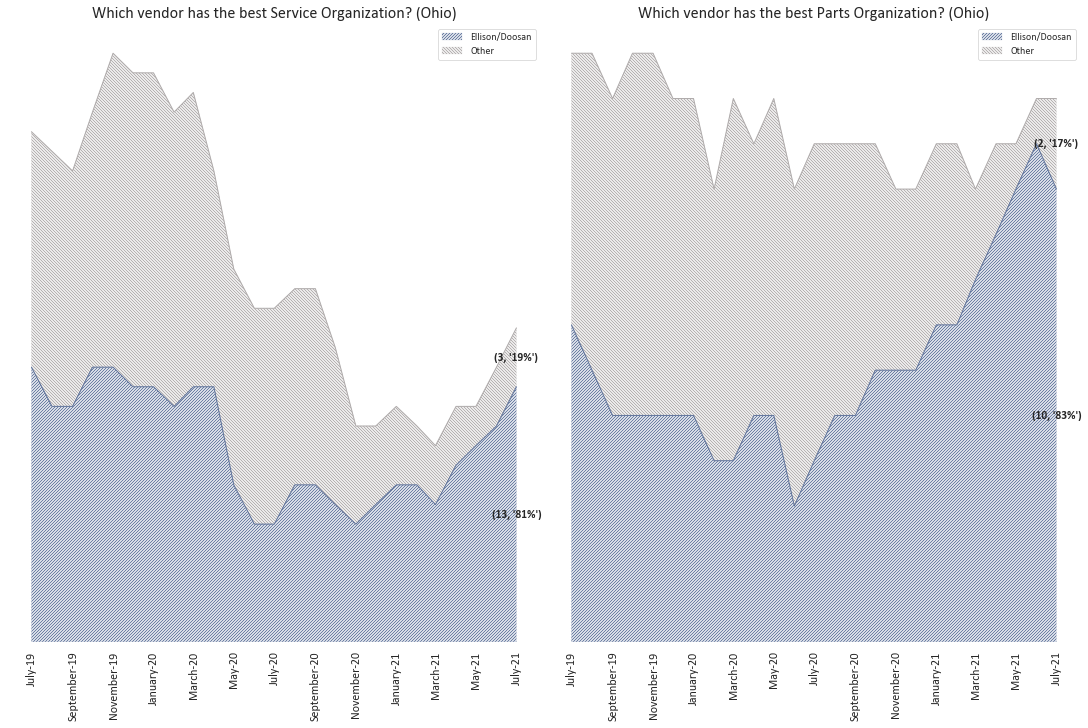

In [90]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Ohio'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Ohio'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Ohio)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Ohio)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Charlotte

In [48]:
charlotte_df = df[df['Region']=='Southeast - Charlotte'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in charlotte_df.index:
        charlotte_df = pd.concat([charlotte_df[charlotte_df.index<date], 
                  pd.DataFrame({column: 0 for column in charlotte_df.columns}, index=[date]),
                   charlotte_df[charlotte_df.index>date]], axis=0)
for column in charlotte_df.columns[:-1]:
    charlotte_df[column] = [df.loc[(df['Date'].isin(charlotte_df.index[n-12:n]))&(df['Region']=='Southeast - Charlotte')][column].mean() if n>11 else df.loc[(df['Date'].isin(charlotte_df.index[:n]))&(df['Region']=='Southeast - Charlotte')][column].mean() for n in range(1, len(charlotte_df.index))] + [df.loc[(df['Date'].isin(charlotte_df.index[len(charlotte_df.index)-12:]))&(df['Region']=='Southeast - Charlotte')][column].mean()]

charlotte_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
Date                                                                   
2021-03-01      0.866667     0.866667    0.833333   0.812500   7.333333
2021-04-01      0.869048     0.821429    0.921569   0.941176   9.500000
2021-05-01      0.790476     0.764706    0.869565   0.826087   8.250000
2021-06-01      0.788618     0.743590    0.962963   0.962963   6.500000
2021-07-01      0.829710     0.860465    1.107527   1.161290   7.166667

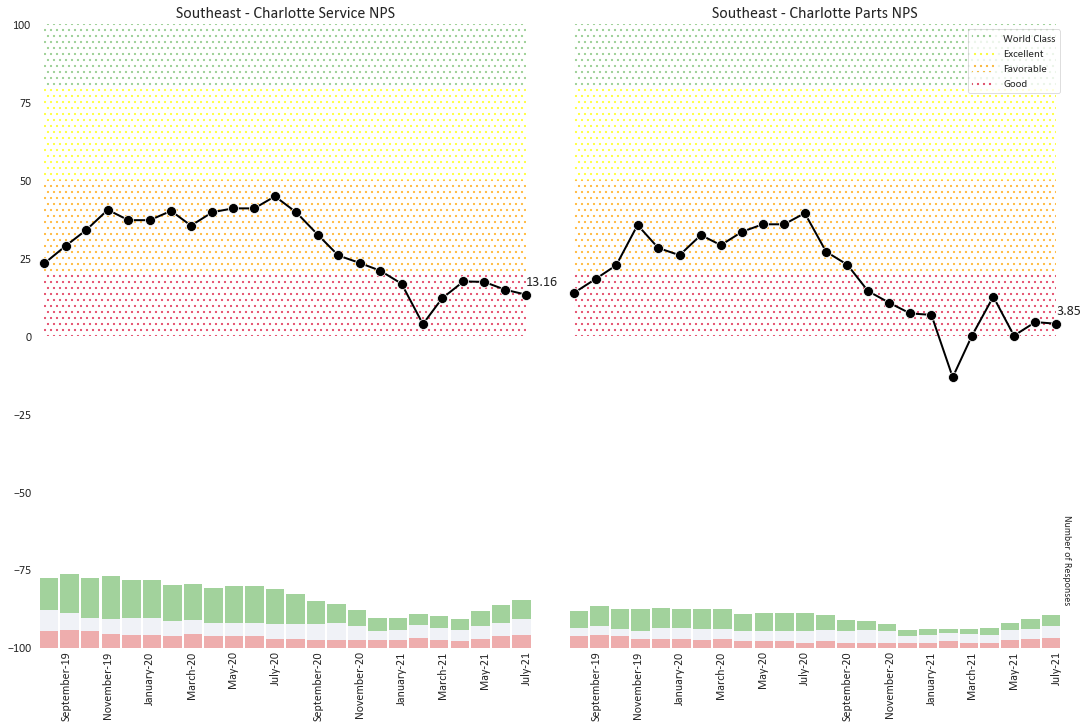

In [49]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Southeast - Charlotte'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Southeast - Charlotte Service NPS'
    else:
        working_df = Parts_nps
        title = 'Southeast - Charlotte Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

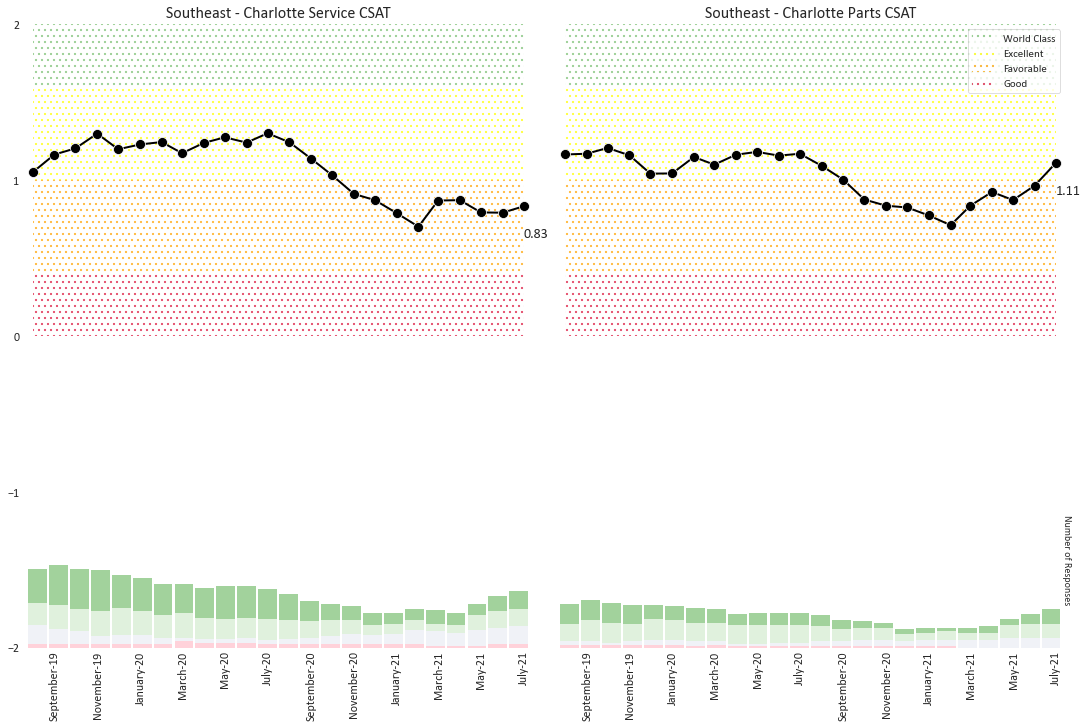

In [50]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Southeast - Charlotte'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(charlotte_df.index[n-12:n]))&(df['Region']=='Southeast - Charlotte'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(charlotte_df.index[:n]))&(df['Region']=='Southeast - Charlotte'))][columns[1:]]) for n in range(1, len(charlotte_df.index))] + [np.nanmean(df[((df['Date'].isin(charlotte_df.index[len(charlotte_df.index)-12:])&(df['Region']=='Southeast - Charlotte')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Southeast - Charlotte'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(charlotte_df.index[n-12:n]))&(df['Region']=='Southeast - Charlotte'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(charlotte_df.index[:n]))&(df['Region']=='Southeast - Charlotte'))][columns[1:]]) for n in range(1, len(charlotte_df.index))] + [np.nanmean(df[((df['Date'].isin(charlotte_df.index[len(charlotte_df.index)-12:])&(df['Region']=='Southeast - Charlotte')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Southeast - Charlotte Service CSAT'
    else:
        working_df = parts_csat
        title = 'Southeast - Charlotte Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(charlotte_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

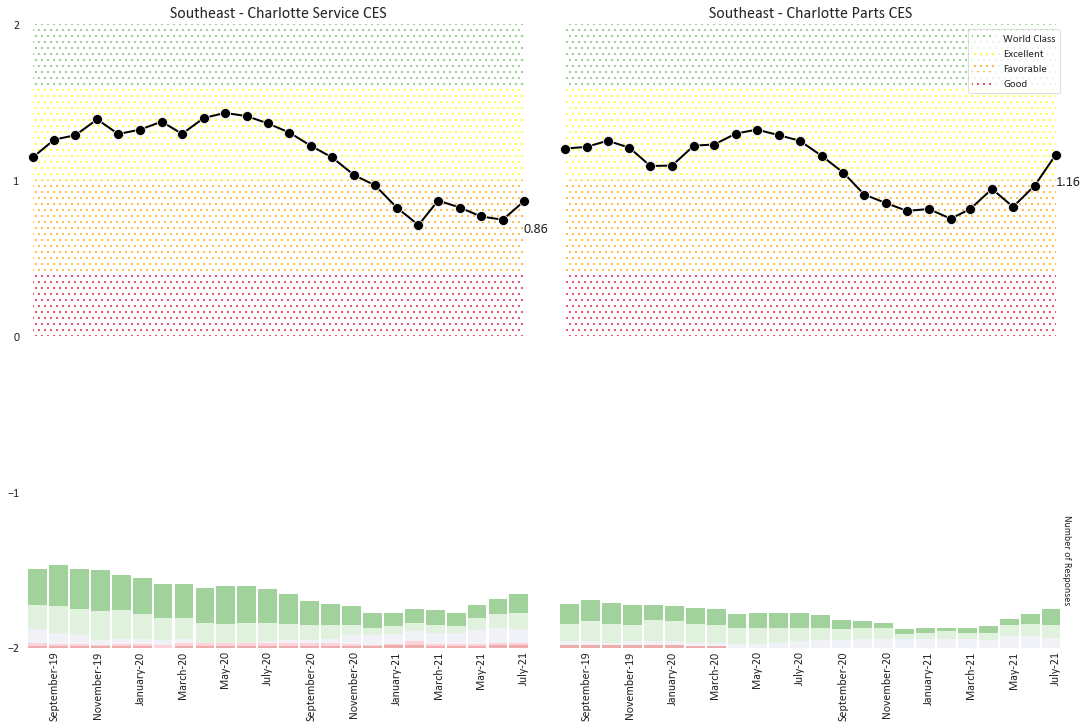

In [51]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Southeast - Charlotte'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(charlotte_df.index[n-12:n]))&(df['Region']=='Southeast - Charlotte'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(charlotte_df.index[:n]))&(df['Region']=='Southeast - Charlotte'))][columns[1:]]) for n in range(1, len(charlotte_df.index))] + [np.nanmean(df[((df['Date'].isin(charlotte_df.index[len(charlotte_df.index)-12:])&(df['Region']=='Southeast - Charlotte')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Southeast - Charlotte'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(charlotte_df.index[n-12:n]))&(df['Region']=='Southeast - Charlotte'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(charlotte_df.index[:n]))&(df['Region']=='Southeast - Charlotte'))][columns[1:]]) for n in range(1, len(charlotte_df.index))] + [np.nanmean(df[((df['Date'].isin(charlotte_df.index[len(charlotte_df.index)-12:])&(df['Region']=='Southeast - Charlotte')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Southeast - Charlotte Service CES'
    else:
        working_df = parts_CES
        title = 'Southeast - Charlotte Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

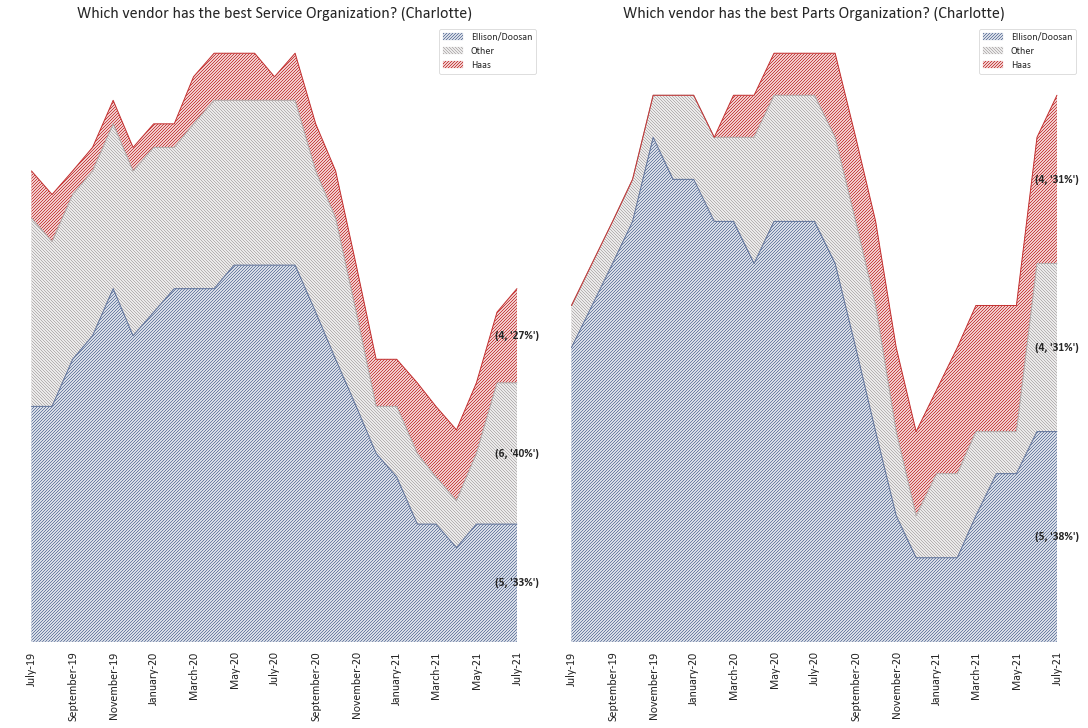

In [91]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Southeast - Charlotte'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Southeast - Charlotte'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Charlotte)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Charlotte)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Nashville

In [53]:
nashville_df = df[df['Region']=='Southeast - Nashville'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in nashville_df.index:
        nashville_df = pd.concat([nashville_df[nashville_df.index<date], 
                  pd.DataFrame({column: 0 for column in nashville_df.columns}, index=[date]),
                   nashville_df[nashville_df.index>date]], axis=0)
for column in nashville_df.columns[:-1]:
    nashville_df[column] = [df.loc[(df['Date'].isin(nashville_df.index[n-12:n]))&(df['Region']=='Southeast - Nashville')][column].mean() if n>11 else df.loc[(df['Date'].isin(nashville_df.index[:n]))&(df['Region']=='Southeast - Nashville')][column].mean() for n in range(1, len(nashville_df.index))] + [df.loc[(df['Date'].isin(nashville_df.index[len(nashville_df.index)-12:]))&(df['Region']=='Southeast - Nashville')][column].mean()]

nashville_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
2021-03-01      1.228070     1.263158    1.333333   1.222222        NaN
2021-04-01      1.228070     1.263158    1.333333   1.222222   0.000000
2021-05-01      1.126984     1.095238    1.300000   1.200000   7.000000
2021-06-01      1.159420     1.090909    1.333333   1.250000   8.666667
2021-07-01      1.111111     1.000000    1.380952   1.307692   9.750000

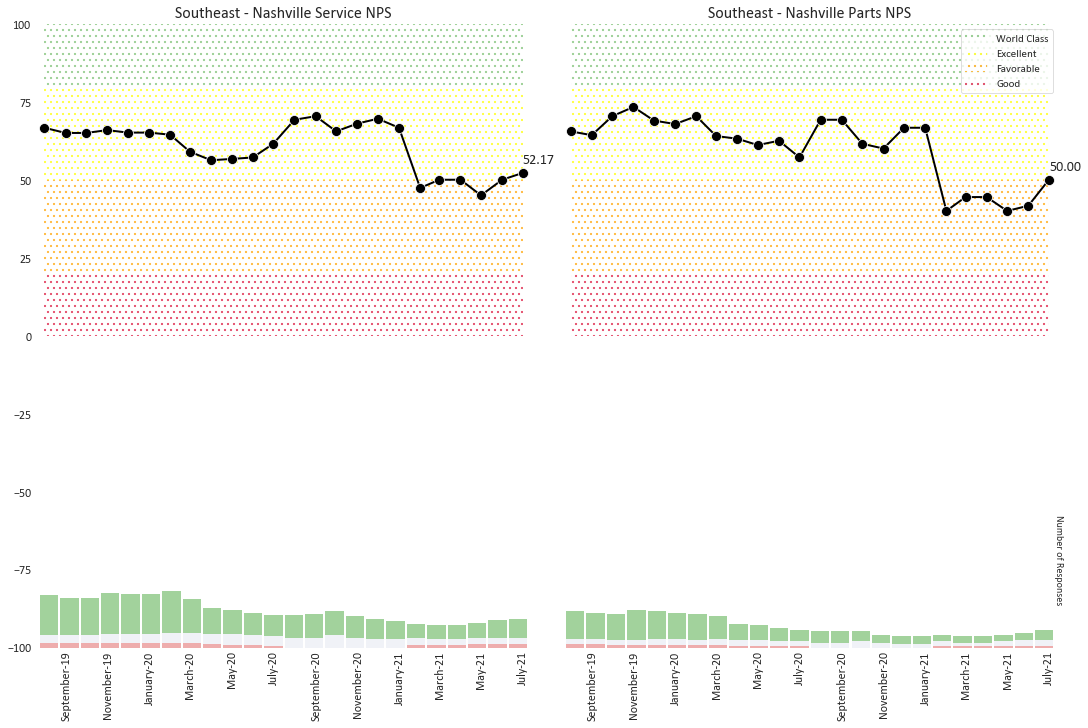

In [54]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Southeast - Nashville'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Southeast - Nashville Service NPS'
    else:
        working_df = Parts_nps
        title = 'Southeast - Nashville Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

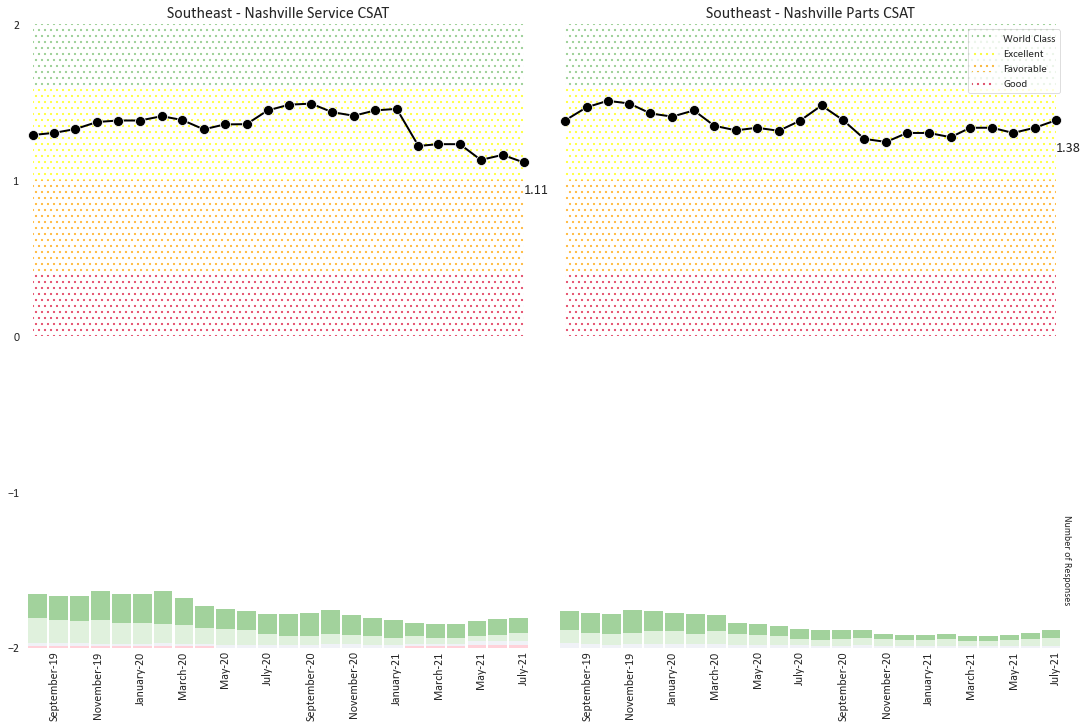

In [55]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Southeast - Nashville'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(nashville_df.index[n-12:n]))&(df['Region']=='Southeast - Nashville'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(nashville_df.index[:n]))&(df['Region']=='Southeast - Nashville'))][columns[1:]]) for n in range(1, len(nashville_df.index))] + [np.nanmean(df[((df['Date'].isin(nashville_df.index[len(nashville_df.index)-12:])&(df['Region']=='Southeast - Nashville')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Southeast - Nashville'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(nashville_df.index[n-12:n]))&(df['Region']=='Southeast - Nashville'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(nashville_df.index[:n]))&(df['Region']=='Southeast - Nashville'))][columns[1:]]) for n in range(1, len(nashville_df.index))] + [np.nanmean(df[((df['Date'].isin(nashville_df.index[len(nashville_df.index)-12:])&(df['Region']=='Southeast - Nashville')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Southeast - Nashville Service CSAT'
    else:
        working_df = parts_csat
        title = 'Southeast - Nashville Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(nashville_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

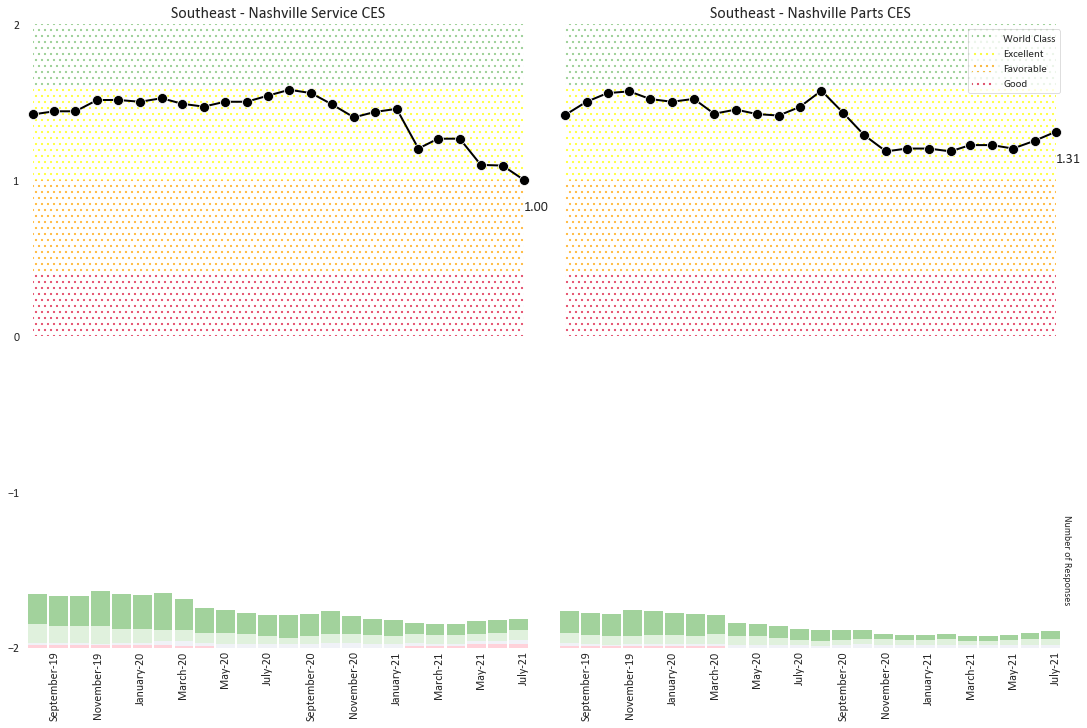

In [56]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Southeast - Nashville'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(nashville_df.index[n-12:n]))&(df['Region']=='Southeast - Nashville'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(nashville_df.index[:n]))&(df['Region']=='Southeast - Nashville'))][columns[1:]]) for n in range(1, len(nashville_df.index))] + [np.nanmean(df[((df['Date'].isin(nashville_df.index[len(nashville_df.index)-12:])&(df['Region']=='Southeast - Nashville')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Southeast - Nashville'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(nashville_df.index[n-12:n]))&(df['Region']=='Southeast - Nashville'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(nashville_df.index[:n]))&(df['Region']=='Southeast - Nashville'))][columns[1:]]) for n in range(1, len(nashville_df.index))] + [np.nanmean(df[((df['Date'].isin(nashville_df.index[len(nashville_df.index)-12:])&(df['Region']=='Southeast - Nashville')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Southeast - Nashville Service CES'
    else:
        working_df = parts_CES
        title = 'Southeast - Nashville Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

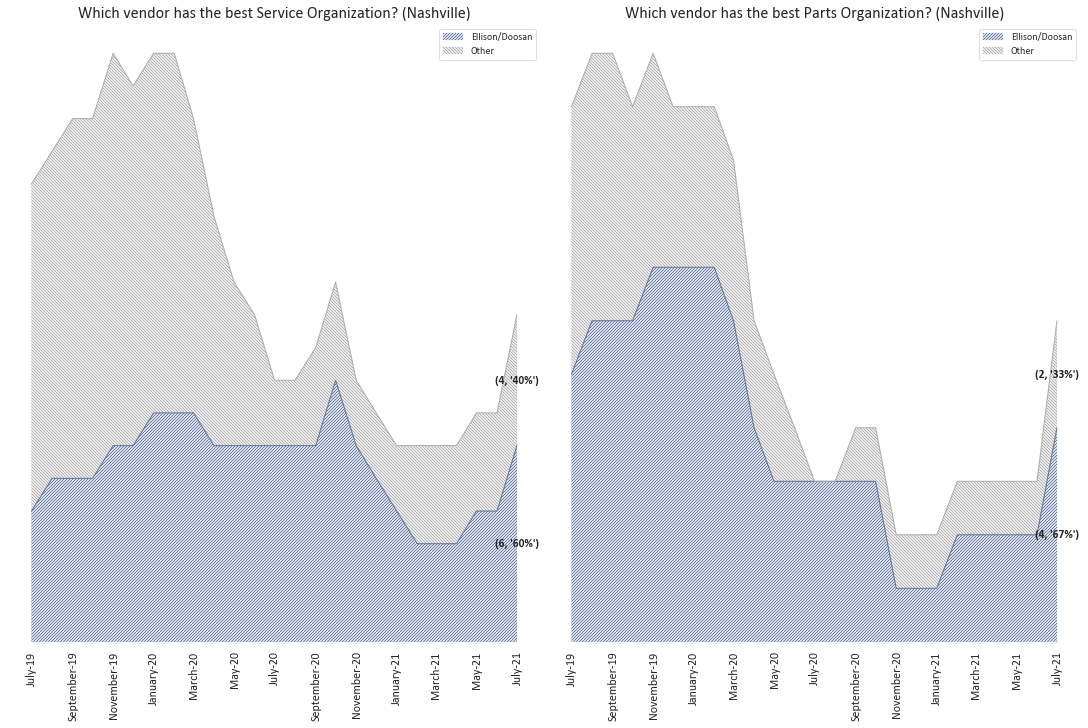

In [92]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Southeast - Nashville'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Southeast - Nashville'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Nashville)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Nashville)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Southern California

In [58]:
socal_df = df[df['Region']=='Southern California'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in socal_df.index:
        socal_df = pd.concat([socal_df[socal_df.index<date], 
                  pd.DataFrame({column: 0 for column in socal_df.columns}, index=[date]),
                   socal_df[socal_df.index>date]], axis=0)
for column in socal_df.columns[:-1]:
    socal_df[column] = [df.loc[(df['Date'].isin(socal_df.index[n-12:n]))&(df['Region']=='Southern California')][column].mean() if n>11 else df.loc[(df['Date'].isin(socal_df.index[:n]))&(df['Region']=='Southern California')][column].mean() for n in range(1, len(socal_df.index))] + [df.loc[(df['Date'].isin(socal_df.index[len(socal_df.index)-12:]))&(df['Region']=='Southern California')][column].mean()]

socal_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
Date                                                                   
2021-03-01      1.193878     1.218750    1.371585   1.262295   8.300000
2021-04-01      1.202899     1.255556    1.421053   1.385965   8.500000
2021-05-01      1.189964     1.241758    1.440678   1.406780   8.000000
2021-06-01      1.284091     1.310345    1.522013   1.528302   9.285714
2021-07-01      1.254167     1.320513    1.469388   1.500000   9.000000

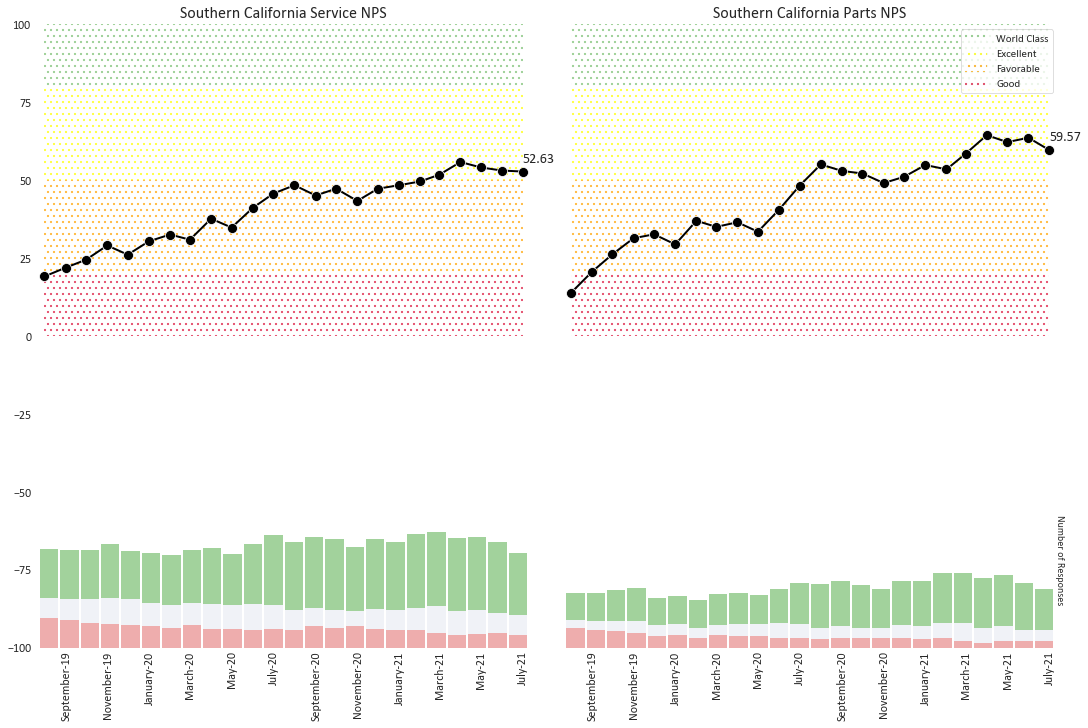

In [59]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Southern California'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Southern California Service NPS'
    else:
        working_df = Parts_nps
        title = 'Southern California Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

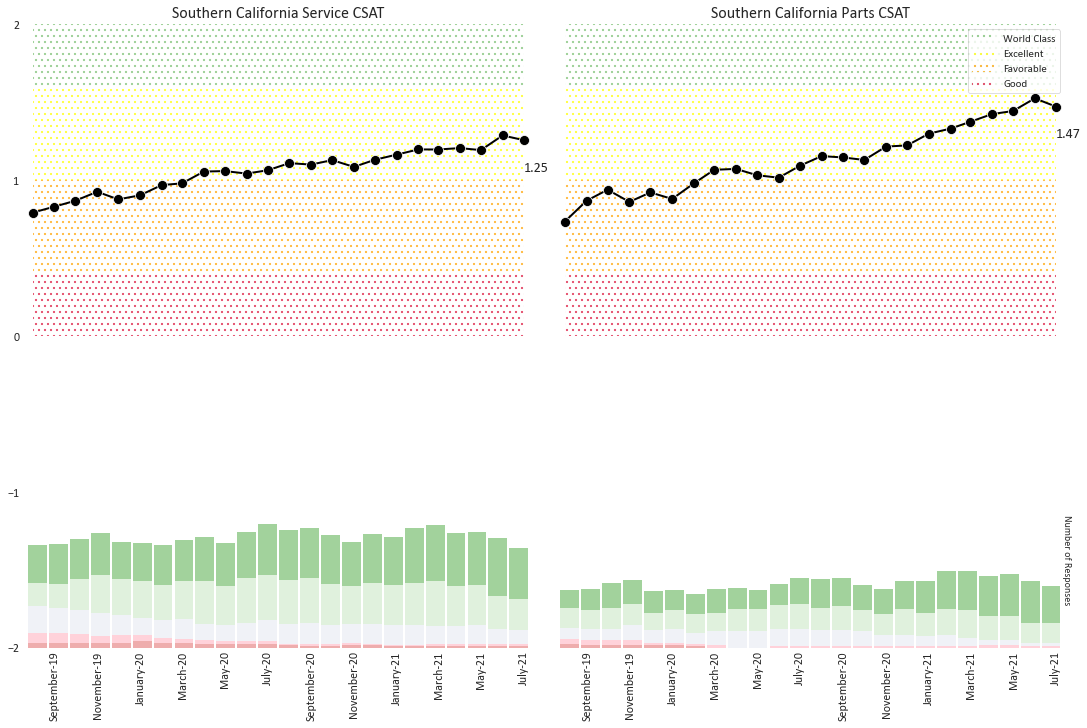

In [60]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Southern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(socal_df.index[n-12:n]))&(df['Region']=='Southern California'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(socal_df.index[:n]))&(df['Region']=='Southern California'))][columns[1:]]) for n in range(1, len(socal_df.index))] + [np.nanmean(df[((df['Date'].isin(socal_df.index[len(socal_df.index)-12:])&(df['Region']=='Southern California')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Southern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(socal_df.index[n-12:n]))&(df['Region']=='Southern California'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(socal_df.index[:n]))&(df['Region']=='Southern California'))][columns[1:]]) for n in range(1, len(socal_df.index))] + [np.nanmean(df[((df['Date'].isin(socal_df.index[len(socal_df.index)-12:])&(df['Region']=='Southern California')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Southern California Service CSAT'
    else:
        working_df = parts_csat
        title = 'Southern California Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(socal_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

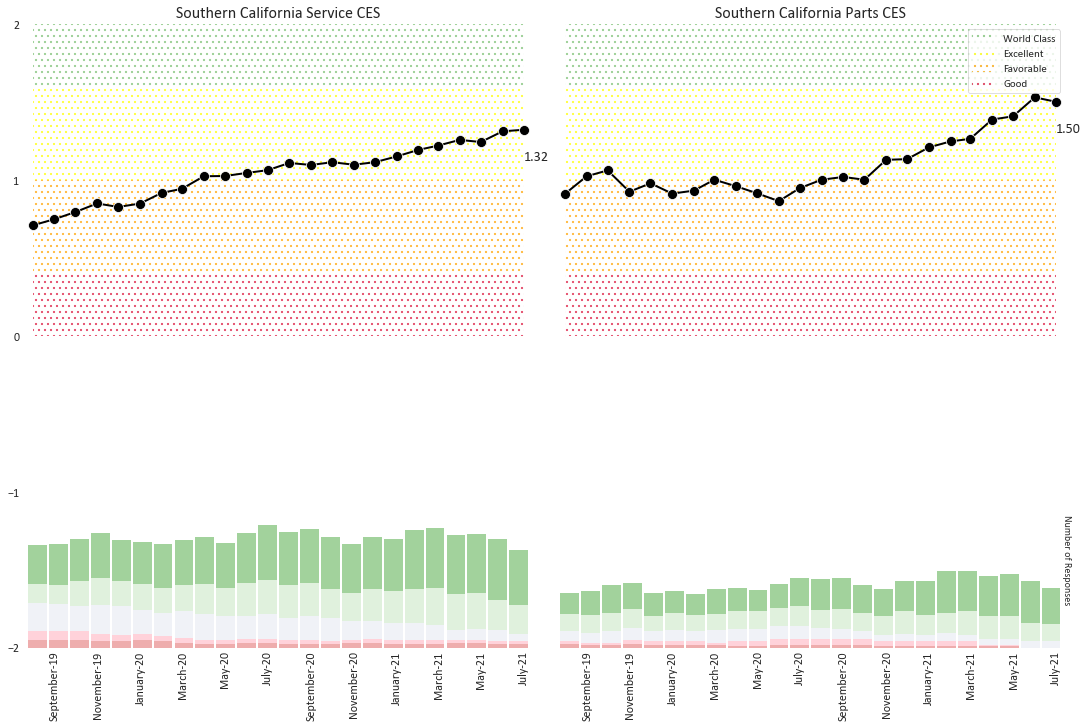

In [61]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Southern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(socal_df.index[n-12:n]))&(df['Region']=='Southern California'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(socal_df.index[:n]))&(df['Region']=='Southern California'))][columns[1:]]) for n in range(1, len(socal_df.index))] + [np.nanmean(df[((df['Date'].isin(socal_df.index[len(socal_df.index)-12:])&(df['Region']=='Southern California')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Southern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(socal_df.index[n-12:n]))&(df['Region']=='Southern California'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(socal_df.index[:n]))&(df['Region']=='Southern California'))][columns[1:]]) for n in range(1, len(socal_df.index))] + [np.nanmean(df[((df['Date'].isin(socal_df.index[len(socal_df.index)-12:])&(df['Region']=='Southern California')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Southern California Service CES'
    else:
        working_df = parts_CES
        title = 'Southern California Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

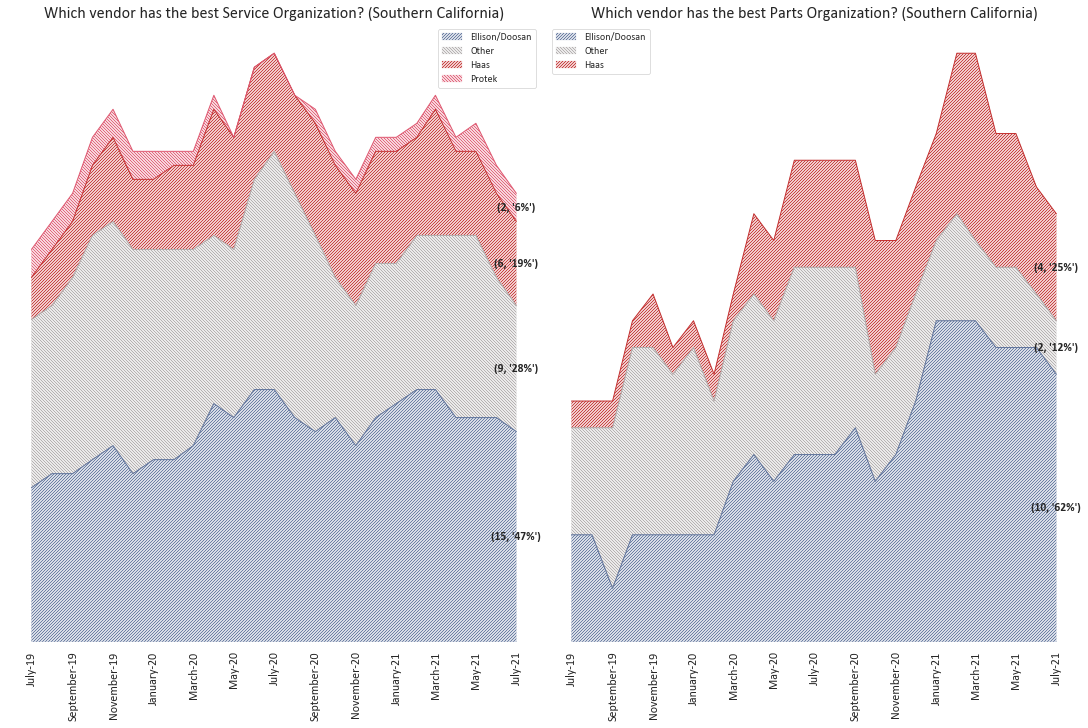

In [93]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Southern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Southern California'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Southern California)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Southern California)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Texas - North

In [63]:
texasnorth_df = df[df['Region']=='Texas - North'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in texasnorth_df.index:
        texasnorth_df = pd.concat([texasnorth_df[texasnorth_df.index<date], 
                  pd.DataFrame({column: 0 for column in texasnorth_df.columns}, index=[date]),
                   texasnorth_df[texasnorth_df.index>date]], axis=0)
for column in texasnorth_df.columns[:-1]:
    texasnorth_df[column] = [df.loc[(df['Date'].isin(texasnorth_df.index[n-12:n]))&(df['Region']=='Texas - North')][column].mean() if n>11 else df.loc[(df['Date'].isin(texasnorth_df.index[:n]))&(df['Region']=='Texas - North')][column].mean() for n in range(1, len(texasnorth_df.index))] + [df.loc[(df['Date'].isin(texasnorth_df.index[len(texasnorth_df.index)-12:]))&(df['Region']=='Texas - North')][column].mean()]

texasnorth_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
2021-03-01      1.212121     1.318182    1.533333   1.600000       5.50
2021-04-01      1.227273     1.318182    1.533333   1.600000      10.00
2021-05-01      1.317460     1.380952    1.588235   1.647059       9.00
2021-06-01      1.298246     1.315789    1.538462   1.615385        NaN
2021-07-01      1.136364     1.136364    1.428571   1.500000       5.25

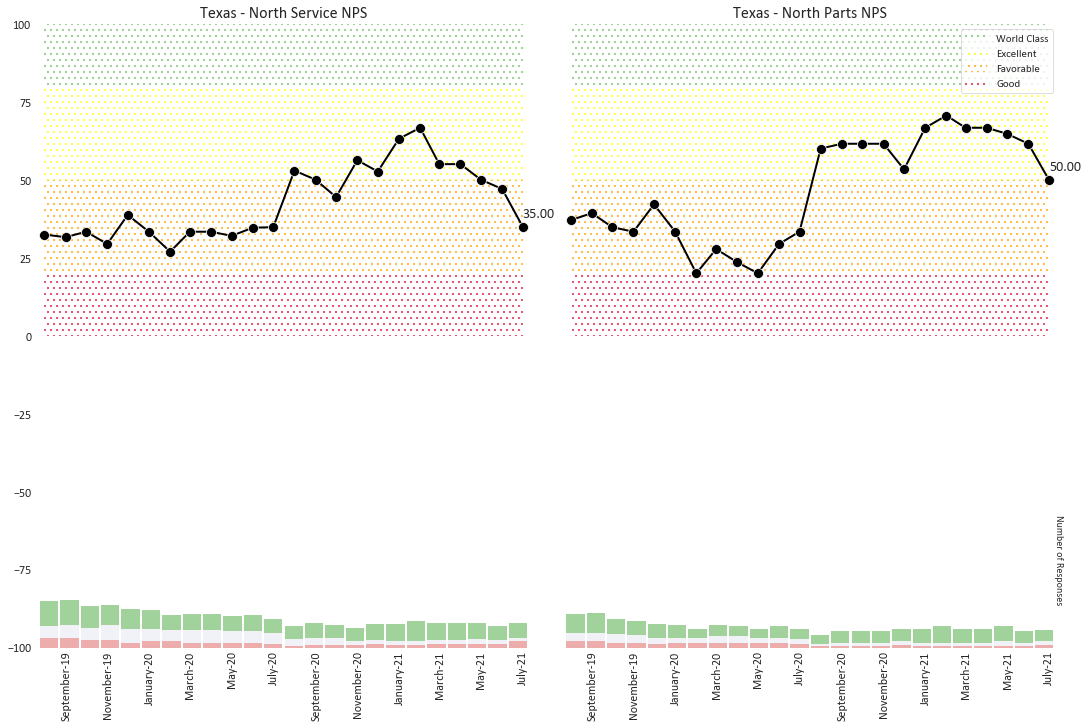

In [64]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Texas - North'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Texas - North Service NPS'
    else:
        working_df = Parts_nps
        title = 'Texas - North Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

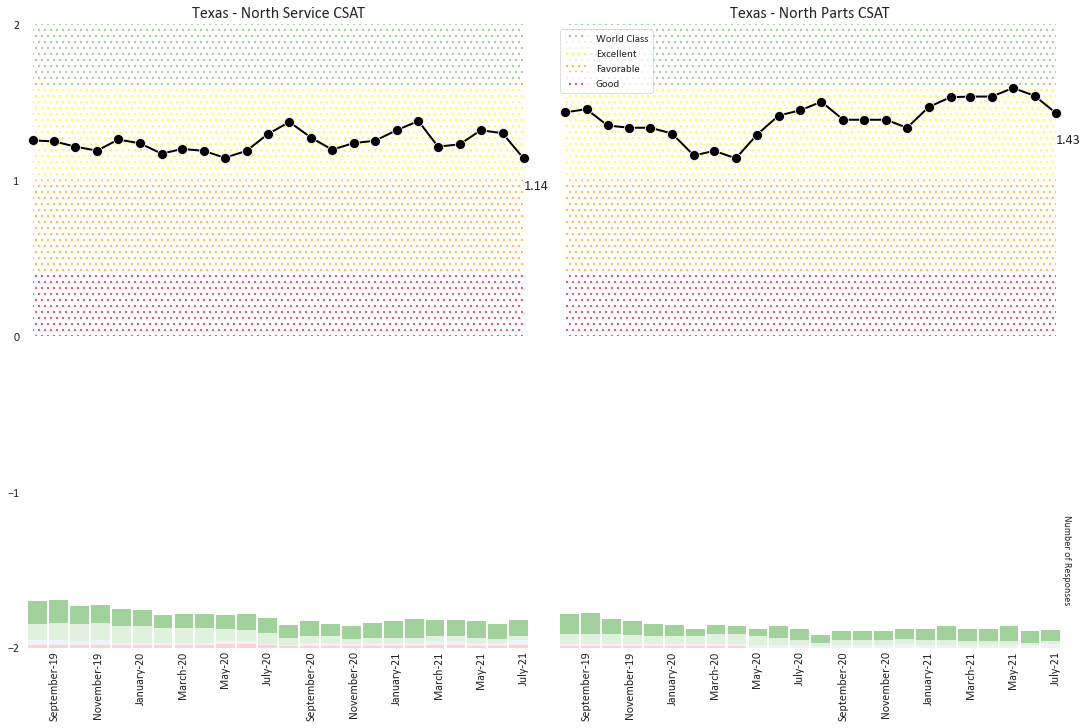

In [65]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Texas - North'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(texasnorth_df.index[n-12:n]))&(df['Region']=='Texas - North'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(texasnorth_df.index[:n]))&(df['Region']=='Texas - North'))][columns[1:]]) for n in range(1, len(texasnorth_df.index))] + [np.nanmean(df[((df['Date'].isin(texasnorth_df.index[len(texasnorth_df.index)-12:])&(df['Region']=='Texas - North')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Texas - North'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(texasnorth_df.index[n-12:n]))&(df['Region']=='Texas - North'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(texasnorth_df.index[:n]))&(df['Region']=='Texas - North'))][columns[1:]]) for n in range(1, len(texasnorth_df.index))] + [np.nanmean(df[((df['Date'].isin(texasnorth_df.index[len(texasnorth_df.index)-12:])&(df['Region']=='Texas - North')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Texas - North Service CSAT'
    else:
        working_df = parts_csat
        title = 'Texas - North Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(texasnorth_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

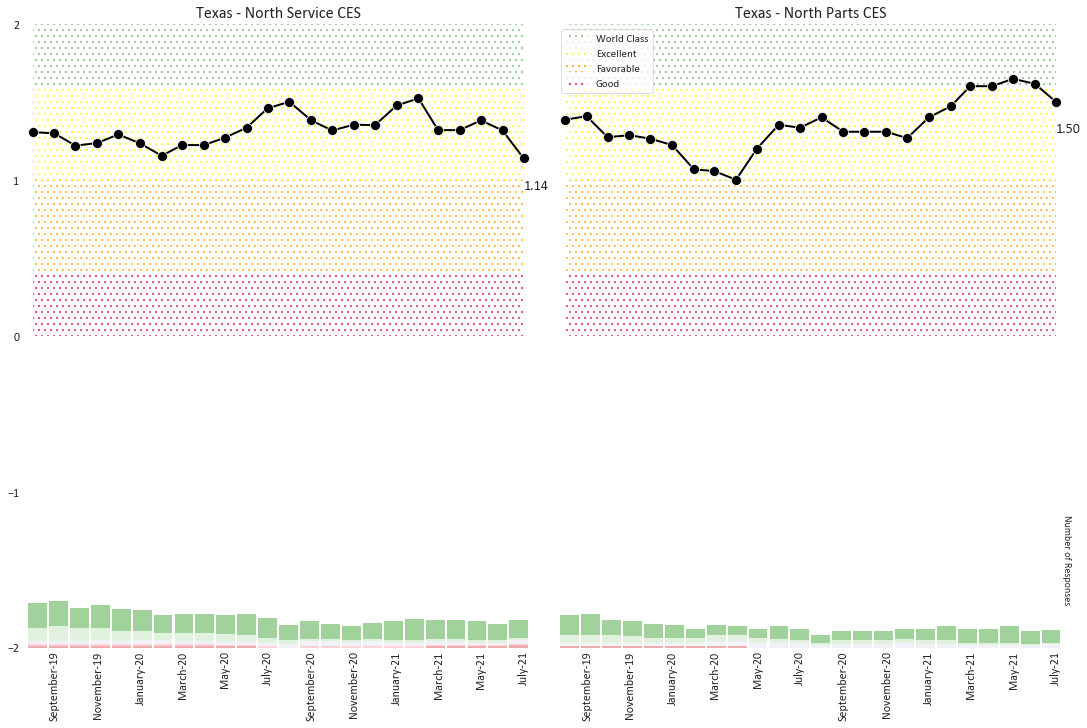

In [66]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Texas - North'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(texasnorth_df.index[n-12:n]))&(df['Region']=='Texas - North'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(texasnorth_df.index[:n]))&(df['Region']=='Texas - North'))][columns[1:]]) for n in range(1, len(texasnorth_df.index))] + [np.nanmean(df[((df['Date'].isin(texasnorth_df.index[len(texasnorth_df.index)-12:])&(df['Region']=='Texas - North')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Texas - North'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(texasnorth_df.index[n-12:n]))&(df['Region']=='Texas - North'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(texasnorth_df.index[:n]))&(df['Region']=='Texas - North'))][columns[1:]]) for n in range(1, len(texasnorth_df.index))] + [np.nanmean(df[((df['Date'].isin(texasnorth_df.index[len(texasnorth_df.index)-12:])&(df['Region']=='Texas - North')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Texas - North Service CES'
    else:
        working_df = parts_CES
        title = 'Texas - North Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

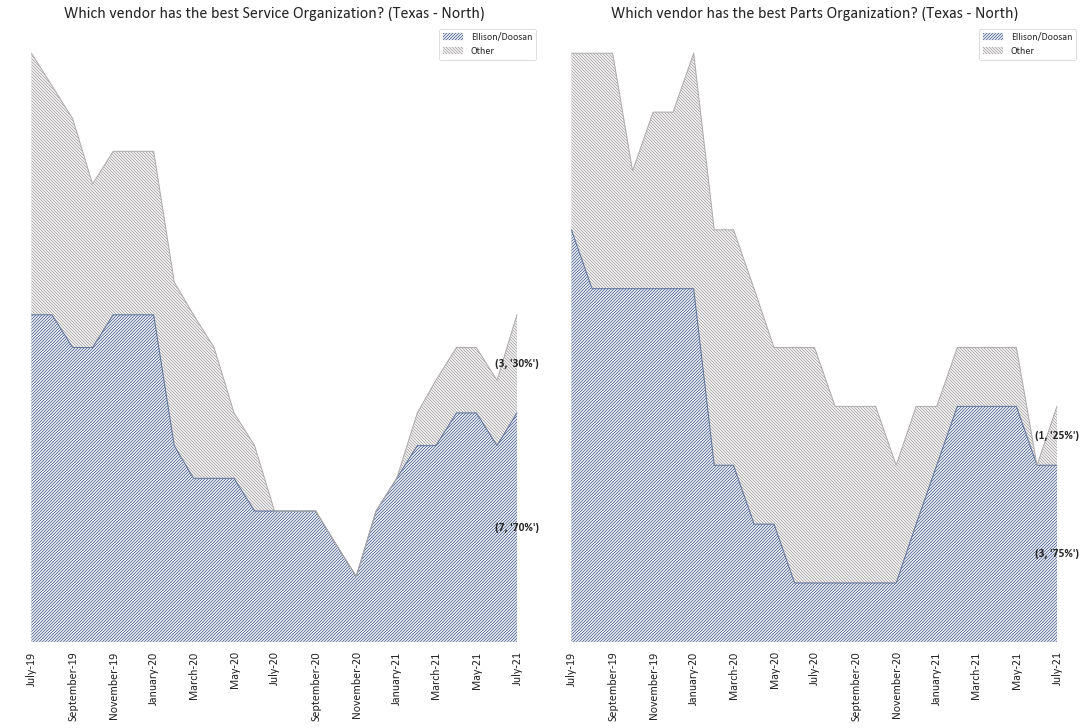

In [94]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Texas - North'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Texas - North'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Texas - North)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Texas - North)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Texas - South

In [68]:
texassouth_df = df[df['Region']=='Texas - South'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in texassouth_df.index:
        texassouth_df = pd.concat([texassouth_df[texassouth_df.index<date], 
                  pd.DataFrame({column: 0 for column in texassouth_df.columns}, index=[date]),
                   texassouth_df[texassouth_df.index>date]], axis=0)
for column in texassouth_df.columns[:-1]:
    texassouth_df[column] = [df.loc[(df['Date'].isin(texassouth_df.index[n-12:n]))&(df['Region']=='Texas - South')][column].mean() if n>11 else df.loc[(df['Date'].isin(texassouth_df.index[:n]))&(df['Region']=='Texas - South')][column].mean() for n in range(1, len(texassouth_df.index))] + [df.loc[(df['Date'].isin(texassouth_df.index[len(texassouth_df.index)-12:]))&(df['Region']=='Texas - South')][column].mean()]

texassouth_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
Date                                                                   
2021-03-01      1.272727     1.225806    1.180556   1.291667   8.000000
2021-04-01      1.343137     1.312500    1.266667   1.360000  10.000000
2021-05-01      1.259259     1.235294    1.246914   1.333333   9.000000
2021-06-01      1.314286     1.312500    1.371795   1.384615   8.333333
2021-07-01      1.129630     1.090909    1.238095   1.285714   8.200000

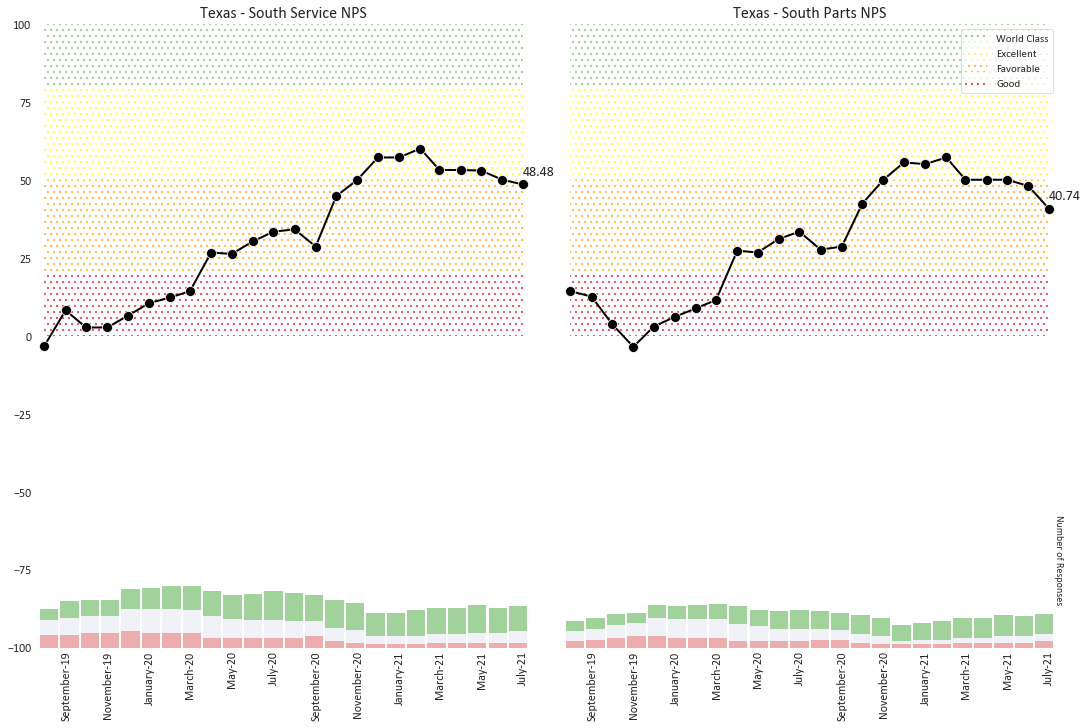

In [69]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Texas - South'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Texas - South Service NPS'
    else:
        working_df = Parts_nps
        title = 'Texas - South Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

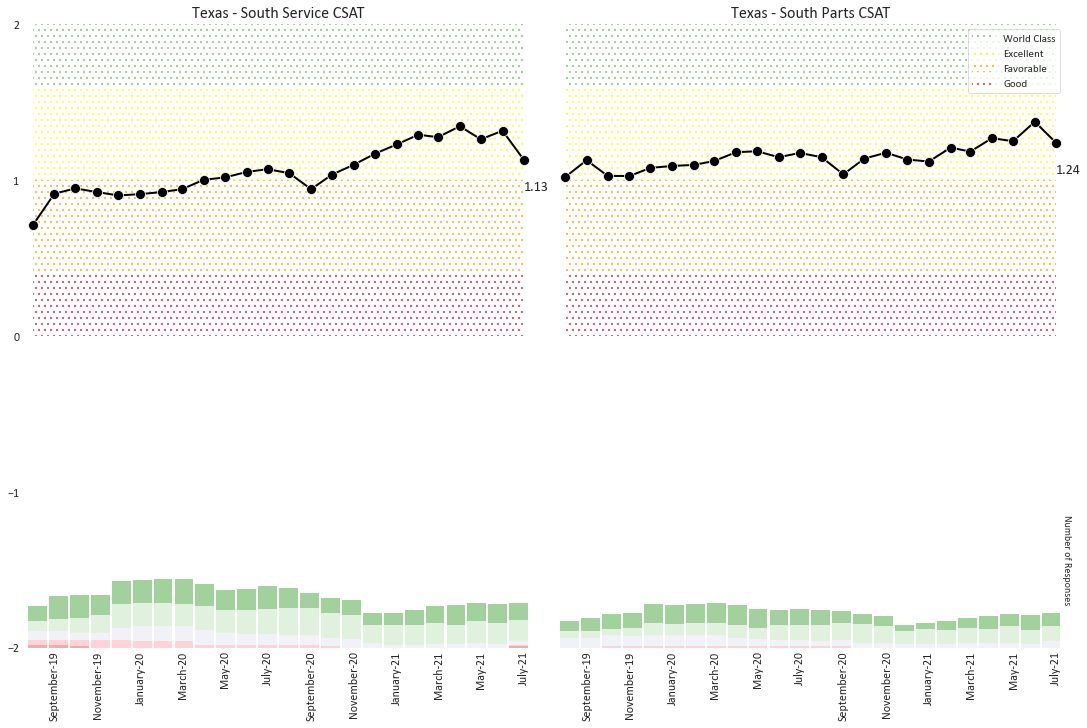

In [70]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Texas - South'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(texassouth_df.index[n-12:n]))&(df['Region']=='Texas - South'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(texassouth_df.index[:n]))&(df['Region']=='Texas - South'))][columns[1:]]) for n in range(1, len(texassouth_df.index))] + [np.nanmean(df[((df['Date'].isin(texassouth_df.index[len(texassouth_df.index)-12:])&(df['Region']=='Texas - South')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Texas - South'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(texassouth_df.index[n-12:n]))&(df['Region']=='Texas - South'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(texassouth_df.index[:n]))&(df['Region']=='Texas - South'))][columns[1:]]) for n in range(1, len(texassouth_df.index))] + [np.nanmean(df[((df['Date'].isin(texassouth_df.index[len(texassouth_df.index)-12:])&(df['Region']=='Texas - South')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Texas - South Service CSAT'
    else:
        working_df = parts_csat
        title = 'Texas - South Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(texassouth_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

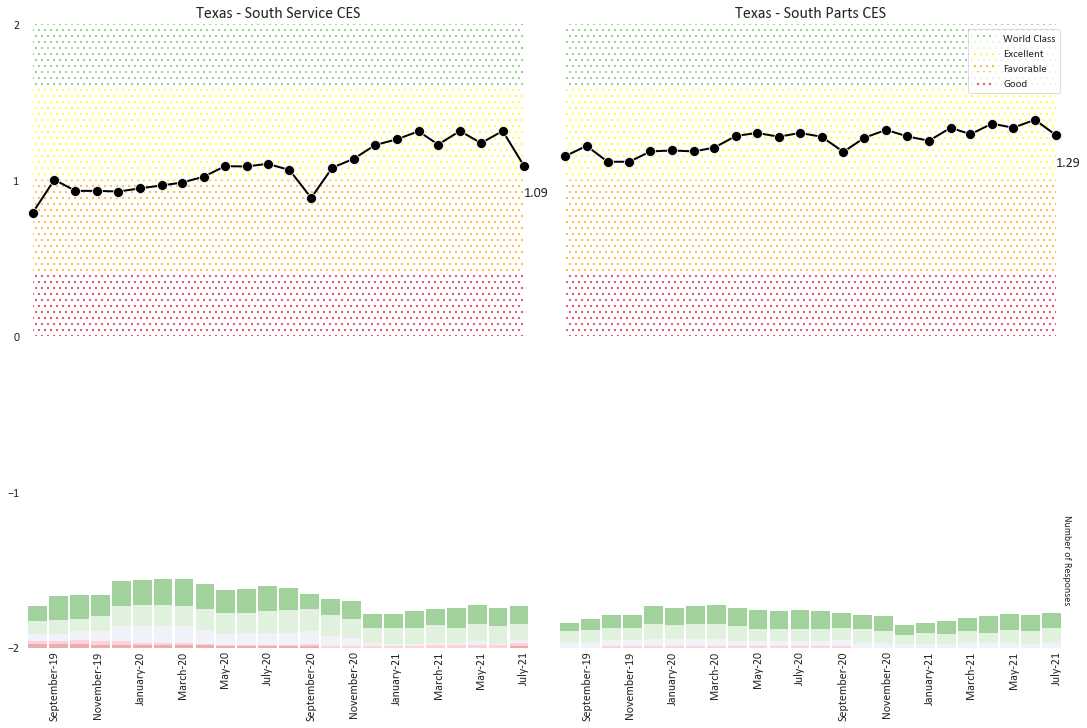

In [71]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Texas - South'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(texassouth_df.index[n-12:n]))&(df['Region']=='Texas - South'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(texassouth_df.index[:n]))&(df['Region']=='Texas - South'))][columns[1:]]) for n in range(1, len(texassouth_df.index))] + [np.nanmean(df[((df['Date'].isin(texassouth_df.index[len(texassouth_df.index)-12:])&(df['Region']=='Texas - South')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Texas - South'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(texassouth_df.index[n-12:n]))&(df['Region']=='Texas - South'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(texassouth_df.index[:n]))&(df['Region']=='Texas - South'))][columns[1:]]) for n in range(1, len(texassouth_df.index))] + [np.nanmean(df[((df['Date'].isin(texassouth_df.index[len(texassouth_df.index)-12:])&(df['Region']=='Texas - South')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Texas - South Service CES'
    else:
        working_df = parts_CES
        title = 'Texas - South Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

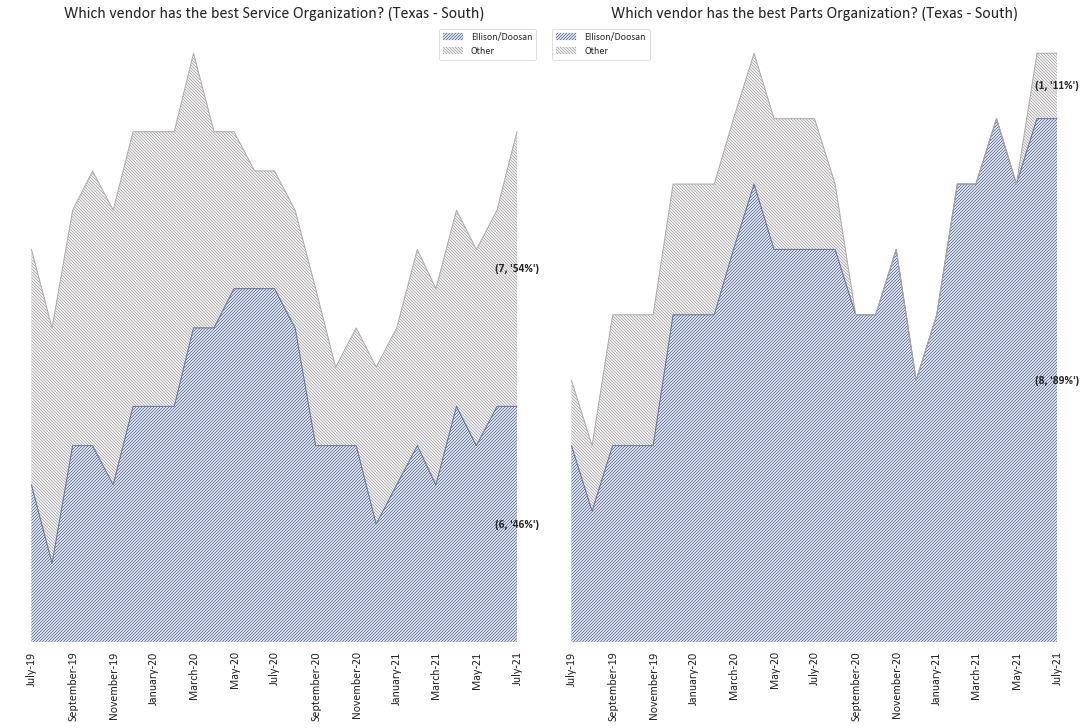

In [95]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Texas - South'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Texas - South'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Texas - South)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Texas - South)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Upper Midwest

In [73]:
umw_df = df[df['Region']=='Upper Midwest'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in umw_df.index:
        umw_df = pd.concat([umw_df[umw_df.index<date], 
                  pd.DataFrame({column: 0 for column in umw_df.columns}, index=[date]),
                   umw_df[umw_df.index>date]], axis=0)
for column in umw_df.columns[:-1]:
    umw_df[column] = [df.loc[(df['Date'].isin(umw_df.index[n-12:n]))&(df['Region']=='Upper Midwest')][column].mean() if n>11 else df.loc[(df['Date'].isin(umw_df.index[:n]))&(df['Region']=='Upper Midwest')][column].mean() for n in range(1, len(umw_df.index))] + [df.loc[(df['Date'].isin(umw_df.index[len(umw_df.index)-12:]))&(df['Region']=='Upper Midwest')][column].mean()]

umw_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
Date                                                                   
2021-03-01      0.753623     0.757576    1.000000   1.097561   7.714286
2021-04-01      0.772727     0.793651    1.035088   1.131579   8.666667
2021-05-01      0.808081     0.841270    0.982456   1.078947   8.714286
2021-06-01      0.744792     0.741935    0.975000   1.075000   7.916667
2021-07-01      0.777778     0.742424    1.021739   1.086957   8.181818

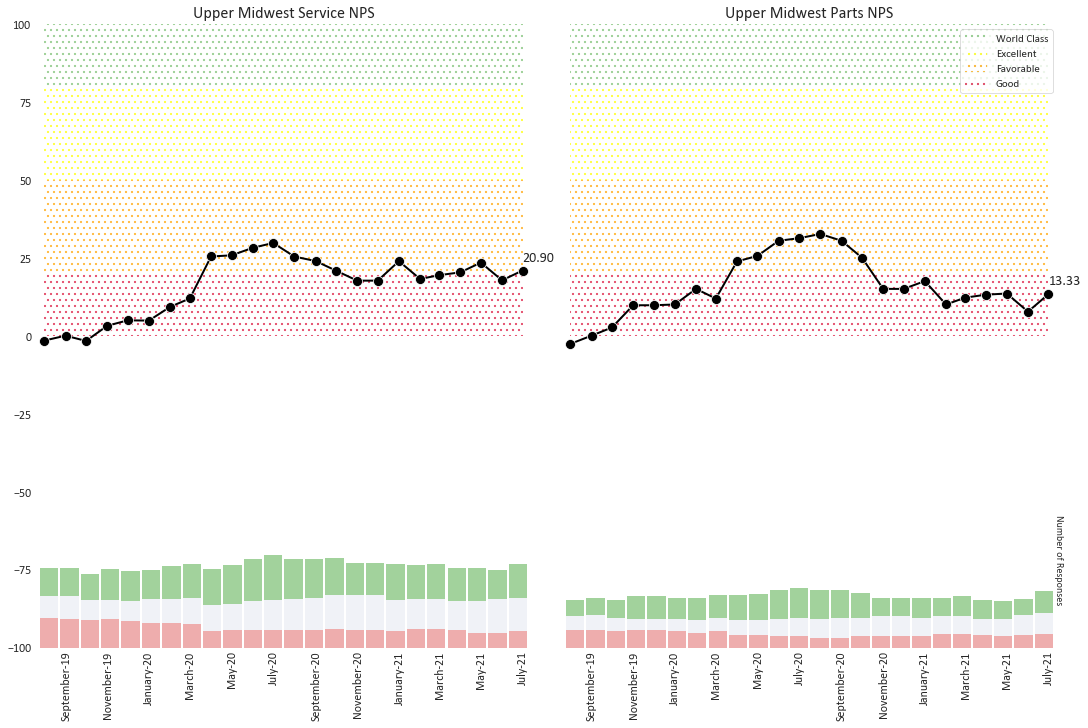

In [74]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Upper Midwest'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Upper Midwest Service NPS'
    else:
        working_df = Parts_nps
        title = 'Upper Midwest Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

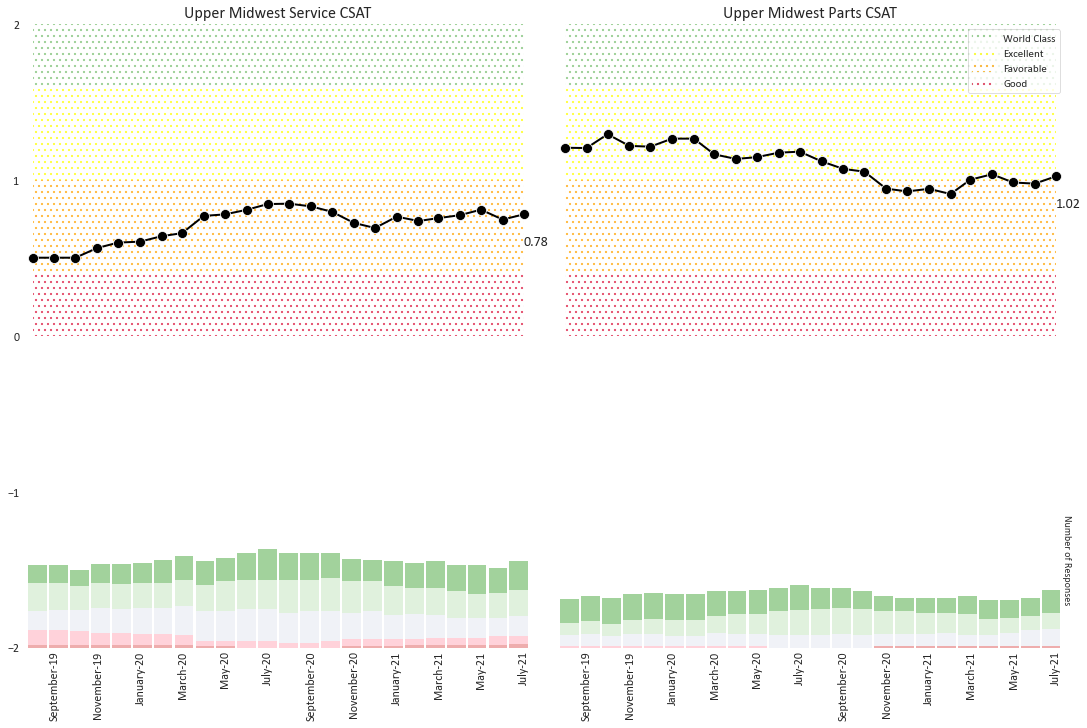

In [75]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Upper Midwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(umw_df.index[n-12:n]))&(df['Region']=='Upper Midwest'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(umw_df.index[:n]))&(df['Region']=='Upper Midwest'))][columns[1:]]) for n in range(1, len(umw_df.index))] + [np.nanmean(df[((df['Date'].isin(umw_df.index[len(umw_df.index)-12:])&(df['Region']=='Upper Midwest')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Upper Midwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(umw_df.index[n-12:n]))&(df['Region']=='Upper Midwest'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(umw_df.index[:n]))&(df['Region']=='Upper Midwest'))][columns[1:]]) for n in range(1, len(umw_df.index))] + [np.nanmean(df[((df['Date'].isin(umw_df.index[len(umw_df.index)-12:])&(df['Region']=='Upper Midwest')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Upper Midwest Service CSAT'
    else:
        working_df = parts_csat
        title = 'Upper Midwest Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(umw_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

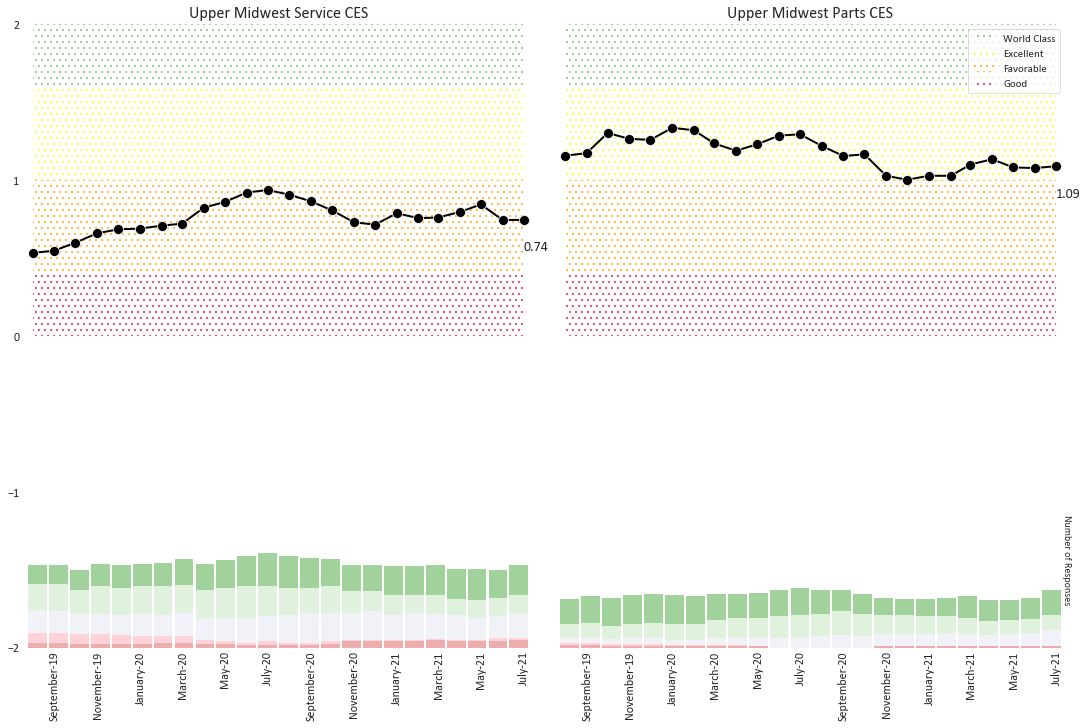

In [76]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Upper Midwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(umw_df.index[n-12:n]))&(df['Region']=='Upper Midwest'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(umw_df.index[:n]))&(df['Region']=='Upper Midwest'))][columns[1:]]) for n in range(1, len(umw_df.index))] + [np.nanmean(df[((df['Date'].isin(umw_df.index[len(umw_df.index)-12:])&(df['Region']=='Upper Midwest')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Upper Midwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(umw_df.index[n-12:n]))&(df['Region']=='Upper Midwest'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(umw_df.index[:n]))&(df['Region']=='Upper Midwest'))][columns[1:]]) for n in range(1, len(umw_df.index))] + [np.nanmean(df[((df['Date'].isin(umw_df.index[len(umw_df.index)-12:])&(df['Region']=='Upper Midwest')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Upper Midwest Service CES'
    else:
        working_df = parts_CES
        title = 'Upper Midwest Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

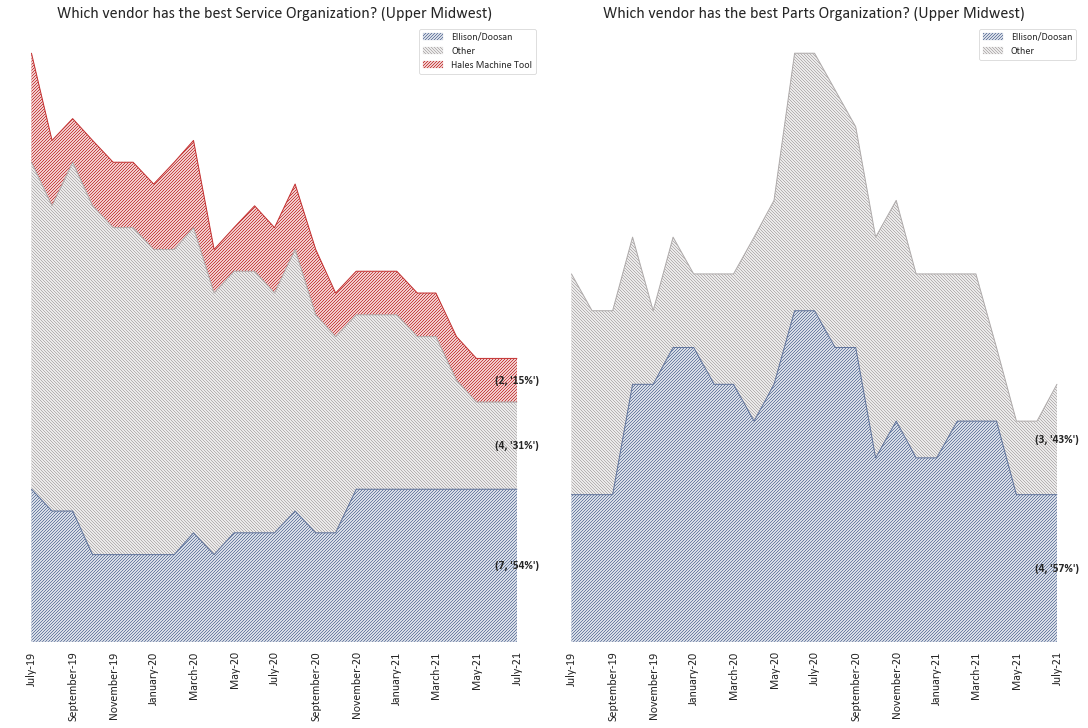

In [96]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Upper Midwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Upper Midwest'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Upper Midwest)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Upper Midwest)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;

# Wisconsin

In [78]:
wisconsin_df = df[df['Region']=='Wisconsin'].groupby('Date').mean()

for date in sorted(np.unique(df['Date'])):
    if date not in wisconsin_df.index:
        wisconsin_df = pd.concat([wisconsin_df[wisconsin_df.index<date], 
                  pd.DataFrame({column: 0 for column in wisconsin_df.columns}, index=[date]),
                   wisconsin_df[wisconsin_df.index>date]], axis=0)
for column in wisconsin_df.columns[:-1]:
    wisconsin_df[column] = [df.loc[(df['Date'].isin(wisconsin_df.index[n-12:n]))&(df['Region']=='Wisconsin')][column].mean() if n>11 else df.loc[(df['Date'].isin(wisconsin_df.index[:n]))&(df['Region']=='Wisconsin')][column].mean() for n in range(1, len(wisconsin_df.index))] + [df.loc[(df['Date'].isin(wisconsin_df.index[len(wisconsin_df.index)-12:]))&(df['Region']=='Wisconsin')][column].mean()]

wisconsin_df.tail()

Service CSAT  Service CES  Parts CSAT  Parts CES  NPS Score
Date                                                                   
2021-03-01      1.193939     1.111111    1.316239   1.210526   9.666667
2021-04-01      1.211538     1.156863    1.387387   1.277778   8.333333
2021-05-01      1.169935     1.142857    1.392157   1.272727   8.000000
2021-06-01      1.141026     1.040000    1.351852   1.277778   5.500000
2021-07-01      1.230303     1.150943    1.369369   1.297297   9.166667

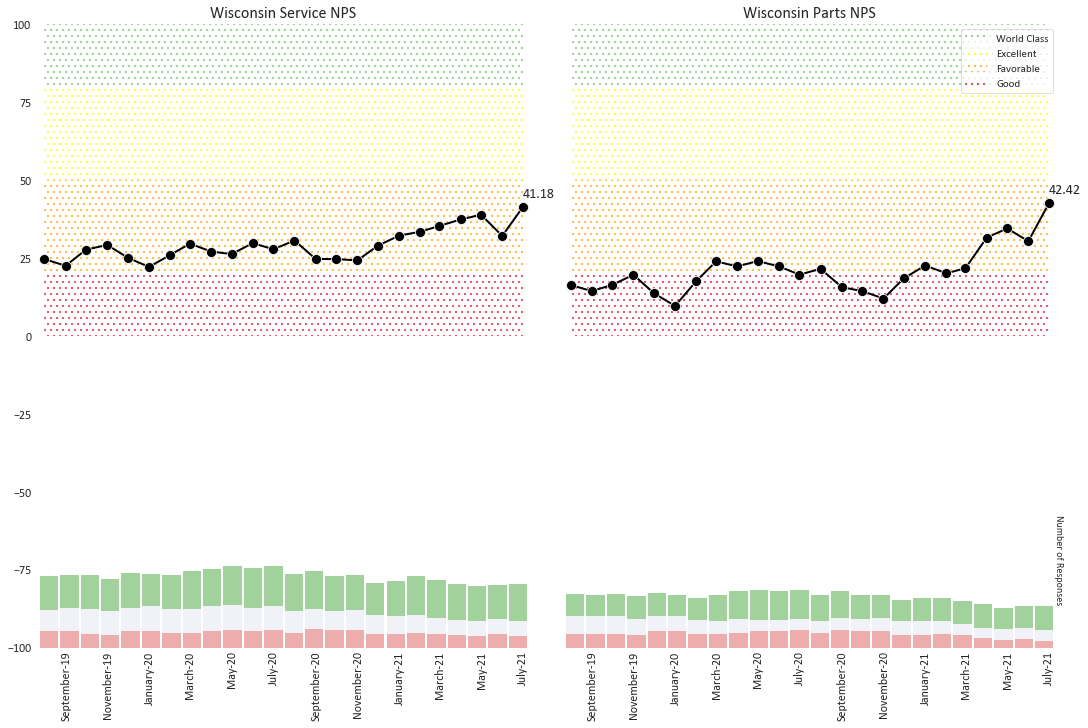

In [79]:
for columns in [['Date','Service CSAT','Service CES','NPS Category'],['Date','Parts CSAT','Parts CES','NPS Category']]:
    wip = df[df['Region']=='Wisconsin'][columns].dropna(subset=columns[1:-1], how='all').groupby(by=columns[::len(columns)-1])['NPS Category'].count().to_frame(name='count').reset_index()
    date_counts = {}
    for date in np.unique(df['Date']):
        counts_list = []
        for col in ['Promoter','Passive','Detractor']:
            if wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].empty:
                counts_list.append(0)
            else:
                counts_list.append(wip.loc[(wip['Date']==date) & (wip['NPS Category']==col)]['count'].values[0])
        date_counts[date] = counts_list
    if 'Parts CSAT' not in columns:
        service_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in service_nps.columns:
            service_nps[col] = [service_nps[service_nps.index.isin(service_nps.index[n-12:n])][col].sum() if n>11 else service_nps[service_nps.index.isin(service_nps.index[:n])][col].sum() for n in range(1, len(service_nps.index))] + [service_nps[service_nps.index.isin(service_nps.index[len(service_nps.index)-12:])][col].sum()]
        service_nps['NPS Score'] = [(service_nps['Promoter'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) - (service_nps['Detractor'][n]/np.sum(service_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(service_nps))]
        service_nps['NPS Score'] = 100*service_nps['NPS Score']
    else:
        Parts_nps = pd.DataFrame.from_dict(date_counts, orient='index', columns=['Promoter','Passive','Detractor'])
        for col in Parts_nps.columns:
            Parts_nps[col] = [Parts_nps[Parts_nps.index.isin(Parts_nps.index[n-12:n])][col].sum() if n>11 else Parts_nps[Parts_nps.index.isin(Parts_nps.index[:n])][col].sum() for n in range(1, len(Parts_nps.index))] + [Parts_nps[Parts_nps.index.isin(Parts_nps.index[len(Parts_nps.index)-12:])][col].sum()]
        Parts_nps['NPS Score'] = [(Parts_nps['Promoter'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) - (Parts_nps['Detractor'][n]/np.sum(Parts_nps[['Promoter','Passive','Detractor']].iloc[n])) for n in range(len(Parts_nps))]
        Parts_nps['NPS Score'] = 100*Parts_nps['NPS Score']

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_nps
        title = 'Wisconsin Service NPS'
    else:
        working_df = Parts_nps
        title = 'Wisconsin Parts NPS'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['NPS Score'], ax=ax, color='black', marker='o', 
             legend=None, markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set_ylim(ymin=-100, ymax=100)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['NPS Score'][-1]), xy=([item for item in working_df['NPS Score'].items()][-1][0],
                                                                [item for item in working_df['NPS Score'].items()][-1][1]+3),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df[['Detractor','Passive','Promoter']].tail(24).plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={'Promoter':'#7BC073', 'Passive':'#EBEDF5', 
                                                                'Detractor':'#E88A8A'},legend=None, linewidth=0, width=.9,
                                                                    alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)       
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[80,'yellow','Excellent'],[50,'orange','Favorable'],
                  [20,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
        
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, 
            verticalalignment='center', horizontalalignment='right', 
            transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

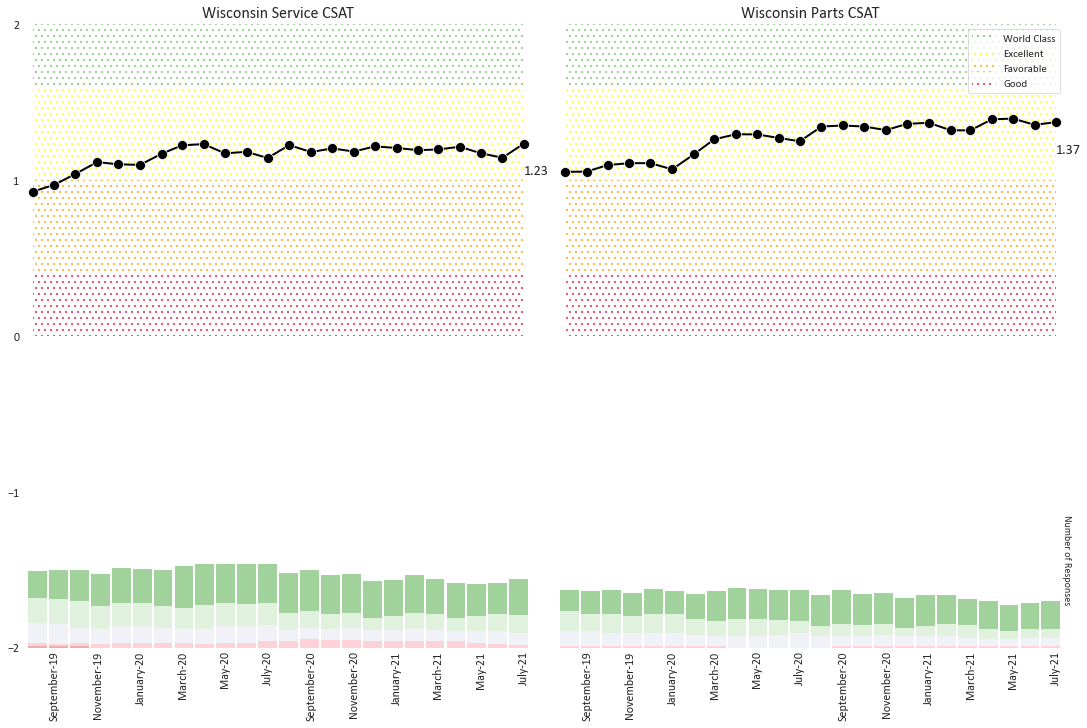

In [80]:
for columns in [['Date','Parts CSAT'],['Date','Service CSAT']]:
    date_counts = {}
    bins = [[-2.01,-1.5],[-1.5,-0.5],[-0.5,0.5],[0.5,1.5],[1.5,2.01]]
    if columns[-1] == 'Service CSAT':
        wip = df[df['Region']=='Wisconsin'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        service_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(wisconsin_df.index[n-12:n]))&(df['Region']=='Wisconsin'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(wisconsin_df.index[:n]))&(df['Region']=='Wisconsin'))][columns[1:]]) for n in range(1, len(wisconsin_df.index))] + [np.nanmean(df[((df['Date'].isin(wisconsin_df.index[len(wisconsin_df.index)-12:])&(df['Region']=='Wisconsin')))][columns[1:]])]
        for num in range(-2,3):
            service_csat[num] = [service_csat[service_csat.index.isin(service_csat.index[n-12:n])][num].sum() if n>11 else service_csat[service_csat.index.isin(service_csat.index[:n])][num].sum() for n in range(1, len(service_csat.index))] + [service_csat[service_csat.index.isin(service_csat.index[len(service_csat.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Wisconsin'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CSAT'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for pair in bins:
                counts_list.append(wip.query('Date==@date and (@pair[0]<CSAT<@pair[1])').sum().values[0])
            date_counts[date] = counts_list
        parts_csat = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_csat['Mean'] = [np.nanmean(df[((df['Date'].isin(wisconsin_df.index[n-12:n]))&(df['Region']=='Wisconsin'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(wisconsin_df.index[:n]))&(df['Region']=='Wisconsin'))][columns[1:]]) for n in range(1, len(wisconsin_df.index))] + [np.nanmean(df[((df['Date'].isin(wisconsin_df.index[len(wisconsin_df.index)-12:])&(df['Region']=='Wisconsin')))][columns[1:]])]
        for num in range(-2,3):
            parts_csat[num] = [parts_csat[parts_csat.index.isin(parts_csat.index[n-12:n])][num].sum() if n>11 else parts_csat[parts_csat.index.isin(parts_csat.index[:n])][num].sum() for n in range(1, len(parts_csat.index))] + [parts_csat[parts_csat.index.isin(parts_csat.index[len(parts_csat.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_csat
        title = 'Wisconsin Service CSAT'
    else:
        working_df = parts_csat
        title = 'Wisconsin Parts CSAT'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    ax2 = ax.twiny()
    ax3 = ax2.twinx()
    working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
    ax3.set_ylim(ymax=500)
    ax2.set(xticks=[])
    ax3.set(xticks=[], yticks=[])
    ax2.grid(False)
    ax3.grid(False)
    ax2.tick_params(axis=u'both', which=u'both',length=0)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
        ax2.spines[location].set_visible(False)
        ax3.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(wisconsin_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

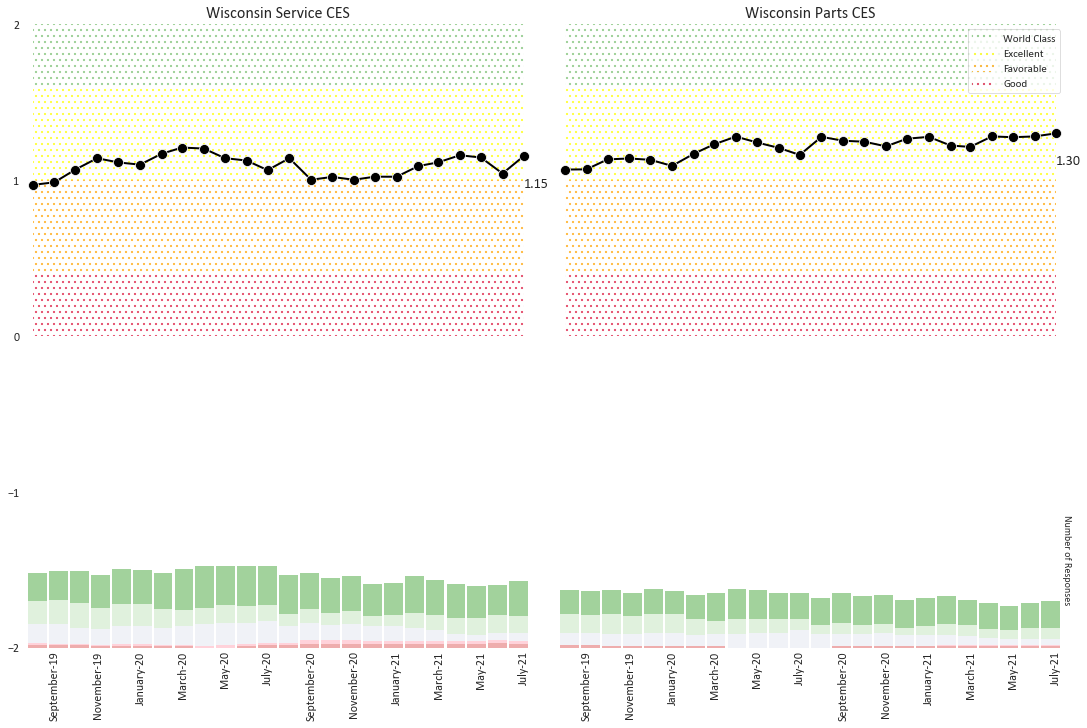

In [81]:
for columns in [['Date','Parts CES'],['Date','Service CES']]:
    date_counts = {}
    bins = [-2,-1,0,1,2]
    if columns[-1] == 'Service CES':
        wip = df[df['Region']=='Wisconsin'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        service_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        service_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(wisconsin_df.index[n-12:n]))&(df['Region']=='Wisconsin'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(wisconsin_df.index[:n]))&(df['Region']=='Wisconsin'))][columns[1:]]) for n in range(1, len(wisconsin_df.index))] + [np.nanmean(df[((df['Date'].isin(wisconsin_df.index[len(wisconsin_df.index)-12:])&(df['Region']=='Wisconsin')))][columns[1:]])]
        for num in range(-2,3):
            service_CES[num] = [service_CES[service_CES.index.isin(service_CES.index[n-12:n])][num].sum() if n>11 else service_CES[service_CES.index.isin(service_CES.index[:n])][num].sum() for n in range(1, len(service_CES.index))] + [service_CES[service_CES.index.isin(service_CES.index[len(service_CES.index)-12:])][num].sum()]
    else:
        wip = df[df['Region']=='Wisconsin'][columns].dropna(subset=columns, how='all').groupby(by=columns)[columns[-1]].count().to_frame(name='count')
        wip.index.rename(['Date','CES'], inplace=True)
        for date in sorted(np.unique(df['Date'])):
            counts_list = []
            for num in bins:
                counts_list.append(wip.query('(Date==@date) and (CES==@num)').sum().values[0])
            date_counts[date] = counts_list
        parts_CES = pd.DataFrame.from_dict(date_counts, orient='index', columns=[-2,-1,0,1,2])
        parts_CES['Mean'] = [np.nanmean(df[((df['Date'].isin(wisconsin_df.index[n-12:n]))&(df['Region']=='Wisconsin'))][columns[1:]]) if n>11 else np.nanmean(df[((df['Date'].isin(wisconsin_df.index[:n]))&(df['Region']=='Wisconsin'))][columns[1:]]) for n in range(1, len(wisconsin_df.index))] + [np.nanmean(df[((df['Date'].isin(wisconsin_df.index[len(wisconsin_df.index)-12:])&(df['Region']=='Wisconsin')))][columns[1:]])]
        for num in range(-2,3):
            parts_CES[num] = [parts_CES[parts_CES.index.isin(parts_CES.index[n-12:n])][num].sum() if n>11 else parts_CES[parts_CES.index.isin(parts_CES.index[:n])][num].sum() for n in range(1, len(parts_CES.index))] + [parts_CES[parts_CES.index.isin(parts_CES.index[len(parts_CES.index)-12:])][num].sum()]
            
fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)


for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = service_CES
        title = 'Wisconsin Service CES'
    else:
        working_df = parts_CES
        title = 'Wisconsin Parts CES'
    sns.lineplot(x=working_df.tail(24).index, y=working_df.tail(24)['Mean'], ax=ax, color='black', marker='o', legend=None, 
                 markersize=10, linewidth=2)
    ax.set_title(title, fontsize=16)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    ax.margins(x=0.02)
    ax.set(yticks=[-2,-1,0,1,2])
    ax.set_ylim(ymin=-2, ymax=2)
    ax.grid(False)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.annotate("{:.2f}".format(working_df['Mean'][-1]), xy=([item for item in working_df['Mean'].items()][-1][0],
                                                                [item for item in working_df['Mean'].items()][-1][1]-0.2),
            fontsize=14)
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    thresholds = [[ax.get_ylim()[1],'#7BC073','World Class'],[1.6,'yellow','Excellent'],[1,'orange','Favorable'],
                  [0.4,'crimson','Good'],[0]]
    for n in range(4):
        ax.fill_between(all_df.tail(24).index, [thresholds[n+1][0]]*24, [thresholds[n][0]]*24, facecolor="none", 
                        hatch='..', edgecolor=thresholds[n][1], linewidth=0.0, alpha=0.7, label=thresholds[n][2])
    if num != 1:
        ax2 = ax.twiny()
        ax3 = ax2.twinx()
        working_df.tail(24)[working_df.columns[:-1]].plot(ax=ax3, kind='bar', stacked=True, 
                                                         color={2:'#7BC073', 1:'#D3ECCF', 0:'#EBEDF5', -1:'pink', 
                                                                   -2:'#E88A8A'}, legend=None, linewidth=0, width=.9,
                                                         alpha=0.7)
        ax3.set_ylim(ymax=500)
        ax2.set(xticks=[])
        ax3.set(xticks=[], yticks=[])
        ax2.grid(False)
        ax3.grid(False)
        ax2.tick_params(axis=u'both', which=u'both',length=0)
        for location in ['top','right','left','bottom']:
            ax2.spines[location].set_visible(False)
            ax3.spines[location].set_visible(False)
    else:
        ax.set_ylim(ymin=0, ymax=2)
        ax.grid(axis='x')
                                 
ax3.text(1.01, 0.14, 'Number of Responses', rotation=270, verticalalignment='center', horizontalalignment='right', 
         transform=ax3.transAxes, fontsize=10)
ax.set(yticks=[])
ax.legend(fontsize=11);

''

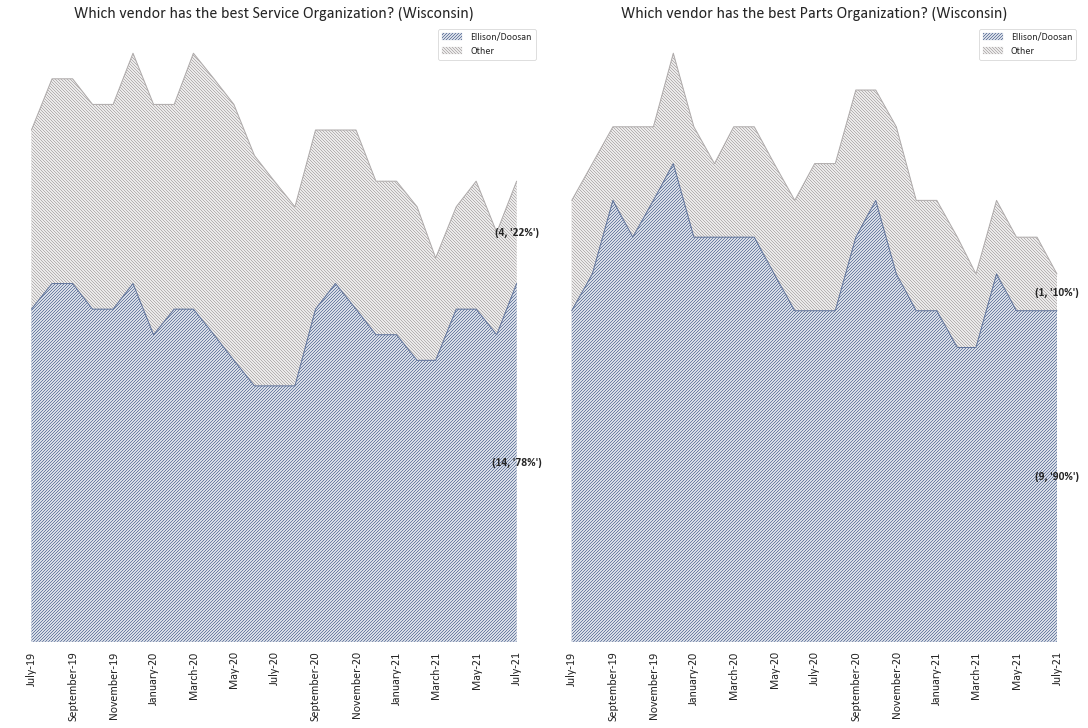

In [97]:
for columns in [['Date','Best Service Vendor'],['Date','Best Parts Vendor']]:
    date_counts = {}
    if columns[-1] == 'Best Service Vendor':
        wip = df[df['Region']=='Wisconsin'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Service Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_service = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_service.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_service['Other'] = best_service[[column for column in best_service.columns if column not in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_service.drop(labels=[column for column in best_service.columns if not column in [column for column in best_service.columns if ((best_service[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_service.columns:
            best_service[col] = [best_service[best_service.index.isin(best_service.index[n-12:n])][col].sum() if n>11 else best_service[best_service.index.isin(best_service.index[:n])][col].sum() for n in range(1, len(best_service.index))] + [best_service[best_service.index.isin(best_service.index[len(best_service.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_service.columns]
        best_service = best_service[blue_grey + [col for col in best_service.sort_values(by=best_service.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]
    else:
        wip = df[df['Region']=='Wisconsin'][columns].dropna(subset=columns, how='all').groupby(by=columns)['Best Parts Vendor'].count().to_frame(name='count')
        wip.index.rename(['Date','Best'], inplace=True)
        for date in np.unique(df['Date']):
            counts_list = []
            for vendor in np.unique(wip.index.get_level_values('Best')):
                counts_list.append(wip.query('(Date==@date) and (Best==@vendor)').sum().values[0])
            date_counts[date] = counts_list
        best_Parts = pd.DataFrame.from_dict(date_counts, orient='index', columns=np.unique(wip.index.get_level_values('Best')))
        try:
            best_Parts.drop(labels=['Indeterminable'], axis=1, inplace=True)
        except:
            pass
        best_Parts['Other'] = best_Parts[[column for column in best_Parts.columns if column not in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column))]]].sum(axis=1)
        best_Parts.drop(labels=[column for column in best_Parts.columns if not column in [column for column in best_Parts.columns if ((best_Parts[column].tail(12).values.sum()>1) & ('Tied' not in column) | (column in ['Other','Ellison/Doosan']))]], axis=1, inplace=True)
        for col in best_Parts.columns:
            best_Parts[col] = [best_Parts[best_Parts.index.isin(best_Parts.index[n-12:n])][col].sum() if n>11 else best_Parts[best_Parts.index.isin(best_Parts.index[:n])][col].sum() for n in range(1, len(best_Parts.index))] + [best_Parts[best_Parts.index.isin(best_Parts.index[len(best_Parts.index)-12:])][col].sum()]
        blue_grey = [col for col in ['Ellison/Doosan','Other'] if col in best_Parts.columns]
        best_Parts = best_Parts[blue_grey + [col for col in best_Parts.sort_values(by=best_Parts.index[-1], axis=1, ascending=False).columns if col not in blue_grey]]

fig = plt.figure(constrained_layout=True, figsize=(15,10))
gs = fig.add_gridspec(nrows=1, ncols=2, left=0, right=15, wspace=0)
paper_rc = {'lines.linewidth': 1, 'lines.markersize': 10}
sns.set_context("paper", rc = paper_rc)

for num in [0,-1]:
    ax = fig.add_subplot(gs[0:, num])
    if num == 0:
        working_df = best_service
        title = 'Which vendor has the best Service Organization? (Wisconsin)'
    else:
        working_df = best_Parts
        title = 'Which vendor has the best Parts Organization? (Wisconsin)'
    colors = [['#60749c','////////'],['#b0acac','\\\\\\\\\\\\\\\\'],['#c43434','////////'],
              ['#e05c74','\\\\\\\\\\\\\\\\'],['#40744c','////////']]
    for x in range(len(working_df.columns)):
        if x == 0:
            ax.fill_between(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, [0]*25,
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, working_df[working_df.columns[x]].tail(25).values, 
                    label='_nolegend_', color=colors[x][0])
        elif x == 1:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           working_df[working_df.columns[x-1]].tail(25).values.T.tolist(), facecolor='none', 
                            hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
        else:
            ax.fill_between(working_df.tail(25).index, 
                            [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())],
                           [sum(x) for x in zip(*working_df[working_df.columns[:x]].tail(25).values.T.tolist())],
                           facecolor='none', hatch=colors[x][1], edgecolor=colors[x][0], linewidth=0.1, alpha=1,
                           label=working_df.columns[x])
            ax.plot(working_df.tail(25).index, 
                    [sum(x) for x in zip(*working_df[working_df.columns[:x+1]].tail(25).values.T.tolist())], 
                    label='_nolegend_', color=colors[x][0])
    for x1 in working_df.index[-1:]:
        yCenteredS = working_df.loc[x1].cumsum()
        yCenteredS = [0.0] + yCenteredS.tolist()
        yCenteredS = [y + (yCenteredS[i+1] - y)/2. for i, y in enumerate(yCenteredS[:-1])]
        labels = pd.DataFrame(data={'y':yCenteredS, 'value':working_df.loc[x1].tolist()})
        for _, y, value in labels.itertuples():
            ax.annotate((int(value),"{0:.0%}".format(value/working_df.tail(1).sum(axis=1).values[0])), 
                        xy=(x1, y), ha='center', va='center',fontweight='heavy', fontsize='large')
            ax.set(yticks=[])
    ax.grid(False)  
    for location in ['top','right','left','bottom']:
        ax.spines[location].set_visible(False)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[4:]+handles[:4], labels[4:]+labels[:4], fontsize=10)
    ax.set_title(title, font='calibri', fontsize=16)
    loc = matplotlib.dates.MonthLocator(interval=2)
    ax.xaxis.set_major_locator(loc)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B-%y'))
    ax.tick_params(axis='x', rotation=90, labelsize=12, which='both', pad=-25)
;